## INDIAN FUNDING DATA ANALYSIS


Project Title - The Indian Startup Data Analysis

* Context

The data for this project spans from 2018-2019. Our goal will be to satisfy the processes for handling the data and also provide a detailed analysis of the process using the CRISP-DM data analysis framework.

This Notebook will include conclusions on the following :

* Asking the relevant questions and stating some hypothesis.
* Cleaning the data.

Questions?

* Do companies in certain sectors tend to receive more funding than others?

* Is there a correlation between the stage of development of a company and the amount of funding it receives?

* Are companies with more founders more likely to receive larger amounts of funding?

* Are there any patterns in the location of a company's headquarters and the amount of funding it receives?

* Does the number of investors in a company tend to impact the amount of funding it receives?

* Founders: How many founders are associated with each company? What is the average number of founders?

* What are the top 10 companies with the highest funding?


Hypothesis! 

* Startups in the e-commerce and fintech sectors receive more funding compared to the technology sector in India.

* There is a positive correlation between the stage of development of a company and the amount of funding it receives in India.

* Companies with a larger number of founders are more likely to receive higher amounts of funding in India.

* Startups headquartered in major metropolitan areas such as Mumbai, Bangalore, and Delhi are more likely to receive larger amounts of funding in India.

* The number of investors in a company is positively correlated with the amount of funding it receives in India.

* Is there a relationship between the sector of a company and the amount of funding it receives?

* Is there a difference in the average funding received by companies headquartered in different regions?


## Cleaning the data. 
* Replacing missing values by using mode of the column

* Dropping values and duplicates

* Renaming values using loc method

* Replacing missing values with averages: This was done by accessing the distribution of the data

* Handling missing values by using loc method.

* Creating a date series to spread the data out in a time frame.

* Convert currency from rupees to dollars by writing a function.

* Filling the missing values in the amount column by: converting the structure of the data and filling  * it the distribution of the data with the aid of a histogram and box plot, Then using the median as standard.

* Restructuring the sector column by first creating a several lists of Keywords realted to different sector industries. Then using the pandas 'str.contain()' method to check if any keyword in each appear in the sector column for each row of the dataframe.If so,it will assign it to the corresponding industry label in the new column created for that row. 

## Importing libraries & accessing the size and shape of the data

In [246]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import scipy.stats as statst
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

In [2]:
ind_2018 = pd.read_csv('C:assets\startup_funding2018.csv')
ind_2019 = pd.read_csv('C:assets\startup_funding2019.csv')
ind_2020 = pd.read_csv('C:assets\startup_funding2020.csv')
ind_2021 = pd.read_csv('C:assets\startup_funding2021.csv')

In [3]:
ind_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [4]:
ind_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [5]:
ind_2018.isna().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

## EDA

## Filtering the data ,replacing and rename values & a date series(random)

In [6]:
ind_2018['Year']=2018
ind_2018['Founded']='NaN'
ind_2018= ind_2018.rename(columns={'Company Name': 'Company/Brand'})
ind_2018= ind_2018.rename(columns={'Industry': 'Sector'})
ind_2018= ind_2018.rename(columns={'Location': 'HeadQuarter'})
ind_2018= ind_2018.rename(columns={'Amount': 'Amount($)'})
ind_2018= ind_2018.rename(columns={'Round/Series': 'Stage'})
ind_2018.drop('About Company',axis=1,inplace=True)

In [7]:
# replace empty values with NaN
ind_2018['Sector'].replace('—', pd.np.nan, inplace=True)

In [8]:
ind_2018.loc[58, 'Sector'] = 'Entertainment'
ind_2018.loc[105, 'Sector'] = 'Finance'
ind_2018.loc[121, 'Sector'] = 'Automotive'
ind_2018.loc[146, 'Sector'] = 'Automotive'
ind_2018.loc[153, 'Sector'] = 'Food'
ind_2018.loc[174, 'Sector'] = 'Technology'
ind_2018.loc[181, 'Sector'] = 'Finance'
ind_2018.loc[210, 'Sector'] = 'Automotive'
ind_2018.loc[230, 'Sector'] = 'Real Estate'
ind_2018.loc[235, 'Sector'] = 'Technology'
ind_2018.loc[238, 'Sector'] = 'Technology'
ind_2018.loc[242, 'Sector'] = 'Real Estate'
ind_2018.loc[243, 'Sector'] = 'Technology'
ind_2018.loc[247, 'Sector'] = 'Technology'
ind_2018.loc[251, 'Sector'] = 'Wellness'
ind_2018.loc[257, 'Sector'] = 'Marketing'
ind_2018.loc[258, 'Sector'] = 'Marketing'
ind_2018.loc[259, 'Sector'] = 'E-Commerce'
ind_2018.loc[257, 'Sector'] = 'Marketing'
ind_2018.loc[294, 'Sector'] = 'Transportation'
ind_2018.loc[325, 'Sector'] = 'Technology'
ind_2018.loc[326, 'Sector'] = 'Finance'
ind_2018.loc[346, 'Sector'] = 'Finance'
ind_2018.loc[398, 'Sector'] = 'Finance'
ind_2018.loc[457, 'Sector'] = 'Agriculture'
ind_2018.loc[472, 'Sector'] = 'Technology'
ind_2018.loc[473, 'Sector'] = 'Technology'
ind_2018.loc[476, 'Sector'] = 'Technology'
ind_2018.loc[478, 'Sector'] = 'Wellness/Beauty'
ind_2018.loc[480, 'Sector'] = 'Hospitality'
ind_2018.loc[510, 'Sector'] = 'Technology'

In [9]:
ind_2018.head(511)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year,Founded
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India",2018,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",2018,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",2018,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",2018,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",2018,NaN
...,...,...,...,...,...,...,...
506,Verzeo,E-Learning,Series A,5000000,"Bangalore, Karnataka, India",2018,NaN
507,Haazri,"Food and Beverage, Snack Food, Tea",Seed,"₹12,500,000","Mumbai, Maharashtra, India",2018,NaN
508,Connect India,"Delivery Service, E-Commerce, Logistics",Angel,—,"New Delhi, Delhi, India",2018,NaN
509,Flyrobe,"Fashion, Lifestyle, Rental",Series B,"₹264,000,000","Mumbai, Maharashtra, India",2018,NaN


In [10]:
ind_2018.isna().sum()

Company/Brand    0
Sector           0
Stage            0
Amount($)        0
HeadQuarter      0
Year             0
Founded          0
dtype: int64

## Filling the anomalies in this column by containing the valid values and replacing the missing values

In [11]:
# # create a DatetimeIndex with dates for the entire year
date_range = pd.date_range(start='2018-01-01', end='2018-12-31', freq='D')

# # create a new column 'Date' with random dates within the year 2018
ind_2018['Date'] = np.random.choice(date_range, size=len(ind_2018))

ind_2018 = ind_2018.sort_values('Date')

ind_2018['Date'] = pd.to_datetime(ind_2018['Date'], format='%Y-%m-%d')


In [12]:
ind_2018.set_index('Date',inplace=True)

## Changing the shape of the amount col & currency(rates conidered),filling the missing values with mean of the column.

In [13]:
def convert_to_dollars(value):
    if pd.isnull(value):
        return np.nan
    elif isinstance(value, float):
        return str(value)
    elif '$' in value:
        return value
    elif '₹' in value:
        return '$' + str(round(float(value.split('₹')[1].replace(',', '')) / 68.44, 2))
    else:
        return '$' + str(float(value) / 68.44)


# convert values in 'Amount($)' column to strings
ind_2018['Amount($)'] = ind_2018['Amount($)'].astype(str)

ind_2018['Amount($)'] = ind_2018['Amount($)'].str.replace('[^\d\.]', '')

ind_2018['Amount($)'].replace('', np.nan, inplace=True)

ind_2018['Amount($)'] = ind_2018['Amount($)'].astype(float)

ind_2018['Amount($)'] = ind_2018['Amount($)'].apply(convert_to_dollars)


In [14]:
# # convert the 'Amount' column to a numeric data type
ind_2018['Amount($)'] = pd.to_numeric(ind_2018['Amount($)'])
ind_2018['Amount($)'] = pd.to_numeric(ind_2018['Amount($)'])

In [15]:
ind_2018.describe()

,Amount($),Year
count,3.780000e+02,526.0
mean,2.391683e+08,2018.0
std,1.374900e+09,0.0
min,7.500000e+03,2018.0
25%,1.000000e+06,2018.0
50%,5.800000e+06,2018.0
75%,5.000000e+07,2018.0
max,2.000000e+10,2018.0


In [16]:
ind_2018.duplicated()

Date
2018-01-01    False
2018-01-01    False
2018-01-01    False
2018-01-02    False
2018-01-02    False
              ...  
2018-12-31    False
2018-12-31    False
2018-12-31    False
2018-12-31    False
2018-12-31    False
Length: 526, dtype: bool

In [17]:
ind_2018.isna().sum()

Company/Brand      0
Sector             0
Stage              0
Amount($)        148
HeadQuarter        0
Year               0
Founded            0
dtype: int64

In [18]:
ind_2018.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year,Founded
Date,,,,,,,
2018-01-01,Jetbrain Robotics,"Health Care, Hospital, Medical, Robotics",Seed,70000.0,"Gurgaon, Haryana, India",2018,NaN
2018-01-01,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500.0,"Mumbai, Maharashtra, India",2018,NaN
2018-01-01,Ambee,"Health Care, Medical Device, Public Safety",Angel,NaN,"Bangalore, Karnataka, India",2018,NaN
2018-01-02,Roposo,"Internet, Social Network, TV",Series C,10000000.0,"Gurgaon, Haryana, India",2018,NaN
2018-01-02,LetsMD,"Fitness, Health Care, Wellness",Seed,1000000.0,"New Delhi, Delhi, India",2018,NaN


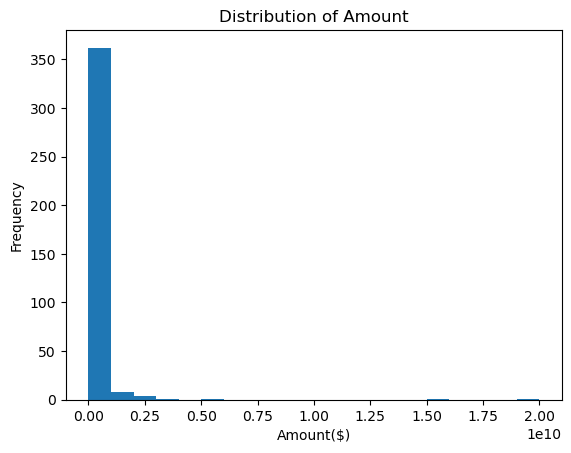

In [19]:
# Create a histogram of the 'Amount' column
plt.hist(ind_2018['Amount($)'], bins=20)
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.ylabel('Frequency')
plt.show()

In [20]:
ind_2018['Amount($)'] = ind_2018['Amount($)'].fillna(ind_2018['Amount($)'].median())

In [21]:
ind_2018['Amount($)'] = ind_2018['Amount($)'].astype(int)

In [22]:
ind_2018.isna().sum()

Company/Brand    0
Sector           0
Stage            0
Amount($)        0
HeadQuarter      0
Year             0
Founded          0
dtype: int64

In [23]:
ind_2018.head(100)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year,Founded
Date,,,,,,,
2018-01-01,Jetbrain Robotics,"Health Care, Hospital, Medical, Robotics",Seed,70000,"Gurgaon, Haryana, India",2018,NaN
2018-01-01,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",2018,NaN
2018-01-01,Ambee,"Health Care, Medical Device, Public Safety",Angel,5800000,"Bangalore, Karnataka, India",2018,NaN
2018-01-02,Roposo,"Internet, Social Network, TV",Series C,10000000,"Gurgaon, Haryana, India",2018,NaN
2018-01-02,LetsMD,"Fitness, Health Care, Wellness",Seed,1000000,"New Delhi, Delhi, India",2018,NaN
...,...,...,...,...,...,...,...
2018-02-21,SectorQube,"Consumer Electronics, Embedded Systems, Hardwa...",Seed,5800000,"Ernakulam, Kerala, India",2018,NaN
2018-02-22,Vogo Rentals,"Last Mile Transportation, Railroad, Transporta...",Debt Financing,80000000,"Kormangala, Karnataka, India",2018,NaN
2018-02-22,Em Personal Care,Cosmetics,Seed,5800000,"Worli, Maharashtra, India",2018,NaN


## Replacing missing values in stage & Founded col / filtering headquater col / filtering the sector col by closing them in related col by using str.contain

In [24]:
valid_stages = ['Venture - Series Unknown','Seed', 'Angel', 'Series A', 'Series B', 'Pre-Seed', 'Grant', 'Series H', 
                'Series A', 'Series C', 'Series E', 'Corporate Round','Series D','Debt financing','Post-IPO Equity']

ind_2018.loc[~ind_2018['Stage'].isin(valid_stages), 'Stage'] = np.nan

In [25]:
mode_value = ind_2018['Stage'].mode()[0]
print(mode_value)

Seed


In [26]:
ind_2018['Stage'] = ind_2018['Stage'].fillna(ind_2018['Stage'].mode()[0])
ind_2018['Founded'] = ind_2018['Founded'].replace('NaN', np.nan)

In [27]:
ind_2018.head(100)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year,Founded
Date,,,,,,,
2018-01-01,Jetbrain Robotics,"Health Care, Hospital, Medical, Robotics",Seed,70000,"Gurgaon, Haryana, India",2018,NaN
2018-01-01,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",2018,NaN
2018-01-01,Ambee,"Health Care, Medical Device, Public Safety",Angel,5800000,"Bangalore, Karnataka, India",2018,NaN
2018-01-02,Roposo,"Internet, Social Network, TV",Series C,10000000,"Gurgaon, Haryana, India",2018,NaN
2018-01-02,LetsMD,"Fitness, Health Care, Wellness",Seed,1000000,"New Delhi, Delhi, India",2018,NaN
...,...,...,...,...,...,...,...
2018-02-21,SectorQube,"Consumer Electronics, Embedded Systems, Hardwa...",Seed,5800000,"Ernakulam, Kerala, India",2018,NaN
2018-02-22,Vogo Rentals,"Last Mile Transportation, Railroad, Transporta...",Seed,80000000,"Kormangala, Karnataka, India",2018,NaN
2018-02-22,Em Personal Care,Cosmetics,Seed,5800000,"Worli, Maharashtra, India",2018,NaN


In [28]:
ind_2018.isna().sum()

Company/Brand      0
Sector             0
Stage              0
Amount($)          0
HeadQuarter        0
Year               0
Founded          526
dtype: int64

In [29]:
# Split the Headquarters column by comma, and keep only the first value
ind_2018["City"] = ind_2018["HeadQuarter"].apply(lambda x: x.split(",")[0])

In [30]:
ind_2018.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year,Founded,City
Date,,,,,,,,
2018-01-01,Jetbrain Robotics,"Health Care, Hospital, Medical, Robotics",Seed,70000,"Gurgaon, Haryana, India",2018,NaN,Gurgaon
2018-01-01,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",2018,NaN,Mumbai
2018-01-01,Ambee,"Health Care, Medical Device, Public Safety",Angel,5800000,"Bangalore, Karnataka, India",2018,NaN,Bangalore
2018-01-02,Roposo,"Internet, Social Network, TV",Series C,10000000,"Gurgaon, Haryana, India",2018,NaN,Gurgaon
2018-01-02,LetsMD,"Fitness, Health Care, Wellness",Seed,1000000,"New Delhi, Delhi, India",2018,NaN,New Delhi


In [31]:
ind_2018.drop('HeadQuarter',axis=1,inplace=True)

In [32]:
ind_2018 = ind_2018.rename(columns={'City': 'HeadQuarter'})

In [33]:
# replace "Bengaluru" with "Bangalore" in the "headquarter" column
ind_2018['HeadQuarter'] = ind_2018['HeadQuarter'].str.replace('Bengaluru', 'Bangalore')
ind_2018['HeadQuarter'] = ind_2018['HeadQuarter'].str.replace('Bangalore City', 'Bangalore')
ind_2018['HeadQuarter'] = ind_2018['HeadQuarter'].str.replace('New Delhi', 'Delhi')
ind_2018['HeadQuarter'] = ind_2018['HeadQuarter'].str.replace('Gurgaon', 'Gurugram')

In [34]:
unique_values = ind_2018['HeadQuarter'].unique()
print(unique_values)

['Gurugram' 'Mumbai' 'Bangalore' 'Delhi' 'Pune' 'Bhopal' 'Noida' 'Haryana'
 'Indore' 'Chennai' 'Kormangala' 'India' 'Ahmedabad' 'Kolkata' 'Anand'
 'Alleppey' 'Hyderabad' 'Ernakulam' 'Worli' 'Guntur' 'Cochin' 'Chandigarh'
 'Uttar Pradesh' 'Jaipur' 'Azadpur' 'Kalpakkam' 'Andheri' 'Jodhpur'
 'Guindy' 'Kannur' 'Mylapore' 'Trivandrum' 'Lucknow' 'Coimbatore' 'Kochi'
 'Belgaum' 'Thane' 'Ghaziabad' 'Kalkaji' 'Kanpur' 'Kota' 'Mohali' 'Margão'
 'Faridabad' 'Hubli' 'Powai' 'Alwar']


In [35]:
ind_2018.isna().sum()

Company/Brand      0
Sector             0
Stage              0
Amount($)          0
Year               0
Founded          526
HeadQuarter        0
dtype: int64

In [36]:
tech = ['Mobile','Technology', 'Internet', 'Software', 'Hardware','SaaS','Blockchain','Apps','Information Services','SEM',
        'Artificial Intelligence','CleanTech','Aerospace','Robotics','Ai','PaaS','Medtech','Agritech','HR tech',
       'Tech','FoodTech','Safety tech','IoT','Legal tech','Infratech','Netwokring platform','Telecommunication','Cloud','Aero',
       'Virtual','Content','Photonics','app','Proptech','Deeptech','AR','VR','Agri tech','-Tech','AgriTech','IT','Network',
        'Data','HrTech','Foodtech','Spacetech','E-mobility','Automation','Logitech','HRTech','Drone','MLOps','Innovation',
       'BioTechnology','TaaS','network','equipment','SpaceTech','CRM','MarTech','Nanotechnology','Femtech','startup','AI']
fin = ['Lending','Finance','Insurance', 'Payments','Financial Services','Credit','Credit Cards','Mutual Funds',
       'Banking','Escrow','Venture','financial','Taxation','Capital','firm','Equity']
fint = ['NFT','Virtual Banking','FinTech','Fintech','Cryptocurrency','Crypto','Insurtech','InsurTech']
health = ['Health', 'Medical','Pharmaceutical','Health Diagnotics','Health Care','Hospital','Biotechnology','Biopharma',
         'Hygiene management','HealthTech','Healthcare','HealthCare','laboratory','Biotech','Healthtech','HeathTech',
         'Helathcare','Veterinary']
mkt = ['Brand Marketing','Marketing','Event Promotion','Market']
agric = ['Farming','Agriculture','Nutrition','Hauz Khas','Fishery']
con = ['Food','Food and Beverages','Dairy','Beverages','Beer','FMCG']
econ = ['B2B','Shopping','E-Commerce','Trading Platform','E-commerce','E-marketplace','marketplace','e-commerce','Ecommerce',
        'E-market','Commerce','Trading platform']
cons = ['Wholesale','Consumer','Shoes','Packaging','Retail','Consulting','Food Delivery']
edu = ['E-Learning','EdTech','Education','Communities','Edtech','Preschool','School']
welln = ['Lifestyle','Beauty','Wellness','Cosmetics','Yoga','Skincare','D2C','Fitness','Lifestyle','Training']
real_est=['Real Estate','Home Decor','Accomodation','Interior design','Home Design','Home interior','Co-living',
          'Construction']
log = ['Logistics','Rental','Tourism','Travel','TravelTech','Transport','Transportation','Aviation','Mobility']

auto = ['Automotive','Electric vehicle','Industrial Automation','Vehicles','Automotive tech','Automobile','Tyre','car','Car',
       'Vehicle','Mechanical']
manu = ['Manufacturing']
ener = ['Renewable Energy','Solar','Energy','Energy Storage','Battery','Oil and Gas','Renewable','EV','Electricity',
       'purification','Renewables']
medi = ['Entertainment','Media','News','Video','Digital Media','FM','Publication','OTT','Social Network','Music',
        'Digital platform','Podcast','publishing','Blogging']
game = ['Gaming','Games','Sports']

style = ['Fashion','Jewelry','Eyeglasses','Eye Wear','Apparel','Dating','Celebrity','Eyewear','D2C Fashion','Matrimony',
         'Textiles','D2C jewellery','Foootwear','Arts']
hos =['Hospitality','Hotel','Leisure']



ind_2018['Sector_clean'] = 'Other'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(tech)), 'Sector_clean'] = 'Technology'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(fin)), 'Sector_clean'] = 'Finance'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(health)), 'Sector_clean'] = 'Healthcare'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(mkt)), 'Sector_clean'] = 'Marketing'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(agric)), 'Sector_clean'] = 'Agriculture'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(econ)), 'Sector_clean'] = 'E-Commerce'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(edu)), 'Sector_clean'] = 'Education'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(welln)), 'Sector_clean'] = 'Wellness/Beauty'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(real_est)), 'Sector_clean'] = 'Real Estate'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(log)), 'Sector_clean'] = 'Logistics'

ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(auto)), 'Sector_clean'] = 'Automotive'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(manu)), 'Sector_clean'] = 'Manufacture'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(ener)), 'Sector_clean'] = 'Energy'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(medi)), 'Sector_clean'] = 'Media/Entertainment'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(hos)), 'Sector_clean'] = 'Hospitality'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(style)), 'Sector_clean'] = 'Lifestyle'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(cons)), 'Sector_clean'] = 'Consumer Services'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(game)), 'Sector_clean'] = 'Gaming'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(fint)), 'Sector_clean'] = 'FinTech'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(con)), 'Sector_clean'] = 'Consumables'

In [37]:
ind_2018.drop('Sector',axis=1,inplace=True)

In [38]:
ind_2018= ind_2018.rename(columns={'Sector_clean': 'Sector'})

In [39]:
ind_2018.head()

,Company/Brand,Stage,Amount($),Year,Founded,HeadQuarter,Sector
Date,,,,,,,
2018-01-01,Jetbrain Robotics,Seed,70000,2018,NaN,Gurugram,Automotive
2018-01-01,Mombay,Seed,7500,2018,NaN,Mumbai,Consumables
2018-01-01,Ambee,Angel,5800000,2018,NaN,Bangalore,Automotive
2018-01-02,Roposo,Series C,10000000,2018,NaN,Gurugram,Media/Entertainment
2018-01-02,LetsMD,Seed,1000000,2018,NaN,Delhi,Automotive


## Ploting visuals to check the shape of the dataframe

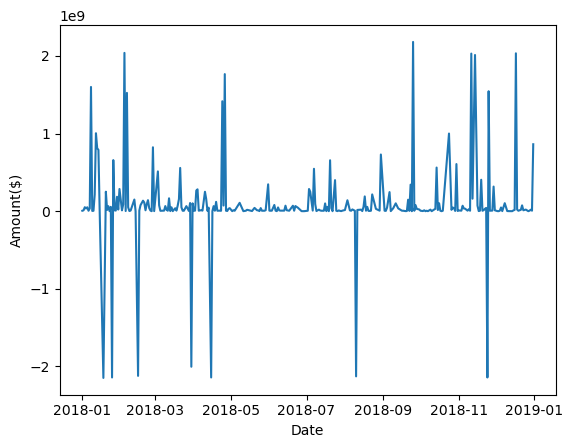

In [40]:
import seaborn as sns

# Plot a line chart of funding amounts over time
funding_over_time = ind_2018.groupby('Date')['Amount($)'].sum().reset_index()
sns.lineplot(data=funding_over_time, x='Date', y='Amount($)')
plt.show()


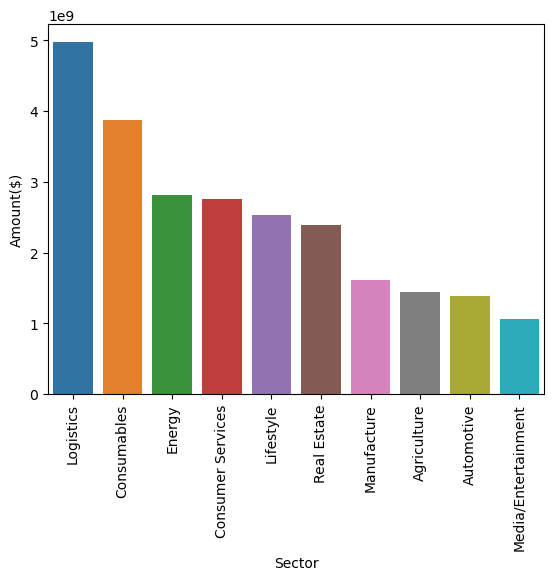

In [41]:
if ind_2018.empty:
    print("No data found for the year 2018")
else:
    # Calculate the total funding by sector
    total_funding_by_sector = ind_2018.groupby('Sector')['Amount($)'].sum().reset_index()

    top_10_sectors = total_funding_by_sector.sort_values(by='Amount($)', ascending=False).head(10)

    ax = sns.barplot(data=top_10_sectors, x='Sector', y='Amount($)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()


## 2019

## Accessing the shape of the data, Filling the missing the val with statistical means,Dropping columns,Creating a date series

In [42]:
ind_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [43]:
ind_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [44]:
ind_2019.describe()

,Founded
count,60.000000
mean,2014.533333
std,2.937003
min,2004.000000
25%,2013.000000
50%,2015.000000
75%,2016.250000
max,2019.000000


In [45]:
ind_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [46]:
ind_2019.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 89, dtype: bool

In [47]:
ind_2019['Sector'].replace('—', pd.np.nan, inplace=True)

ind_2019['Year']=2019

In [48]:
ind_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
Year              0
dtype: int64

In [49]:
ind_2019.loc[41, 'Sector'] = 'Media'
ind_2019.loc[49, 'Sector'] = 'Human Resources'
ind_2019.loc[52, 'Sector'] = 'Technology'
ind_2019.loc[56, 'Sector'] = 'Technology'
ind_2019.loc[57, 'Sector'] = 'E-Commerce'

In [50]:
ind_2019.drop('What it does',axis=1,inplace=True)

In [51]:
# # create a DatetimeIndex with dates for the entire year
date_range = pd.date_range(start='2019-01-01', end='2019-12-31', freq='D')

# # create a new column 'Date' with random dates within the year 2018
ind_2019['Date'] = np.random.choice(date_range, size=len(ind_2019))

ind_2019 = ind_2019.sort_values('Date')

ind_2019['Date'] = pd.to_datetime(ind_2019['Date'], format='%Y-%m-%d')

In [52]:
ind_2019.set_index('Date',inplace=True)

In [53]:
mode_value = ind_2019['Founders'].mode()[0]
print(mode_value)

mode_value = ind_2019['HeadQuarter'].mode()[0]
print(mode_value)

mode_value = ind_2019['Stage'].mode()[0]
print(mode_value)

Vivek Gupta, Abhay Hanjura
Bangalore
Series A


In [54]:
ind_2019['HeadQuarter'] = ind_2019['HeadQuarter'].fillna(ind_2019['HeadQuarter'].mode()[0])
ind_2019['Stage'] = ind_2019['Stage'].fillna(ind_2019['Stage'].mode()[0])
ind_2019['Founders'] = ind_2019['Founders'].fillna(ind_2019['Founders'].mode()[0])

In [55]:
ind_2019['HeadQuarter'] = ind_2019['HeadQuarter'].str.replace('New Delhi', 'Delhi')

In [56]:
unique_values = ind_2019['HeadQuarter'].unique()
print(unique_values)

['Bangalore' 'Pune' 'Jaipur' 'Delhi' 'Rajasthan' 'Noida' 'Gurugram'
 'Mumbai' 'Chennai' 'Telangana' 'Ahmedabad' 'Uttar pradesh' 'Hyderabad'
 'Chandigarh' 'Surat' 'Haryana']


## Using Statiscal means to fill the missing values in the founded column

In [57]:
ind_2019['Founded'] = pd.to_numeric(ind_2019['Founded'], errors='coerce')

In [58]:
ind_2019['Founded'] = ind_2019['Founded'].fillna(0)

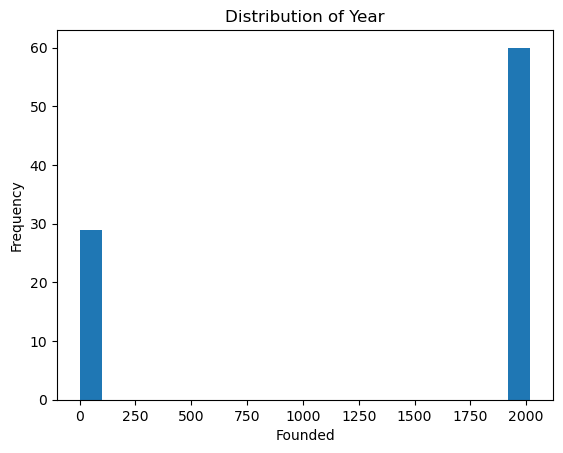

In [59]:
plt.hist(ind_2019['Founded'], bins=20)
plt.title('Distribution of Year')
plt.xlabel('Founded')
plt.ylabel('Frequency')
plt.show()

In [60]:
ind_2019['Founded'].replace(0, np.nan, inplace=True)

In [61]:
ind_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter       0
Sector            0
Founders          0
Investor          0
Amount($)         0
Stage             0
Year              0
dtype: int64

In [62]:
ind_2019['Founded'].fillna(ind_2019['Founded'].median(), inplace=True)

In [63]:
ind_2019['Founded'] = ind_2019['Founded'].astype(int)

## Restructuring the shape of the column & using statistical means to fill them, Restructuring the name convention of the sector column by containing it in a list of substrings and assigning it to name. 

In [64]:
ind_2019['Amount($)'].replace('', pd.np.nan, inplace=True)

In [65]:
ind_2019['Amount($)'] = ind_2019['Amount($)'].str.replace('[^\d\.]', '')

In [66]:
ind_2019['Amount($)'] = pd.to_numeric(ind_2019['Amount($)'])
ind_2019['Amount($)'] = pd.to_numeric(ind_2019['Amount($)'])

In [67]:
ind_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2019-01-03,TapChief,2016,Bangalore,Technology,"Shashank Murali, Binay Krishna, Arjun Krishna",Blume Ventures.,1500000.0,Pre series A,2019
2019-01-05,Pristyn Care,2018,Bangalore,Healthcare,"Harsimarbir Singh, Dr Vaibhav Kapoor, Dr Garim...","Sequoia India, Hummingbird Ventures, Greenoaks...",12000000.0,Series B,2019
2019-01-06,Ecozen,2015,Pune,AgriTech,"Devendra Gupta, Prateek Singhal, Vivek Pandey",Innovation in Food & Agriculture Fund (IFA Fund),6000000.0,Series A,2019
2019-01-18,SalaryFits,2015,Bangalore,Fintech,Renato Araujo,Brazilian VC Fund Confrapar,5000000.0,Series A,2019
2019-01-19,CarDekho,2008,Jaipur,Automobile,Amit Jain,"Ping An Global Voyager Fund, Hillhouse Capital...",70000000.0,Series D,2019


In [68]:
ind_2019.isna().sum()

Company/Brand     0
Founded           0
HeadQuarter       0
Sector            0
Founders          0
Investor          0
Amount($)        12
Stage             0
Year              0
dtype: int64

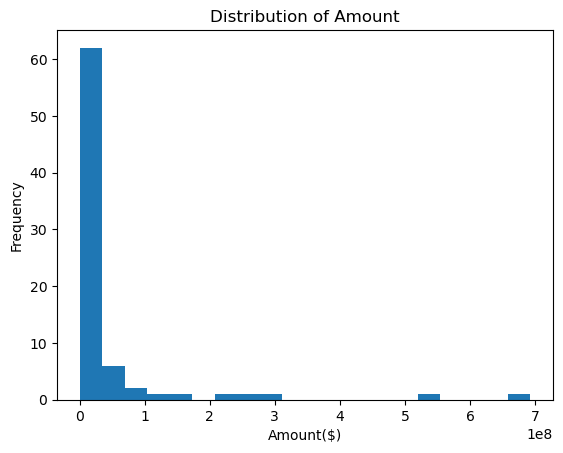

In [69]:
# Create a histogram of the 'Amount' column
plt.hist(ind_2019['Amount($)'], bins=20)
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.ylabel('Frequency')
plt.show()

In [70]:
ind_2019['Amount($)'] = ind_2019['Amount($)'].fillna(ind_2019['Amount($)'].median())

In [71]:
ind_2019['Amount($)'] = ind_2019['Amount($)'].astype(int)

In [72]:
ind_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2019-01-03,TapChief,2016,Bangalore,Technology,"Shashank Murali, Binay Krishna, Arjun Krishna",Blume Ventures.,1500000,Pre series A,2019
2019-01-05,Pristyn Care,2018,Bangalore,Healthcare,"Harsimarbir Singh, Dr Vaibhav Kapoor, Dr Garim...","Sequoia India, Hummingbird Ventures, Greenoaks...",12000000,Series B,2019
2019-01-06,Ecozen,2015,Pune,AgriTech,"Devendra Gupta, Prateek Singhal, Vivek Pandey",Innovation in Food & Agriculture Fund (IFA Fund),6000000,Series A,2019
2019-01-18,SalaryFits,2015,Bangalore,Fintech,Renato Araujo,Brazilian VC Fund Confrapar,5000000,Series A,2019
2019-01-19,CarDekho,2008,Jaipur,Automobile,Amit Jain,"Ping An Global Voyager Fund, Hillhouse Capital...",70000000,Series D,2019


In [73]:
ind_2019.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
dtype: int64

In [74]:
# # Create a list of substrings to search for in the Sector column
tech = ['Mobile','Technology', 'Internet', 'Software', 'Hardware','SaaS','Blockchain','Apps','Information Services','SEM',
        'Artificial Intelligence','CleanTech','Aerospace','Robotics','Ai','PaaS','Medtech','Agritech','HR tech',
       'Tech','FoodTech','Safety tech','IoT','Legal tech','Infratech','Netwokring platform','Telecommunication','Cloud','Aero',
       'Virtual','Content','Photonics','app','Proptech','Deeptech','AR','VR','Agri tech','-Tech','AgriTech','IT','Network',
        'Data','HrTech','Foodtech','Spacetech','E-mobility','Automation','Logitech','HRTech','Drone','MLOps','Innovation',
       'BioTechnology','TaaS','network','equipment','SpaceTech','CRM','MarTech','Nanotechnology','Femtech','startup','AI']
fin = ['Lending','Finance','Insurance', 'Payments','Financial Services','Credit','Credit Cards','Mutual Funds',
       'Banking','Escrow','Venture','financial','Taxation','Capital','firm','Equity']
fint = ['NFT','Virtual Banking','FinTech','Fintech','Cryptocurrency','Crypto','Insurtech','InsurTech']
health = ['Health', 'Medical','Pharmaceutical','Health Diagnotics','Health Care','Hospital','Biotechnology','Biopharma',
         'Hygiene management','HealthTech','Healthcare','HealthCare','laboratory','Biotech','Healthtech','HeathTech',
         'Helathcare','Veterinary']
mkt = ['Brand Marketing','Marketing','Event Promotion','Market']
agric = ['Farming','Agriculture','Nutrition','Hauz Khas','Fishery']
con = ['Food','Food and Beverages','Dairy','Beverages','Beer','FMCG']
econ = ['B2B','Shopping','E-Commerce','Trading Platform','E-commerce','E-marketplace','marketplace','e-commerce','Ecommerce',
        'E-market','Commerce','Trading platform']
cons = ['Wholesale','Consumer','Shoes','Packaging','Retail','Consulting','Food Delivery']
edu = ['E-Learning','EdTech','Education','Communities','Edtech','Preschool','School']
welln = ['Lifestyle','Beauty','Wellness','Cosmetics','Yoga','Skincare','D2C','Fitness','Lifestyle','Training']
real_est=['Real Estate','Home Decor','Accomodation','Interior design','Home Design','Home interior','Co-living',
          'Construction']
log = ['Logistics','Rental','Tourism','Travel','TravelTech','Transport','Transportation','Aviation','Mobility']

auto = ['Automotive','Electric vehicle','Industrial Automation','Vehicles','Automotive tech','Automobile','Tyre','car','Car',
       'Vehicle','Mechanical']
manu = ['Manufacturing']
ener = ['Renewable Energy','Solar','Energy','Energy Storage','Battery','Oil and Gas','Renewable','EV','Electricity',
       'purification','Renewables']
medi = ['Entertainment','Media','News','Video','Digital Media','FM','Publication','OTT','Social Network','Music',
        'Digital platform','Podcast','publishing','Blogging']
game = ['Gaming','Games','Sports']

style = ['Fashion','Jewelry','Eyeglasses','Eye Wear','Apparel','Dating','Celebrity','Eyewear','D2C Fashion','Matrimony',
         'Textiles','D2C jewellery','Foootwear','Arts']
hos =['Hospitality','Hotel','Leisure']


ind_2019['Sector_clean'] = 'Other'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(tech)), 'Sector_clean'] = 'Technology'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(fin)), 'Sector_clean'] = 'Finance'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(health)), 'Sector_clean'] = 'Healthcare'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(mkt)), 'Sector_clean'] = 'Marketing'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(agric)), 'Sector_clean'] = 'Agriculture'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(econ)), 'Sector_clean'] = 'E-Commerce'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(edu)), 'Sector_clean'] = 'Education'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(welln)), 'Sector_clean'] = 'Wellness/Beauty'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(real_est)), 'Sector_clean'] = 'Real Estate'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(log)), 'Sector_clean'] = 'Logistics'

ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(auto)), 'Sector_clean'] = 'Automotive'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(manu)), 'Sector_clean'] = 'Manufacture'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(ener)), 'Sector_clean'] = 'Energy'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(medi)), 'Sector_clean'] = 'Media/Entertainment'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(hos)), 'Sector_clean'] = 'Hospitality'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(style)), 'Sector_clean'] = 'Lifestyle'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(cons)), 'Sector_clean'] = 'Consumer Services'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(game)), 'Sector_clean'] = 'Gaming'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(fint)), 'Sector_clean'] = 'FinTech'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(con)), 'Sector_clean'] = 'Consumables'

In [75]:
ind_2019.drop('Sector',axis=1,inplace=True)

In [76]:
ind_2019= ind_2019.rename(columns={'Sector_clean': 'Sector'})

In [77]:
ind_2019.head()

,Company/Brand,Founded,HeadQuarter,Founders,Investor,Amount($),Stage,Year,Sector
Date,,,,,,,,,
2019-01-03,TapChief,2016,Bangalore,"Shashank Murali, Binay Krishna, Arjun Krishna",Blume Ventures.,1500000,Pre series A,2019,Technology
2019-01-05,Pristyn Care,2018,Bangalore,"Harsimarbir Singh, Dr Vaibhav Kapoor, Dr Garim...","Sequoia India, Hummingbird Ventures, Greenoaks...",12000000,Series B,2019,Automotive
2019-01-06,Ecozen,2015,Pune,"Devendra Gupta, Prateek Singhal, Vivek Pandey",Innovation in Food & Agriculture Fund (IFA Fund),6000000,Series A,2019,Technology
2019-01-18,SalaryFits,2015,Bangalore,Renato Araujo,Brazilian VC Fund Confrapar,5000000,Series A,2019,FinTech
2019-01-19,CarDekho,2008,Jaipur,Amit Jain,"Ping An Global Voyager Fund, Hillhouse Capital...",70000000,Series D,2019,Automotive


## Ploting Visuals to check the shape of the dataframe

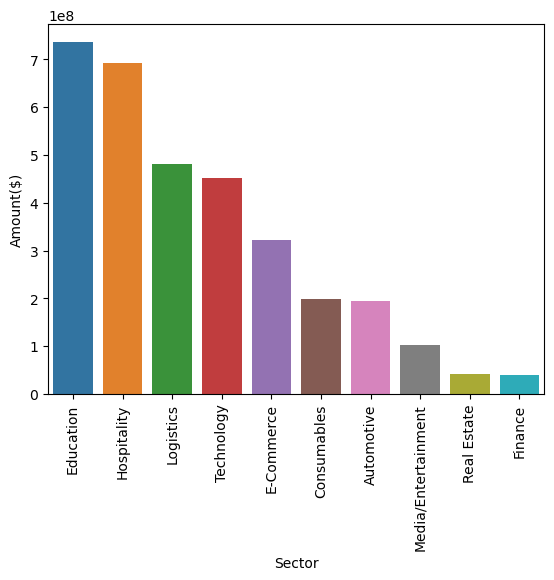

In [78]:
if ind_2019.empty:
    print("No data found for the year 2019")
else:
    # Calculate the total funding by sector
    total_funding_by_sector = ind_2019.groupby('Sector')['Amount($)'].sum().reset_index()

    top_10_sectors = total_funding_by_sector.sort_values(by='Amount($)', ascending=False).head(10)

    ax = sns.barplot(data=top_10_sectors, x='Sector', y='Amount($)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()


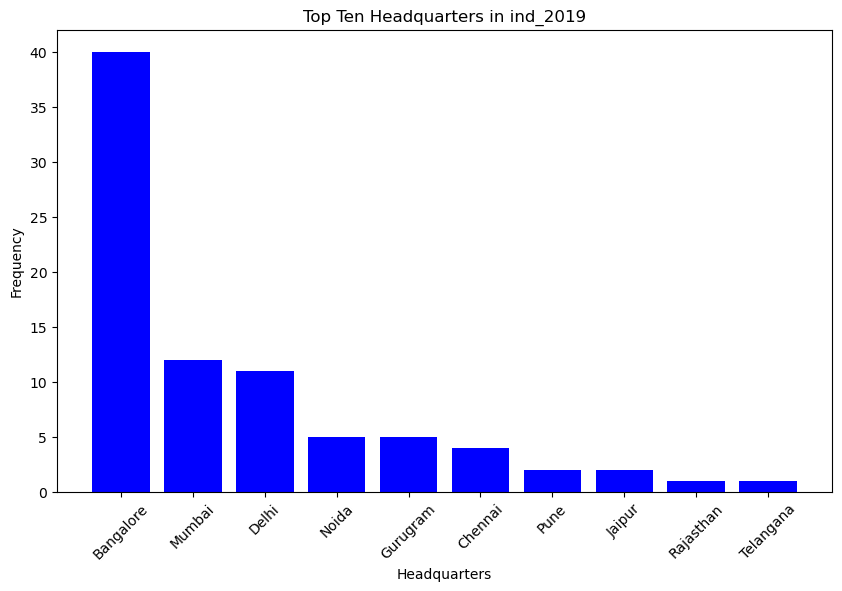

In [79]:
# Get the top ten headquarters
top_ten_hq = ind_2019['HeadQuarter'].value_counts().nlargest(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_ten_hq.index, top_ten_hq.values, color='blue')
plt.title('Top Ten Headquarters in ind_2019')
plt.xlabel('Headquarters')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## 2020

## Checking the shape of the data,Replace missing values and dropping,adding a date series

In [80]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN


In [81]:
ind_2020.describe()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
count,1055,843,961,1042,1055,1043,1017,1052,591,2
unique,905,27,77,302,990,927,848,309,42,2
top,Nykaa,2015,Bangalore,Fintech,Provides online learning classes,Falguni Nayar,Venture Catalysts,Undisclosed,Series A,Pre-Seed
freq,6,136,317,80,4,6,20,243,96,1


In [82]:
ind_2020['Sector'].replace('—', pd.np.nan, inplace=True)

ind_2020['Year']=2020

In [83]:
ind_2020.isna().sum()

Company/Brand       0
Founded           212
HeadQuarter        94
Sector             13
What it does        0
Founders           12
Investor           38
Amount($)           3
Stage             464
Unnamed: 9       1053
Year                0
dtype: int64

In [84]:
ind_2020.loc[518, 'Sector'] = 'E-Commerce'
ind_2020.loc[569, 'Sector'] = 'E-Commerce'
ind_2020.loc[687, 'Sector'] = 'Social Work'
ind_2020.loc[699, 'Sector'] = 'Beauty&Wellness'
ind_2020.loc[707, 'Sector'] = 'E-Commerce'
ind_2020.loc[732, 'Sector'] = 'Technology'
ind_2020.loc[746, 'Sector'] = 'E-Commerce'
ind_2020.loc[763, 'Sector'] = 'E-Commerce'
ind_2020.loc[746, 'Sector'] = 'E-Commerce'
ind_2020.loc[809, 'Sector'] = 'Technology'
ind_2020.loc[918, 'Sector'] = 'Fintech'
ind_2020.loc[926, 'Sector'] = 'Real Estate'
ind_2020.loc[1012, 'Sector'] = 'Technology'
ind_2020.loc[1031, 'Sector'] = 'Technology'
ind_2020.loc[746, 'Sector'] = 'E-Commerce'

In [85]:
ind_2020.isna().sum()

Company/Brand       0
Founded           212
HeadQuarter        94
Sector              0
What it does        0
Founders           12
Investor           38
Amount($)           3
Stage             464
Unnamed: 9       1053
Year                0
dtype: int64

In [86]:
ind_2020.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1050    False
1051    False
1052    False
1053    False
1054    False
Length: 1055, dtype: bool

In [87]:
ind_2020.drop_duplicates(inplace=True)

In [88]:
# create a DatetimeIndex with dates for the entire year
date_range = pd.date_range(start='2020-01-01', end='2020-12-31', freq='D')

# create a new column 'Date' with random dates within the year 2018
ind_2020['Date'] = np.random.choice(date_range, size=len(ind_2020))

ind_2020 = ind_2020.sort_values('Date')

ind_2020['Date'] = pd.to_datetime(ind_2020['Date'], format='%Y-%m-%d')

In [89]:
ind_2020.set_index('Date',inplace=True)

## Filling & replacing val in the HQ col using dictionary then filling in missing values for dif col, using substrings to alter some rows

In [90]:
cities_to_replace = ["Tirunelveli, Tamilnadu", "Frisco, Texas, United States", "Dhingsara, Haryana", "New York, United States",
"Jaipur, Rajastan", "Jaipur, Rajastan", "San Francisco, California, United States", "San Francisco, United States", 
 "San Ramon, California", "Paris, Ile-de-France, France", "Plano, Texas, United States",
"San Francisco Bay Area, Silicon Valley,West Coast", "London, England, United Kingdom", "Sydney, New South Wales, Australia", 
"Milano, Lombardia, Italy", "New York, United States", "Palmwoods, Queensland, Australia", "London, England, United Kingdom", 
"San Francisco Bay Area, West Coast, Western US", "Trivandrum, Kerala, India", "Samastipur, Bihar",
"Irvine, California, United States", "Tumkur, Karnataka", "San Francisco Bay Area, Silicon Valley, West Coast", 
"San Francisco, California, United States", "Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom", "Shanghai, China", 
"Jiaxing, Zhejiang, China", "Tangerang, Jawa Barat, Indonesia"]

new_cities = ['Tamilnadu', 'Texas', 'Haryana', 'New York', 'Rajastan', 'Rajastan', 'San Francisco', 'San Francisco', 
'San Ramon', 'Paris', 'Texas', 'San Francisco', 'London', 'Sydney', 'Milano', 'New York', 'Queensland', 'London', 
'San Francisco', 'Kerala', 'Biphar', 'California', 'Karnataka', 'San Francisco', 'San Francisco', 'Newcastle', 'Shanghai', 
'Jiaxing', 'Jawa Barat']

for city, new_city in zip(cities_to_replace, new_cities):
    ind_2020['HeadQuarter'] = ind_2020['HeadQuarter'].apply(lambda x: new_city if city in str(x) else x)


In [91]:
ind_2020.isna().sum()

Company/Brand       0
Founded           212
HeadQuarter        94
Sector              0
What it does        0
Founders           12
Investor           38
Amount($)           3
Stage             462
Unnamed: 9       1050
Year                0
dtype: int64

In [92]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9,Year
Date,,,,,,,,,,,
2020-01-01,DaveAI,NaN,Bangalore,AI,Sales augmentation platform with a vision to d...,"Ananthakrishnan Gopal, Ashok Balasundaram, Sri...",Mumbai Angels Network,Undisclosed,NaN,NaN,2020
2020-01-01,Eloelo,2020,Bangalore,Social commerce,Social Commerce Venture for Wellness. View com...,"Saurabh Pandey, Akshay Dubey",NaN,"$450,000",Seed,NaN,2020
2020-01-02,Kuku FM,NaN,Mumbai,Media,A podcast platform,"Lal Chand Bisu, Vikas Goyal, Vinod Kumar Meena",Vertex Ventures,"$5,500,000",Series A,NaN,2020
2020-01-02,Tango Eye,2018,Chennai,SaaS startup,Retail Video Analytics SaaS product,Surender Gounder,"Riso Investments, Lenskart",Undisclosed,Seed,NaN,2020
2020-01-02,Phononic Vibes,2018,Milano,Deeptech,Phononic Vibes introduces a new patented techn...,"Andrea Boeri, Braghin Francesco, Giovanni Cape...",NaN,"$2,300,000",NaN,NaN,2020


In [93]:
mode_value = ind_2020['Founders'].mode()[0]
print(mode_value)

mode_value = ind_2020['Stage'].mode()[0]
print(mode_value)

mode_value = ind_2020['Investor'].mode()[0]
print(mode_value)

mode_value = ind_2020['HeadQuarter'].mode()[0]
print(mode_value)

Byju Raveendran
Series A
Venture Catalysts
Bangalore


In [94]:
ind_2020['Founders'] = ind_2020['Founders'].fillna(ind_2020['Founders'].mode()[0])
ind_2020['Stage'] = ind_2020['Stage'].fillna(ind_2020['Stage'].mode()[0])
ind_2020['Investor'] = ind_2020['Investor'].fillna(ind_2020['Investor'].mode()[0])
ind_2020['HeadQuarter'] = ind_2020['HeadQuarter'].fillna(ind_2020['HeadQuarter'].mode()[0])

In [95]:
ind_2020['HeadQuarter'] = ind_2020['HeadQuarter'].str.replace('New Delhi', 'Delhi')
ind_2020['HeadQuarter'] = ind_2020['HeadQuarter'].str.replace('Banglore', 'Bangalore')
ind_2020['HeadQuarter'] = ind_2020['HeadQuarter'].str.replace('Gurgaon', 'Gurugram')

In [96]:
unique_values = ind_2020['HeadQuarter'].unique()
print(unique_values)

['Bangalore' 'Mumbai' 'Chennai' 'Milano' 'Indore' 'Delhi' 'Odisha'
 'Hyderabad' 'Haryana' 'Gurugram' 'Pune' 'Kolkata' 'Noida' 'Kochi'
 'Sydney' 'Jodhpur' 'New York' 'Ahmedabad' 'Bhopal' 'San Francisco'
 'Gujarat' 'Kerala' 'Goa' 'Queensland' 'California' 'Patna' 'San Ramon'
 'Rajastan' 'Thane' 'Seattle' 'Cochin' 'Singapore' 'Jaipur' 'Kanpur'
 'Newcastle' 'Dehradun' 'Belgaum' 'Shanghai' 'Bihar' 'London' 'Biphar'
 'Andheri' 'Texas' 'Tamil Nadu' 'Paris' 'Warangal' 'Jiaxing' 'Hyderebad'
 'San Franciscao' 'Chandigarh' 'Riyadh' 'Bangaldesh' 'France' 'Berlin'
 'Karnataka' 'Jawa Barat' 'Seoul' 'Uttar Pradesh' 'Bengaluru' 'Ludhiana'
 'Bangkok' 'Coimbatore' 'Tamilnadu']


In [97]:
seedr = ['seed round','Seed round','Seed Round',]
preser= ['Pre Series A','Pre series A','Pre-series A','Pre-Series A']

ind_2020.loc[ind_2020['Stage'].str.contains('|'.join(seedr)), 'Stage'] = 'Seed Round'
ind_2020.loc[ind_2020['Stage'].str.contains('|'.join(preser)), 'Stage'] = 'Pre-series A'

In [98]:
ind_2020['Founded'] = pd.to_numeric(ind_2020['Founded'], errors='coerce')

ind_2020['Founded'] = ind_2020['Founded'].fillna(0)

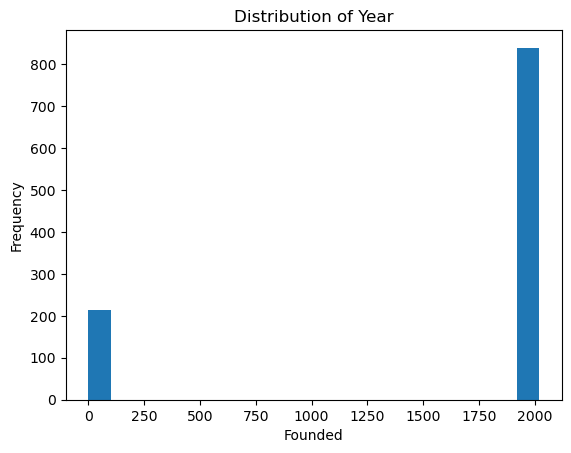

In [99]:
plt.hist(ind_2020['Founded'], bins=20)
plt.title('Distribution of Year')
plt.xlabel('Founded')
plt.ylabel('Frequency')
plt.show()

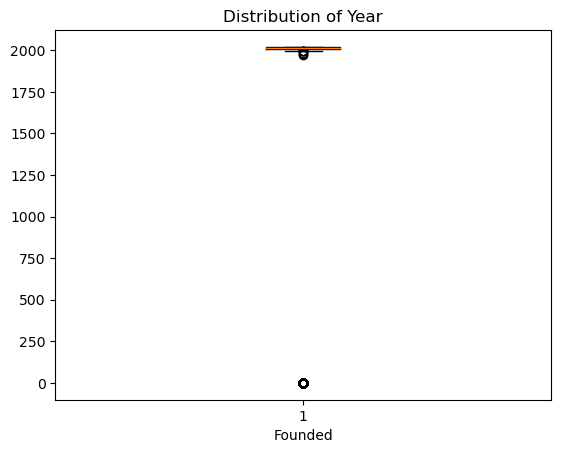

In [100]:
plt.boxplot(ind_2020['Founded'].dropna())
plt.title('Distribution of Year')
plt.xlabel('Founded')
plt.show()

In [101]:
ind_2020['Founded'].replace(0, np.nan, inplace=True)

In [102]:
ind_2020['Founded'].fillna(ind_2020['Founded'].median(), inplace=True)

ind_2020['Founded'] = ind_2020['Founded'].astype(int)

In [103]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9,Year
Date,,,,,,,,,,,
2020-01-01,DaveAI,2016,Bangalore,AI,Sales augmentation platform with a vision to d...,"Ananthakrishnan Gopal, Ashok Balasundaram, Sri...",Mumbai Angels Network,Undisclosed,Series A,NaN,2020
2020-01-01,Eloelo,2020,Bangalore,Social commerce,Social Commerce Venture for Wellness. View com...,"Saurabh Pandey, Akshay Dubey",Venture Catalysts,"$450,000",Seed,NaN,2020
2020-01-02,Kuku FM,2016,Mumbai,Media,A podcast platform,"Lal Chand Bisu, Vikas Goyal, Vinod Kumar Meena",Vertex Ventures,"$5,500,000",Series A,NaN,2020
2020-01-02,Tango Eye,2018,Chennai,SaaS startup,Retail Video Analytics SaaS product,Surender Gounder,"Riso Investments, Lenskart",Undisclosed,Seed,NaN,2020
2020-01-02,Phononic Vibes,2018,Milano,Deeptech,Phononic Vibes introduces a new patented techn...,"Andrea Boeri, Braghin Francesco, Giovanni Cape...",Venture Catalysts,"$2,300,000",Series A,NaN,2020


In [104]:
ind_2020.drop('What it does',axis=1,inplace=True)

In [105]:
ind_2020.drop('Unnamed: 9',axis=1,inplace=True)

In [106]:
ind_2020.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        3
Stage            0
Year             0
dtype: int64

In [107]:
ind_2020.head(50)

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2020-01-01,DaveAI,2016,Bangalore,AI,"Ananthakrishnan Gopal, Ashok Balasundaram, Sri...",Mumbai Angels Network,Undisclosed,Series A,2020
2020-01-01,Eloelo,2020,Bangalore,Social commerce,"Saurabh Pandey, Akshay Dubey",Venture Catalysts,"$450,000",Seed,2020
2020-01-02,Kuku FM,2016,Mumbai,Media,"Lal Chand Bisu, Vikas Goyal, Vinod Kumar Meena",Vertex Ventures,"$5,500,000",Series A,2020
2020-01-02,Tango Eye,2018,Chennai,SaaS startup,Surender Gounder,"Riso Investments, Lenskart",Undisclosed,Seed,2020
2020-01-02,Phononic Vibes,2018,Milano,Deeptech,"Andrea Boeri, Braghin Francesco, Giovanni Cape...",Venture Catalysts,"$2,300,000",Series A,2020
2020-01-02,Pepper Content,2017,Mumbai,Content marketplace,"Anirudh Singla, Rishabh Shekhar","Alok Mittal, Manan Maheshwari","$4,200,000",Series A,2020
2020-01-02,GenieTalk,2016,Indore,Tech company,"Santosh Kataria, Ankit Kimtee, Vivek Jain",Venture Catalysts,"$750,000",Series A,2020
2020-01-03,Crysta,2018,Delhi,Healthtech,Byju Raveendran,"Green Shots Capital, Alfa Ventures, Real Time ...","$1,403,400",Pre-series A,2020
2020-01-03,Expertrons,2019,Mumbai,EdTech,Jatin Solanki,"Rohit Chanana, Sukanta Ganguly",Undisclosed,Series A,2020


## Converting the structure of the amt col,filling missing val with stats data,creating a substring to structure the sector column

In [108]:
ind_2020['Amount($)'].replace('', pd.np.nan, inplace=True)
ind_2020['Amount($)'] = ind_2020['Amount($)'].replace('undisclosed', np.nan)

In [109]:
# if it is not already a string, convert it to string
if ind_2020['Amount($)'].dtype != 'object':
    ind_2020['Amount($)'] = ind_2020['Amount($)'].astype(str)

# # remove non-numeric characters from the 'Amount' column
ind_2020['Amount($)'] = ind_2020['Amount($)'].str.replace('[^\d\.]', '')

ind_2020['Amount($)'] = pd.to_numeric(ind_2020['Amount($)'])

In [110]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2020-01-01,DaveAI,2016,Bangalore,AI,"Ananthakrishnan Gopal, Ashok Balasundaram, Sri...",Mumbai Angels Network,NaN,Series A,2020
2020-01-01,Eloelo,2020,Bangalore,Social commerce,"Saurabh Pandey, Akshay Dubey",Venture Catalysts,450000.0,Seed,2020
2020-01-02,Kuku FM,2016,Mumbai,Media,"Lal Chand Bisu, Vikas Goyal, Vinod Kumar Meena",Vertex Ventures,5500000.0,Series A,2020
2020-01-02,Tango Eye,2018,Chennai,SaaS startup,Surender Gounder,"Riso Investments, Lenskart",NaN,Seed,2020
2020-01-02,Phononic Vibes,2018,Milano,Deeptech,"Andrea Boeri, Braghin Francesco, Giovanni Cape...",Venture Catalysts,2300000.0,Series A,2020


In [111]:
ind_2020['Amount($)'] = ind_2020['Amount($)'].fillna(0)

In [112]:
ind_2020.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
dtype: int64

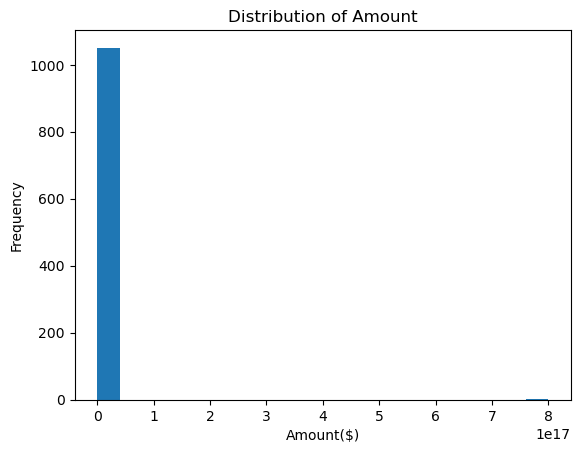

In [113]:
plt.hist(ind_2020['Amount($)'], bins=20)
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.ylabel('Frequency')
plt.show()

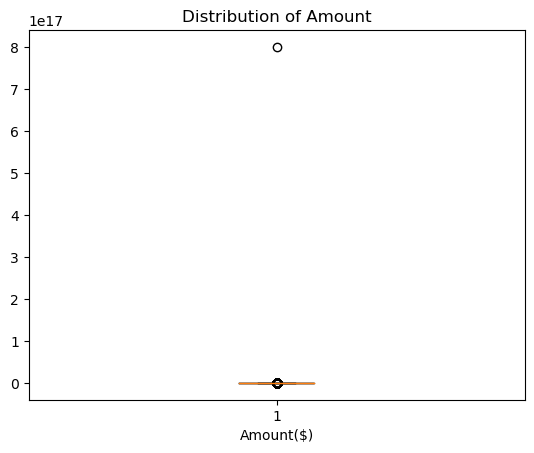

In [114]:
plt.boxplot(ind_2020['Amount($)'])
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.show()

In [115]:
ind_2020['Amount($)'].replace(0, np.nan, inplace=True)

In [116]:
ind_2020.isna().sum()

Company/Brand      0
Founded            0
HeadQuarter        0
Sector             0
Founders           0
Investor           0
Amount($)        247
Stage              0
Year               0
dtype: int64

In [117]:
ind_2020['Amount($)'].fillna(ind_2020['Amount($)'].median(), inplace=True)

ind_2020['Amount($)'] = ind_2020['Amount($)'].astype(int)

In [118]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2020-01-01,DaveAI,2016,Bangalore,AI,"Ananthakrishnan Gopal, Ashok Balasundaram, Sri...",Mumbai Angels Network,3000000,Series A,2020
2020-01-01,Eloelo,2020,Bangalore,Social commerce,"Saurabh Pandey, Akshay Dubey",Venture Catalysts,450000,Seed,2020
2020-01-02,Kuku FM,2016,Mumbai,Media,"Lal Chand Bisu, Vikas Goyal, Vinod Kumar Meena",Vertex Ventures,5500000,Series A,2020
2020-01-02,Tango Eye,2018,Chennai,SaaS startup,Surender Gounder,"Riso Investments, Lenskart",3000000,Seed,2020
2020-01-02,Phononic Vibes,2018,Milano,Deeptech,"Andrea Boeri, Braghin Francesco, Giovanni Cape...",Venture Catalysts,2300000,Series A,2020


In [119]:
# # Create a list of substrings to search for in the Sector column
tech = ['Mobile','Technology', 'Internet', 'Software', 'Hardware','SaaS','Blockchain','Apps','Information Services','SEM',
        'Artificial Intelligence','CleanTech','Aerospace','Robotics','Ai','PaaS','Medtech','Agritech','HR tech',
       'Tech','FoodTech','Safety tech','IoT','Legal tech','Infratech','Netwokring platform','Telecommunication','Cloud','Aero',
       'Virtual','Content','Photonics','app','Proptech','Deeptech','AR','VR','Agri tech','-Tech','AgriTech','IT','Network',
        'Data','HrTech','Foodtech','Spacetech','E-mobility','Automation','Logitech','HRTech','Drone','MLOps','Innovation',
       'BioTechnology','TaaS','network','equipment','SpaceTech','CRM','MarTech','Nanotechnology','Femtech','startup','AI']
fin = ['Lending','Finance','Insurance', 'Payments','Financial Services','Credit','Credit Cards','Mutual Funds',
       'Banking','Escrow','Venture','financial','Taxation','Capital','firm','Equity']
fint = ['NFT','Virtual Banking','FinTech','Fintech','Cryptocurrency','Crypto','Insurtech','InsurTech']
health = ['Health', 'Medical','Pharmaceutical','Health Diagnotics','Health Care','Hospital','Biotechnology','Biopharma',
         'Hygiene management','HealthTech','Healthcare','HealthCare','laboratory','Biotech','Healthtech','HeathTech',
         'Helathcare','Veterinary']
mkt = ['Brand Marketing','Marketing','Event Promotion','Market']
agric = ['Farming','Agriculture','Nutrition','Hauz Khas','Fishery']
con = ['Food','Food and Beverages','Dairy','Beverages','Beer','FMCG','Beverage']
econ = ['B2B','Shopping','E-Commerce','Trading Platform','E-commerce','E-marketplace','marketplace','e-commerce','Ecommerce',
        'E-market','Commerce','Trading platform']
cons = ['Wholesale','Consumer','Shoes','Packaging','Retail','Consulting','Food Delivery']
edu = ['E-Learning','EdTech','Education','Communities','Edtech','Preschool','School']
welln = ['Lifestyle','Beauty','Wellness','Cosmetics','Yoga','Skincare','D2C','Fitness','Lifestyle','Training']
real_est=['Real Estate','Home Decor','Accomodation','Interior design','Home Design','Home interior','Co-living',
          'Construction']
log = ['Logistics','Rental','Tourism','Travel','TravelTech','Transport','Transportation','Aviation','Mobility']

auto = ['Automotive','Electric vehicle','Industrial Automation','Vehicles','Automotive tech','Automobile','Tyre','car','Car',
       'Vehicle','Mechanical']
manu = ['Manufacturing']
ener = ['Renewable Energy','Solar','Energy','Energy Storage','Battery','Oil and Gas','Renewable','EV','Electricity',
       'purification','Renewables']
medi = ['Entertainment','Media','News','Video','Digital Media','FM','Publication','OTT','Social Network','Music',
        'Digital platform','Podcast','publishing','Blogging']
game = ['Gaming','Games','Sports']

style = ['Fashion','Jewelry','Eyeglasses','Eye Wear','Apparel','Dating','Celebrity','Eyewear','D2C Fashion','Matrimony',
         'Textiles','D2C jewellery','Foootwear','Arts']
hos =['Hospitality','Hotel','Leisure']


ind_2020['Sector_clean'] = 'Other'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(tech)), 'Sector_clean'] = 'Technology'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(fin)), 'Sector_clean'] = 'Finance'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(health)), 'Sector_clean'] = 'Healthcare'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(mkt)), 'Sector_clean'] = 'Marketing'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(agric)), 'Sector_clean'] = 'Agriculture'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(econ)), 'Sector_clean'] = 'E-Commerce'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(edu)), 'Sector_clean'] = 'Education'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(welln)), 'Sector_clean'] = 'Wellness/Beauty'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(real_est)), 'Sector_clean'] = 'Real Estate'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(log)), 'Sector_clean'] = 'Logistics'

ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(auto)), 'Sector_clean'] = 'Automotive'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(manu)), 'Sector_clean'] = 'Manufacture'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(ener)), 'Sector_clean'] = 'Energy'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(medi)), 'Sector_clean'] = 'Media/Entertainment'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(hos)), 'Sector_clean'] = 'Hospitality'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(style)), 'Sector_clean'] = 'Lifestyle'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(cons)), 'Sector_clean'] = 'Consumer Services'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(game)), 'Sector_clean'] = 'Gaming'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(fint)), 'Sector_clean'] = 'FinTech'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(con)), 'Sector_clean'] = 'Consumables'

In [120]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year,Sector_clean
Date,,,,,,,,,,
2020-01-01,DaveAI,2016,Bangalore,AI,"Ananthakrishnan Gopal, Ashok Balasundaram, Sri...",Mumbai Angels Network,3000000,Series A,2020,Technology
2020-01-01,Eloelo,2020,Bangalore,Social commerce,"Saurabh Pandey, Akshay Dubey",Venture Catalysts,450000,Seed,2020,Other
2020-01-02,Kuku FM,2016,Mumbai,Media,"Lal Chand Bisu, Vikas Goyal, Vinod Kumar Meena",Vertex Ventures,5500000,Series A,2020,Media/Entertainment
2020-01-02,Tango Eye,2018,Chennai,SaaS startup,Surender Gounder,"Riso Investments, Lenskart",3000000,Seed,2020,Technology
2020-01-02,Phononic Vibes,2018,Milano,Deeptech,"Andrea Boeri, Braghin Francesco, Giovanni Cape...",Venture Catalysts,2300000,Series A,2020,Technology


In [121]:
ind_2020.drop('Sector',axis=1,inplace=True)

In [122]:
ind_2020= ind_2020.rename(columns={'Sector_clean': 'Sector'})

In [123]:
ind_2020.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
Sector           0
dtype: int64

In [124]:
ind_2020.head(50)

,Company/Brand,Founded,HeadQuarter,Founders,Investor,Amount($),Stage,Year,Sector
Date,,,,,,,,,
2020-01-01,DaveAI,2016,Bangalore,"Ananthakrishnan Gopal, Ashok Balasundaram, Sri...",Mumbai Angels Network,3000000,Series A,2020,Technology
2020-01-01,Eloelo,2020,Bangalore,"Saurabh Pandey, Akshay Dubey",Venture Catalysts,450000,Seed,2020,Other
2020-01-02,Kuku FM,2016,Mumbai,"Lal Chand Bisu, Vikas Goyal, Vinod Kumar Meena",Vertex Ventures,5500000,Series A,2020,Media/Entertainment
2020-01-02,Tango Eye,2018,Chennai,Surender Gounder,"Riso Investments, Lenskart",3000000,Seed,2020,Technology
2020-01-02,Phononic Vibes,2018,Milano,"Andrea Boeri, Braghin Francesco, Giovanni Cape...",Venture Catalysts,2300000,Series A,2020,Technology
2020-01-02,Pepper Content,2017,Mumbai,"Anirudh Singla, Rishabh Shekhar","Alok Mittal, Manan Maheshwari",4200000,Series A,2020,E-Commerce
2020-01-02,GenieTalk,2016,Indore,"Santosh Kataria, Ankit Kimtee, Vivek Jain",Venture Catalysts,750000,Series A,2020,Technology
2020-01-03,Crysta,2018,Delhi,Byju Raveendran,"Green Shots Capital, Alfa Ventures, Real Time ...",1403400,Pre-series A,2020,Healthcare
2020-01-03,Expertrons,2019,Mumbai,Jatin Solanki,"Rohit Chanana, Sukanta Ganguly",3000000,Series A,2020,Education


## Ploting visuals to check the dataframe shape

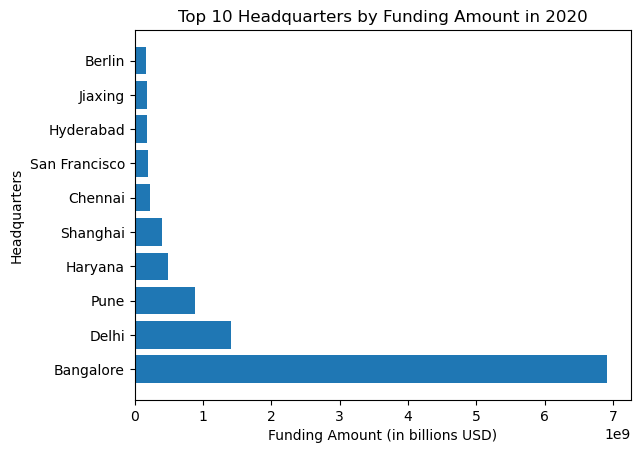

In [125]:
top10_hq = ind_2020.groupby('HeadQuarter')['Amount($)'].sum().sort_values(ascending=False)[:10]

plt.barh(top10_hq.index, top10_hq.values)
plt.title('Top 10 Headquarters by Funding Amount in 2020')
plt.xlabel('Funding Amount (in billions USD)')
plt.ylabel('Headquarters')
plt.show()

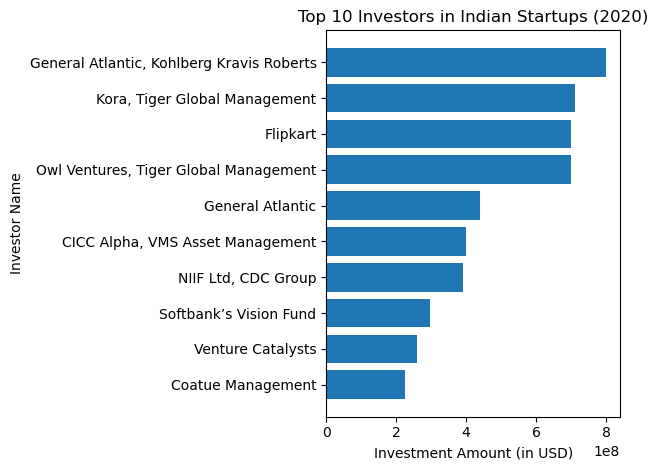

In [126]:
top10_investors = ind_2020.groupby('Investor')['Amount($)'].sum().nlargest(10)

plt.barh(top10_investors.index[::-1], top10_investors.values[::-1])
plt.xlabel('Investment Amount (in USD)')
plt.ylabel('Investor Name')
plt.title('Top 10 Investors in Indian Startups (2020)')
plt.tight_layout()
plt.show()

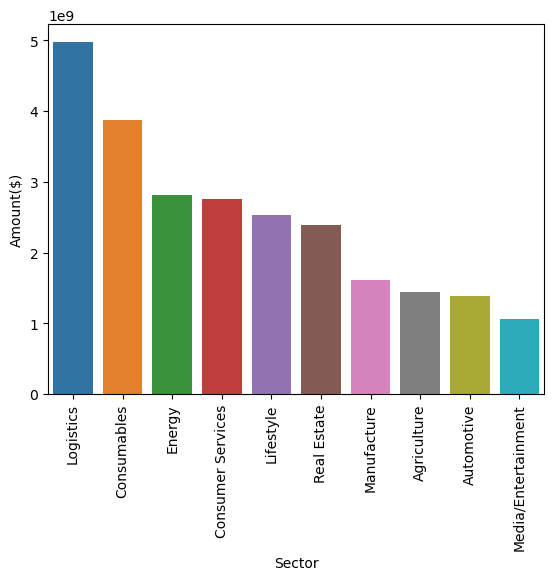

In [127]:
if ind_2020.empty:
    print("No data found for the year 2018")
else:
    # Calculate the total funding by sector
    total_funding_by_sector = ind_2018.groupby('Sector')['Amount($)'].sum().reset_index()

    top_10_sectors = total_funding_by_sector.sort_values(by='Amount($)', ascending=False).head(10)

    ax = sns.barplot(data=top_10_sectors, x='Sector', y='Amount($)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()


## 2021

## checking the data shape / filling missing values/ creating a date series

In [128]:
ind_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [129]:
ind_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [130]:
ind_2021.describe()

,Founded
count,1208.000000
mean,2016.655629
std,4.517364
min,1963.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


In [131]:
ind_2021.isna().sum()

Company/Brand      0
Founded            1
HeadQuarter        1
Sector             0
What it does       0
Founders           4
Investor          62
Amount($)          3
Stage            428
dtype: int64

In [132]:
# replace empty values with NaN
ind_2021['Sector'].replace('—', pd.np.nan, inplace=True)

ind_2021['Year']=2021

In [133]:
ind_2021.isna().sum()

Company/Brand      0
Founded            1
HeadQuarter        1
Sector             0
What it does       0
Founders           4
Investor          62
Amount($)          3
Stage            428
Year               0
dtype: int64

In [134]:
# create a DatetimeIndex with dates for the entire year
date_range = pd.date_range(start='2021-01-01', end='2021-12-31', freq='D')

# create a new column 'Date' with random dates within the year 2018
ind_2021['Date'] = np.random.choice(date_range, size=len(ind_2021))

ind_2021 = ind_2021.sort_values('Date')

ind_2021['Date'] = pd.to_datetime(ind_2021['Date'], format='%Y-%m-%d')


## mask to identify rows where the 'Stage' column contains a dollar sign and assigns the value in that row to the 'Amount column,drop specific rows by their index number and assign 'NaN' values 

In [135]:
ind_2021.head(50)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year,Date
776,OYO,2012.0,Gurugram,Hospitality,OYO operates a branded network of hotels desig...,Ritesh Agarwal,Hindustan Media Venture,"$200,000,000",NaN,2021,2021-01-01
306,Neobank Jupiter,2019.0,Mumbai,Banking,Jupiter is a digital banking app with one simp...,Jitendra Gupta,"Tiger Global, Sequoia Capital",$86000000,Series C,2021,2021-01-01
941,Loop Health,2018.0,Pune,Hospital & Health Care,India's first health insurance with unlimited ...,"Amrit Singh, Mayank Kale","Elevation, General Catalyst",$12000000,NaN,2021,2021-01-02
756,Euler Motors,2018.0,New Delhi,Automotive,Electric Light Commercial Vehicle,Saurav Kumar,"ADB Ventures, Jetty Ventures","$2,600,000",Series A,2021,2021-01-02
688,LegalPay,2019.0,New Delhi,FinTech,A tech focused B2B litigation finance company ...,Kundan Shahi,Ashwini Kakkar. 9Unicorns,$Undisclosed,NaN,2021,2021-01-02
485,Learn4o Technology,2020.0,Jaipur,E-learning,Trying to solve the problem of unemployment in...,Kamal Kant Gupta,IAN,$undisclosed,Seed,2021,2021-01-03
412,DeHaat,2012.0,Patna,AgriTech,DeHaat connects farmers to suppliers and buyer...,"Shashank Kumar, Manish Kumar","Prosus Ventures, RTP Global","$30,000,000",Series C,2021,2021-01-03
1031,BharatPe,2018.0,New Delhi,Financial Services,BharatPe launched India’s first UPI interopera...,"Ashneer Grover, Shashvat Nakrani",MAS Financial Services,$10000000,NaN,2021,2021-01-03
803,ideaForge,2007.0,Mumbai,Drone,ideaForge is an Indian company engaged in the ...,"Ankit Mehta, Ashish Bhat","Infosys, Qualcomm Ventures","$2,000,000",NaN,2021,2021-01-03
314,OneCard,2019.0,Pune,Financial Services,"India's finest and smartest metal credit card,...","Rupesh Kumar, Anurag Sinha, Vibhav Hathi","Ocean View Investment, QED Fund",$76000000,NaN,2021,2021-01-04


In [136]:
mask = (~ind_2021['Stage'].isna()) & ind_2021['Stage'].str.contains('\$')
ind_2021.loc[mask, 'Amount($)'] = ind_2021.loc[mask, 'Stage']
ind_2021.loc[mask, 'Stage'] = ''

mask = (~ind_2021['Investor'].isna()) & ind_2021['Investor'].str.contains('\$')
ind_2021.loc[mask, 'Amount($)'] = ind_2021.loc[mask, 'Investor']
ind_2021.loc[mask, 'Investor'] = ''


ind_2021 = ind_2021.drop(111)

ind_2021 = ind_2021.drop(256)

ind_2021.loc[902, 'Investor'] = np.nan

ind_2021.loc[59, 'Investor'] = np.nan

ind_2021.loc[1100, 'Investor'] = np.nan

ind_2021.loc[1148, 'Investor'] = np.nan

In [137]:
ind_2021.head(60)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year,Date
776,OYO,2012.0,Gurugram,Hospitality,OYO operates a branded network of hotels desig...,Ritesh Agarwal,Hindustan Media Venture,"$200,000,000",NaN,2021,2021-01-01
306,Neobank Jupiter,2019.0,Mumbai,Banking,Jupiter is a digital banking app with one simp...,Jitendra Gupta,"Tiger Global, Sequoia Capital",$86000000,Series C,2021,2021-01-01
941,Loop Health,2018.0,Pune,Hospital & Health Care,India's first health insurance with unlimited ...,"Amrit Singh, Mayank Kale","Elevation, General Catalyst",$12000000,NaN,2021,2021-01-02
756,Euler Motors,2018.0,New Delhi,Automotive,Electric Light Commercial Vehicle,Saurav Kumar,"ADB Ventures, Jetty Ventures","$2,600,000",Series A,2021,2021-01-02
688,LegalPay,2019.0,New Delhi,FinTech,A tech focused B2B litigation finance company ...,Kundan Shahi,Ashwini Kakkar. 9Unicorns,$Undisclosed,NaN,2021,2021-01-02
485,Learn4o Technology,2020.0,Jaipur,E-learning,Trying to solve the problem of unemployment in...,Kamal Kant Gupta,IAN,$undisclosed,Seed,2021,2021-01-03
412,DeHaat,2012.0,Patna,AgriTech,DeHaat connects farmers to suppliers and buyer...,"Shashank Kumar, Manish Kumar","Prosus Ventures, RTP Global","$30,000,000",Series C,2021,2021-01-03
1031,BharatPe,2018.0,New Delhi,Financial Services,BharatPe launched India’s first UPI interopera...,"Ashneer Grover, Shashvat Nakrani",MAS Financial Services,$10000000,NaN,2021,2021-01-03
803,ideaForge,2007.0,Mumbai,Drone,ideaForge is an Indian company engaged in the ...,"Ankit Mehta, Ashish Bhat","Infosys, Qualcomm Ventures","$2,000,000",NaN,2021,2021-01-03
314,OneCard,2019.0,Pune,Financial Services,"India's finest and smartest metal credit card,...","Rupesh Kumar, Anurag Sinha, Vibhav Hathi","Ocean View Investment, QED Fund",$76000000,NaN,2021,2021-01-04


In [138]:
ind_2021['HeadQuarter'].ffill(inplace=True)

ind_2021['Stage'] = ind_2021['Stage'].fillna(ind_2021['Stage'].mode()[0])

In [139]:
mode_value = ind_2021['Investor'].mode()[0]
print(mode_value)

Inflection Point Ventures


In [140]:
ind_2021['Investor'] = ind_2021['Investor'].fillna(ind_2021['Investor'].mode()[0])

In [141]:
mode_value = ind_2021['Founders'].mode()[0]
print(mode_value)

Ashneer Grover, Shashvat Nakrani


In [142]:
ind_2021['Founders'] = ind_2021['Founders'].fillna(ind_2021['Founders'].mode()[0])

In [143]:
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].str.replace('New Delhi', 'Delhi')
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].str.replace('Gurgaon', 'Gurugram')

In [144]:
unique_values = ind_2021['HeadQuarter'].unique()
print(unique_values)

['Gurugram' 'Mumbai' 'Pune' 'Delhi' 'Jaipur' 'Patna' 'Chennai' 'Bangalore'
 'Noida' 'Mohali' 'Surat' 'The Nilgiris' 'Gandhinagar' 'Ahmedabad'
 'Gujarat' 'Ranchi' 'Beijing' 'Ambernath' 'Jodhpur' 'Silvassa'
 'Information Technology & Services' 'Cochin' 'Faridabad' 'Kolkata'
 'Orissia' 'Lucknow' 'Powai' 'Hyderabad' 'Kottayam' 'Haryana' 'Nagpur'
 'Guwahati' 'Coimbatore' 'Thiruvananthapuram' 'Faridabad, Haryana' 'Kochi'
 'Thane' 'Chandigarh' 'Telangana' 'Indore' 'Ahmadabad' 'Mangalore'
 'Rajsamand' 'Santra' 'Online Media\t#REF!' 'Computer Games' 'Trivandrum'
 'Goa' 'Bhilwara' 'New York' 'Kanpur' 'Ghaziabad' 'Telugana' 'Samsitpur'
 'West Bengal' 'London' 'Gurugram\t#REF!' 'Pharmaceuticals\t#REF!'
 'Small Towns, Andhra Pradesh' 'Panaji' 'Panchkula' 'Bhubaneswar'
 'Food & Beverages' 'Satara' 'Roorkee' 'Jharkhand' 'Andheri' 'Vadodara'
 'Mountain View, CA']


In [145]:
ind_2021.drop('What it does', axis=1,inplace=True)

## Replacing the missing values in the founded column by using Statiscal means

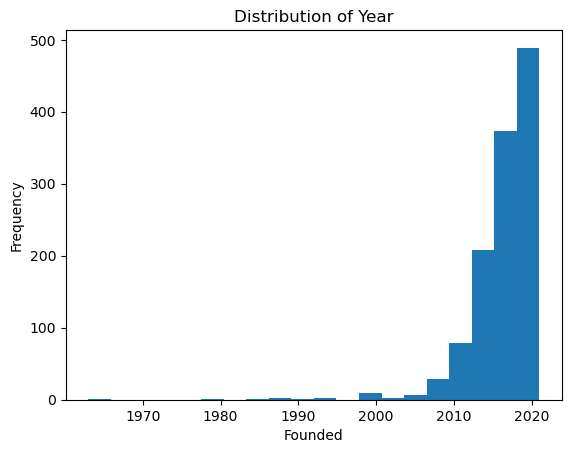

In [146]:
plt.hist(ind_2021['Founded'], bins=20)
plt.title('Distribution of Year')
plt.xlabel('Founded')
plt.ylabel('Frequency')
plt.show()

In [147]:
ind_2021['Founded'] = pd.to_numeric(ind_2021['Founded'], errors='coerce')

In [148]:
ind_2021['Founded'] = ind_2021['Founded'].fillna(ind_2021['Founded'].median())

In [149]:
ind_2021.head(50)

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year,Date
776,OYO,2012.0,Gurugram,Hospitality,Ritesh Agarwal,Hindustan Media Venture,"$200,000,000",Seed,2021,2021-01-01
306,Neobank Jupiter,2019.0,Mumbai,Banking,Jitendra Gupta,"Tiger Global, Sequoia Capital",$86000000,Series C,2021,2021-01-01
941,Loop Health,2018.0,Pune,Hospital & Health Care,"Amrit Singh, Mayank Kale","Elevation, General Catalyst",$12000000,Seed,2021,2021-01-02
756,Euler Motors,2018.0,Delhi,Automotive,Saurav Kumar,"ADB Ventures, Jetty Ventures","$2,600,000",Series A,2021,2021-01-02
688,LegalPay,2019.0,Delhi,FinTech,Kundan Shahi,Ashwini Kakkar. 9Unicorns,$Undisclosed,Seed,2021,2021-01-02
485,Learn4o Technology,2020.0,Jaipur,E-learning,Kamal Kant Gupta,IAN,$undisclosed,Seed,2021,2021-01-03
412,DeHaat,2012.0,Patna,AgriTech,"Shashank Kumar, Manish Kumar","Prosus Ventures, RTP Global","$30,000,000",Series C,2021,2021-01-03
1031,BharatPe,2018.0,Delhi,Financial Services,"Ashneer Grover, Shashvat Nakrani",MAS Financial Services,$10000000,Seed,2021,2021-01-03
803,ideaForge,2007.0,Mumbai,Drone,"Ankit Mehta, Ashish Bhat","Infosys, Qualcomm Ventures","$2,000,000",Seed,2021,2021-01-03
314,OneCard,2019.0,Pune,Financial Services,"Rupesh Kumar, Anurag Sinha, Vibhav Hathi","Ocean View Investment, QED Fund",$76000000,Seed,2021,2021-01-04


## Filtering & replacing missing values in the the amount col, containing the sector col into categories by putting them in substrings

In [150]:
ind_2021.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        1
Stage            0
Year             0
Date             0
dtype: int64

In [151]:
# replace empty values with NaN
ind_2021['Amount($)'].replace('', pd.np.nan, inplace=True)

In [152]:
ind_2021['Amount($)'] = ind_2021['Amount($)'].replace('undisclosed', np.nan)

In [153]:
# if it is not already a string, convert it to string
if ind_2021['Amount($)'].dtype != 'object':
    ind_2021['Amount($)'] = ind_2021['Amount($)'].astype(str)

# # remove non-numeric characters from the 'Amount' column
ind_2021['Amount($)'] = ind_2021['Amount($)'].str.replace('[^\d\.]', '')

ind_2021['Amount($)'] = pd.to_numeric(ind_2021['Amount($)'])

In [154]:
# Replace NaN values with 0
ind_2021['Amount($)'] = ind_2021['Amount($)'].fillna(0)

In [155]:
ind_2021.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
Date             0
dtype: int64

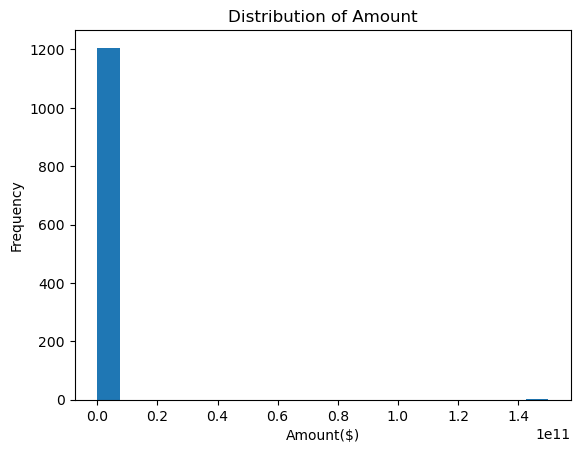

In [156]:
plt.hist(ind_2021['Amount($)'], bins=20)
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.ylabel('Frequency')
plt.show()

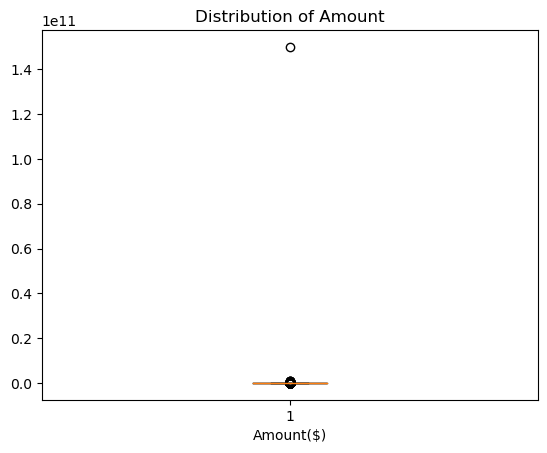

In [157]:
plt.boxplot(ind_2021['Amount($)'])
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.show()

In [158]:
ind_2021['Amount($)'].replace(0, np.nan, inplace=True)

In [159]:
# Fill missing values with median value
ind_2021['Amount($)'].fillna(ind_2021['Amount($)'].mean(), inplace=True)

ind_2021['Amount($)'] = ind_2021['Amount($)'].astype(int)

In [160]:
ind_2021.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
Date             0
dtype: int64

In [161]:
ind_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year,Date
776,OYO,2012.0,Gurugram,Hospitality,Ritesh Agarwal,Hindustan Media Venture,200000000,Seed,2021,2021-01-01
306,Neobank Jupiter,2019.0,Mumbai,Banking,Jitendra Gupta,"Tiger Global, Sequoia Capital",86000000,Series C,2021,2021-01-01
941,Loop Health,2018.0,Pune,Hospital & Health Care,"Amrit Singh, Mayank Kale","Elevation, General Catalyst",12000000,Seed,2021,2021-01-02
756,Euler Motors,2018.0,Delhi,Automotive,Saurav Kumar,"ADB Ventures, Jetty Ventures",2600000,Series A,2021,2021-01-02
688,LegalPay,2019.0,Delhi,FinTech,Kundan Shahi,Ashwini Kakkar. 9Unicorns,169032154,Seed,2021,2021-01-02


In [162]:
# # Create a list of substrings to search for in the Sector column
tech = ['Mobile','Technology', 'Internet', 'Software', 'Hardware','SaaS','Blockchain','Apps','Information Services','SEM',
        'Artificial Intelligence','CleanTech','Aerospace','Robotics','Ai','PaaS','Medtech','Agritech','HR tech',
       'Tech','FoodTech','Safety tech','IoT','Legal tech','Infratech','Netwokring platform','Telecommunication','Cloud','Aero',
       'Virtual','Content','Photonics','app','Proptech','Deeptech','AR','VR','Agri tech','-Tech','AgriTech','IT','Network',
        'Data','HrTech','Foodtech','Spacetech','E-mobility','Automation','Logitech','HRTech','Drone','MLOps','Innovation',
       'BioTechnology','TaaS','network','equipment','SpaceTech','CRM','MarTech','Nanotechnology','Femtech','startup','AI']
fin = ['Lending','Finance','Insurance', 'Payments','Financial Services','Credit','Credit Cards','Mutual Funds',
       'Banking','Escrow','Venture','financial','Taxation','Capital','firm','Equity']
fint = ['NFT','Virtual Banking','FinTech','Fintech','Cryptocurrency','Crypto','Insurtech','InsurTech']
health = ['Health', 'Medical','Pharmaceutical','Health Diagnotics','Health Care','Hospital','Biotechnology','Biopharma',
         'Hygiene management','HealthTech','Healthcare','HealthCare','laboratory','Biotech','Healthtech','HeathTech',
         'Helathcare','Veterinary']
mkt = ['Brand Marketing','Marketing','Event Promotion','Market']
agric = ['Farming','Agriculture','Nutrition','Hauz Khas','Fishery']
con = ['Food','Food and Beverages','Dairy','Beverages','Beer','FMCG']
econ = ['B2B','Shopping','E-Commerce','Trading Platform','E-commerce','E-marketplace','marketplace','e-commerce','Ecommerce',
        'E-market','Commerce','Trading platform']
cons = ['Wholesale','Consumer','Shoes','Packaging','Retail','Consulting','Food Delivery']
edu = ['E-Learning','EdTech','Education','Communities','Edtech','Preschool','School']
welln = ['Lifestyle','Beauty','Wellness','Cosmetics','Yoga','Skincare','D2C','Fitness','Lifestyle','Training']
real_est=['Real Estate','Home Decor','Accomodation','Interior design','Home Design','Home interior','Co-living',
          'Construction']
log = ['Logistics','Rental','Tourism','Travel','TravelTech','Transport','Transportation','Aviation','Mobility']

auto = ['Automotive','Electric vehicle','Industrial Automation','Vehicles','Automotive tech','Automobile','Tyre','car','Car',
       'Vehicle','Mechanical']
manu = ['Manufacturing']
ener = ['Renewable Energy','Solar','Energy','Energy Storage','Battery','Oil and Gas','Renewable','EV','Electricity',
       'purification','Renewables']
medi = ['Entertainment','Media','News','Video','Digital Media','FM','Publication','OTT','Social Network','Music',
        'Digital platform','Podcast','publishing','Blogging']
Game = ['Gaming','Games','Sports']

style = ['Fashion','Jewelry','Eyeglasses','Eye Wear','Apparel','Dating','Celebrity','Eyewear','D2C Fashion','Matrimony',
         'Textiles','D2C jewellery','Foootwear','Arts']
hos =['Hospitality','Hotel','Leisure']


ind_2021['Sector_clean'] = 'Other'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(tech)), 'Sector_clean'] = 'Technology'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(fin)), 'Sector_clean'] = 'Finance'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(health)), 'Sector_clean'] = 'Healthcare'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(mkt)), 'Sector_clean'] = 'Marketing'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(agric)), 'Sector_clean'] = 'Agriculture'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(econ)), 'Sector_clean'] = 'E-Commerce'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(edu)), 'Sector_clean'] = 'Education'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(welln)), 'Sector_clean'] = 'Wellness/Beauty'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(real_est)), 'Sector_clean'] = 'Real Estate'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(log)), 'Sector_clean'] = 'Logistics'

ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(auto)), 'Sector_clean'] = 'Automotive'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(manu)), 'Sector_clean'] = 'Manufacture'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(ener)), 'Sector_clean'] = 'Energy'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(medi)), 'Sector_clean'] = 'Media/Entertainment'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(hos)), 'Sector_clean'] = 'Hospitality'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(style)), 'Sector_clean'] = 'Lifestyle'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(cons)), 'Sector_clean'] = 'Consumer Services'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(game)), 'Sector_clean'] = 'Gaming'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(fint)), 'Sector_clean'] = 'FinTech'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(con)), 'Sector_clean'] = 'Consumables'

In [163]:
# replace the value in row  of Column1 with NaN & fill/replace with mode

ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Food & Beverages', np.nan)
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Pharmaceuticals\t#REF!', np.nan)
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Online Media#REF!', np.nan)
ind_2021.loc[98, 'HeadQuarter'] = np.nan
ind_2021.loc[1100, 'HeadQuarter'] = np.nan

ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Gurugram\t#REF!', 'Gurugram')
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Information Technology & Services', 'Manchester')
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Mountain View, CA', 'California')
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Faridabad, Haryana', 'Haryana')
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Small Towns, Andhra Pradesh', 'Andhra Pradesh')


ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].fillna(ind_2021['HeadQuarter'].mode()[0])


In [164]:
# filling the gaps with appropriate naming convention

ind_2021['Sector'] = ind_2021['Sector'].replace('Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.', 'Healthcare')
ind_2021['Sector'] = ind_2021['Sector'].replace('Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.', 'Healthcare')   
ind_2021['Sector'] = ind_2021['Sector'].replace('MoEVing is Indias only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.', 'Energy')


In [165]:
unique_values = ind_2021['HeadQuarter'].unique()
print(unique_values)

['Gurugram' 'Mumbai' 'Pune' 'Delhi' 'Jaipur' 'Patna' 'Chennai' 'Bangalore'
 'Noida' 'Mohali' 'Surat' 'The Nilgiris' 'Gandhinagar' 'Ahmedabad'
 'Gujarat' 'Ranchi' 'Beijing' 'Ambernath' 'Jodhpur' 'Silvassa'
 'Manchester' 'Cochin' 'Faridabad' 'Kolkata' 'Orissia' 'Lucknow' 'Powai'
 'Hyderabad' 'Kottayam' 'Haryana' 'Nagpur' 'Guwahati' 'Coimbatore'
 'Thiruvananthapuram' 'Kochi' 'Thane' 'Chandigarh' 'Telangana' 'Indore'
 'Ahmadabad' 'Mangalore' 'Rajsamand' 'Santra' 'Trivandrum' 'Goa'
 'Bhilwara' 'New York' 'Kanpur' 'Ghaziabad' 'Telugana' 'Samsitpur'
 'West Bengal' 'London' 'Andhra Pradesh' 'Panaji' 'Panchkula'
 'Bhubaneswar' 'Satara' 'Roorkee' 'Jharkhand' 'Andheri' 'Vadodara'
 'California']


In [166]:
ind_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year,Date,Sector_clean
776,OYO,2012.0,Gurugram,Hospitality,Ritesh Agarwal,Hindustan Media Venture,200000000,Seed,2021,2021-01-01,Hospitality
306,Neobank Jupiter,2019.0,Mumbai,Banking,Jitendra Gupta,"Tiger Global, Sequoia Capital",86000000,Series C,2021,2021-01-01,Finance
941,Loop Health,2018.0,Pune,Hospital & Health Care,"Amrit Singh, Mayank Kale","Elevation, General Catalyst",12000000,Seed,2021,2021-01-02,Automotive
756,Euler Motors,2018.0,Delhi,Automotive,Saurav Kumar,"ADB Ventures, Jetty Ventures",2600000,Series A,2021,2021-01-02,Automotive
688,LegalPay,2019.0,Delhi,FinTech,Kundan Shahi,Ashwini Kakkar. 9Unicorns,169032154,Seed,2021,2021-01-02,FinTech


In [167]:
ind_2021.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
Date             0
Sector_clean     0
dtype: int64

In [168]:
ind_2021.drop(ind_2021.columns[-8], axis=1,inplace=True)

In [169]:
ind_2021= ind_2021.rename(columns={'Sector_clean': 'Sector'})

In [170]:
ind_2021['Founded'] = ind_2021['Founded'].astype(int)

In [171]:
ind_2021.head()

,Company/Brand,Founded,HeadQuarter,Founders,Investor,Amount($),Stage,Year,Date,Sector
776,OYO,2012,Gurugram,Ritesh Agarwal,Hindustan Media Venture,200000000,Seed,2021,2021-01-01,Hospitality
306,Neobank Jupiter,2019,Mumbai,Jitendra Gupta,"Tiger Global, Sequoia Capital",86000000,Series C,2021,2021-01-01,Finance
941,Loop Health,2018,Pune,"Amrit Singh, Mayank Kale","Elevation, General Catalyst",12000000,Seed,2021,2021-01-02,Automotive
756,Euler Motors,2018,Delhi,Saurav Kumar,"ADB Ventures, Jetty Ventures",2600000,Series A,2021,2021-01-02,Automotive
688,LegalPay,2019,Delhi,Kundan Shahi,Ashwini Kakkar. 9Unicorns,169032154,Seed,2021,2021-01-02,FinTech


In [172]:
ind_2021.set_index('Date',inplace=True)

## Ploting visuals to check the shape of the dataframe

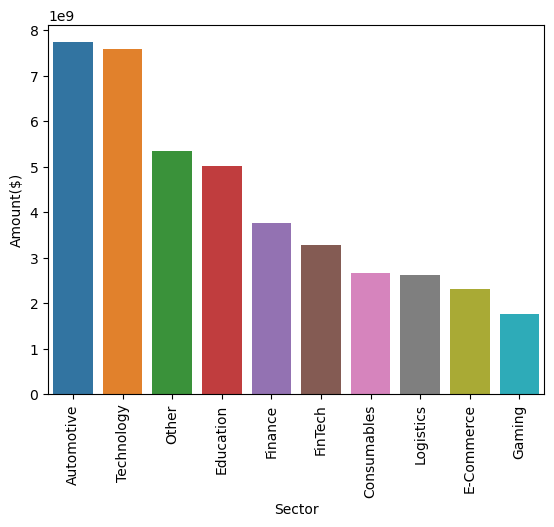

In [173]:
if ind_2021.empty:
    print("No data found for the year 2021")
else:
    # Calculate the total funding by sector
    total_funding_by_sector = ind_2021.groupby('Sector')['Amount($)'].sum().reset_index()

    top_10_sectors = total_funding_by_sector.sort_values(by='Amount($)', ascending=False).head(10)

    ax = sns.barplot(data=top_10_sectors, x='Sector', y='Amount($)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()


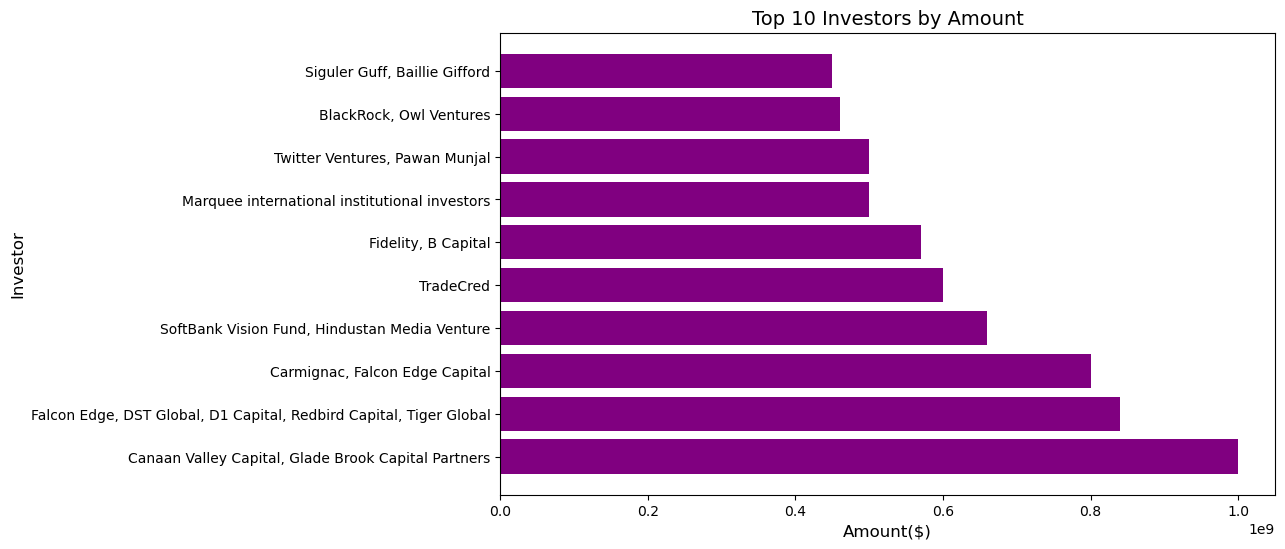

In [174]:
# sort the dataframe by amount in descending order and select the top 10 investors
top_investors = ind_2021.sort_values(by='Amount($)', ascending=False).head(10)

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_investors['Investor'], top_investors['Amount($)'], color='purple')

ax.set_xlabel('Amount($)', fontsize=12)

ax.set_ylabel('Investor', fontsize=12)

ax.set_title('Top 10 Investors by Amount', fontsize=14)

plt.show()

## filling missing values in 2018 with merged data, checking the correlation,converting amount col to float

In [175]:
# Compute the correlation matrix
combined_ind = pd.concat([ind_2019, ind_2020, ind_2021], axis=0)

correlation_matrix = combined_ind.corr()

print(correlation_matrix)

            Founded  Amount($)      Year
Founded    1.000000   0.038671  0.151788
Amount($)  0.038671   1.000000  0.110487
Year       0.151788   0.110487  1.000000


In [176]:
ind_2018.isna().sum()

Company/Brand      0
Stage              0
Amount($)          0
Year               0
Founded          526
HeadQuarter        0
Sector             0
dtype: int64

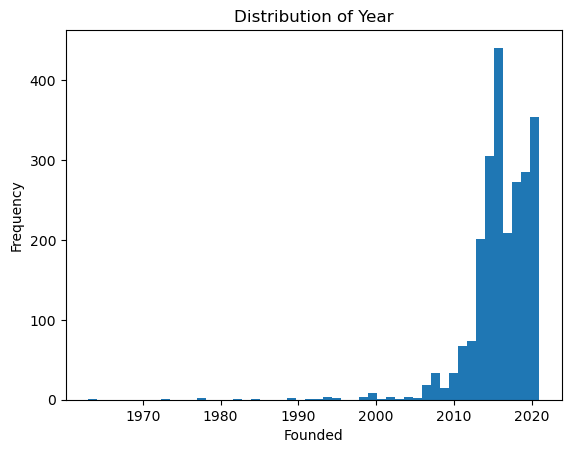

In [177]:
plt.hist(combined_ind['Founded'], bins=50)
plt.title('Distribution of Year')
plt.xlabel('Founded')
plt.ylabel('Frequency')
plt.show()

In [178]:
# Calculate the median of the column
median_value = combined_ind['Founded'].median()

In [179]:
ind_2018['Founded'].fillna(median_value, inplace=True)

In [180]:
ind_2018.isna().sum()

Company/Brand    0
Stage            0
Amount($)        0
Year             0
Founded          0
HeadQuarter      0
Sector           0
dtype: int64

In [181]:
ind_2018['Founded'] = ind_2018['Founded'].astype(int)

In [182]:
ind_2018.head()

,Company/Brand,Stage,Amount($),Year,Founded,HeadQuarter,Sector
Date,,,,,,,
2018-01-01,Jetbrain Robotics,Seed,70000,2018,2016,Gurugram,Automotive
2018-01-01,Mombay,Seed,7500,2018,2016,Mumbai,Consumables
2018-01-01,Ambee,Angel,5800000,2018,2016,Bangalore,Automotive
2018-01-02,Roposo,Series C,10000000,2018,2016,Gurugram,Media/Entertainment
2018-01-02,LetsMD,Seed,1000000,2018,2016,Delhi,Automotive


In [183]:
ind_2018["Amount($)"] = ind_2018["Amount($)"].astype(float)

ind_2019["Amount($)"] = ind_2019["Amount($)"].astype(float)

ind_2020["Amount($)"] = ind_2020["Amount($)"].astype(float)

ind_2021["Amount($)"] = ind_2021["Amount($)"].astype(float)

## Some more data cleaning in the HeadQuarter column

In [184]:
# concatenate all the dataframes into one
ind_st2 = pd.concat([ind_2018, ind_2019, ind_2020, ind_2021], ignore_index=True)

In [185]:
# replace "Bengaluru" with "Bangalore" in the "headquarter" column
ind_st2['HeadQuarter'] = ind_st2['HeadQuarter'].str.replace('Bombay', 'Mumbai')

In [186]:
ind_st2['Stage'] = ind_st2['Stage'].fillna(ind_st2['Stage'].mode()[0])

In [187]:
# Drop rows with the value "Sochcast" in the "Company/Brand" column in-place
ind_2021.drop(ind_2021[ind_2021['Company/Brand'] == 'Sochcast'].index, inplace=True)

In [188]:
unique_values = ind_2021['HeadQuarter'].unique()
print(unique_values)

['Gurugram' 'Mumbai' 'Pune' 'Delhi' 'Jaipur' 'Patna' 'Chennai' 'Bangalore'
 'Noida' 'Mohali' 'Surat' 'The Nilgiris' 'Gandhinagar' 'Ahmedabad'
 'Gujarat' 'Ranchi' 'Beijing' 'Ambernath' 'Jodhpur' 'Silvassa'
 'Manchester' 'Cochin' 'Faridabad' 'Kolkata' 'Orissia' 'Lucknow' 'Powai'
 'Hyderabad' 'Kottayam' 'Haryana' 'Nagpur' 'Guwahati' 'Coimbatore'
 'Thiruvananthapuram' 'Kochi' 'Thane' 'Chandigarh' 'Telangana' 'Indore'
 'Ahmadabad' 'Mangalore' 'Rajsamand' 'Santra' 'Trivandrum' 'Goa'
 'Bhilwara' 'New York' 'Kanpur' 'Ghaziabad' 'Telugana' 'Samsitpur'
 'West Bengal' 'London' 'Andhra Pradesh' 'Panaji' 'Panchkula'
 'Bhubaneswar' 'Satara' 'Roorkee' 'Jharkhand' 'Andheri' 'Vadodara'
 'California']


In [189]:
ind_st2['HeadQuarter'] = ind_st2['HeadQuarter'].str.replace('Bengaluru', 'Bangalore')

In [190]:
unique_values = ind_st2['HeadQuarter'].unique()
print(unique_values)

['Gurugram' 'Mumbai' 'Bangalore' 'Delhi' 'Pune' 'Bhopal' 'Noida' 'Haryana'
 'Indore' 'Chennai' 'Kormangala' 'India' 'Ahmedabad' 'Kolkata' 'Anand'
 'Alleppey' 'Hyderabad' 'Ernakulam' 'Worli' 'Guntur' 'Cochin' 'Chandigarh'
 'Uttar Pradesh' 'Jaipur' 'Azadpur' 'Kalpakkam' 'Andheri' 'Jodhpur'
 'Guindy' 'Kannur' 'Mylapore' 'Trivandrum' 'Lucknow' 'Coimbatore' 'Kochi'
 'Belgaum' 'Thane' 'Ghaziabad' 'Kalkaji' 'Kanpur' 'Kota' 'Mohali' 'Margão'
 'Faridabad' 'Hubli' 'Powai' 'Alwar' 'Rajasthan' 'Telangana'
 'Uttar pradesh' 'Surat' 'Milano' 'Odisha' 'Sydney' 'New York'
 'San Francisco' 'Gujarat' 'Kerala' 'Goa' 'Queensland' 'California'
 'Patna' 'San Ramon' 'Rajastan' 'Seattle' 'Singapore' 'Newcastle'
 'Dehradun' 'Shanghai' 'Bihar' 'London' 'Biphar' 'Texas' 'Tamil Nadu'
 'Paris' 'Warangal' 'Jiaxing' 'Hyderebad' 'San Franciscao' 'Riyadh'
 'Bangaldesh' 'France' 'Berlin' 'Karnataka' 'Jawa Barat' 'Seoul'
 'Ludhiana' 'Bangkok' 'Tamilnadu' 'The Nilgiris' 'Gandhinagar' 'Ranchi'
 'Beijing' 'Ambernath' 'Silva

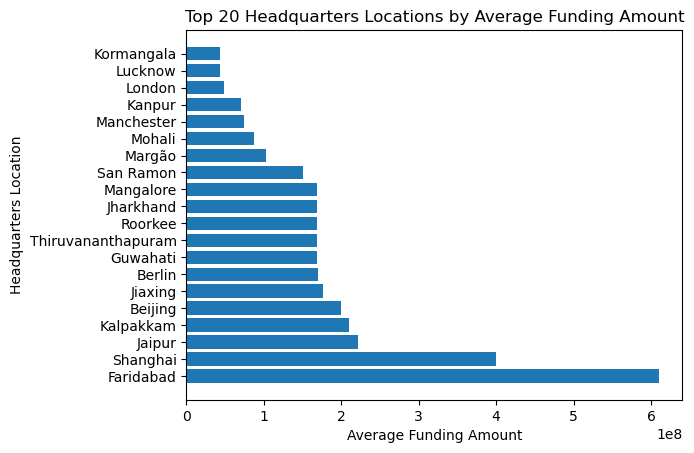

In [191]:
# Group the data by headquarters location and calculate the average funding amount
grouped = ind_st2.groupby('HeadQuarter')['Amount($)'].mean()

# Sort the data by average funding amount in descending order
grouped = grouped.sort_values(ascending=False)

# Select the top 20 headquarters locations
top_20 = grouped[:20]

# Create a horizontal bar chart to visualize the relationship between headquarters location and funding amounts
plt.barh(top_20.index, top_20.values)
plt.xlabel('Average Funding Amount')
plt.ylabel('Headquarters Location')
plt.title('Top 20 Headquarters Locations by Average Funding Amount')

# Display the plot
plt.show()


In [ ]:
# save dataframe to a CSV file
# ind_2018.to_csv('clean-startup-2018.csv',index_label='Date')
# ind_2019.to_csv('clean-startup-2019.csv',index_label='Date')
# ind_2020.to_csv('clean-startup-2020.csv',index_label='Date')
# ind_2021.to_csv('clean-startup-2021.csv',index_label='Date')

## EDA VISUALS

In [193]:
# Load the data for each year
df_2018 = pd.read_csv('C:Clean_Data\clean-startup-2018.csv')
df_2019 = pd.read_csv('C:Clean_Data\clean-startup-2019.csv')
df_2020 = pd.read_csv('C:Clean_Data\clean-startup-2020.csv')
df_2021 = pd.read_csv('C:Clean_Data\clean-startup-2021.csv')

In [194]:
# Concatenate all years into a single dataframe
df = pd.concat([df_2018, df_2019, df_2020, df_2021])

In [195]:
df.head()

,Date,Company/Brand,Stage,Amount($),Year,Founded,HeadQuarter,Sector,Founders,Investor
0,2018-01-01,Vebbler,Seed,5800000.0,2018,2016,Bangalore,Media/Entertainment,NaN,NaN
1,2018-01-01,StockEdge,Seed,1100000.0,2018,2016,Kolkata,Marketing,NaN,NaN
2,2018-01-02,Max Healthcare,Corporate Round,5800000.0,2018,2016,Delhi,Automotive,NaN,NaN
3,2018-01-03,Creator’s Gurukul,Angel,5800000.0,2018,2016,Gurugram,Other,NaN,NaN
4,2018-01-03,Innov8 Coworking,Seed,4000000.0,2018,2016,Delhi,Real Estate,NaN,NaN


In [196]:
df_2021.isna().sum()

Date             0
Company/Brand    0
Founded          0
HeadQuarter      0
Founders         0
Investor         3
Amount($)        0
Stage            5
Year             0
Sector           0
dtype: int64

In [197]:
df['Amount($)'].dtype

dtype('float64')

In [198]:
df.describe()

,Amount($),Year,Founded
count,2.872000e+03,2872.000000,2872.000000
mean,2.933356e+07,2020.022284,2016.051184
std,1.961513e+08,1.087687,3.739398
min,-2.147484e+09,2018.000000,1963.000000
25%,1.200000e+06,2020.000000,2015.000000
50%,4.000000e+06,2020.000000,2016.000000
75%,1.762500e+07,2021.000000,2018.000000
max,2.029600e+09,2021.000000,2021.000000


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2872 entries, 0 to 1204
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2872 non-null   object 
 1   Company/Brand  2872 non-null   object 
 2   Stage          2867 non-null   object 
 3   Amount($)      2872 non-null   float64
 4   Year           2872 non-null   int64  
 5   Founded        2872 non-null   int64  
 6   HeadQuarter    2872 non-null   object 
 7   Sector         2872 non-null   object 
 8   Founders       2346 non-null   object 
 9   Investor       2343 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 246.8+ KB


In [200]:
# Check for missing values
print(df.isnull().sum())

Date               0
Company/Brand      0
Stage              5
Amount($)          0
Year               0
Founded            0
HeadQuarter        0
Sector             0
Founders         526
Investor         529
dtype: int64


In [201]:
#filling missing categorical data on founders using imputer methord

# Create an instance of SimpleImputer with the 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on founders column
imputer.fit(df_2021[['Stage']])

# Transform the data 
df_2021['Stage'] = imputer.transform(df_2021[['Stage']])

In [202]:
#filling missing categorical data on Investor using imputer methord

# Create an instance of SimpleImputer with the 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on Investor column
imputer.fit(df_2021[['Investor']])

# Transform the data 
df_2021['Investor'] = imputer.transform(df_2021[['Investor']])

In [203]:
print(df_2021.isnull().sum())

Date             0
Company/Brand    0
Founded          0
HeadQuarter      0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
Sector           0
dtype: int64


### Univariate analysis :
focuses on examining a single variable at a time. It involves analyzing and summarizing the data using descriptive statistics and visualization techniques.

### Bivariate analysis:
involves the analysis of the relationship between two variables.

### Multivariate analysis :
deals with the analysis of multiple variables simultaneously.

### Univariate analysis

#### It only analyzes one variable, which is the 'Amount($)' column¶

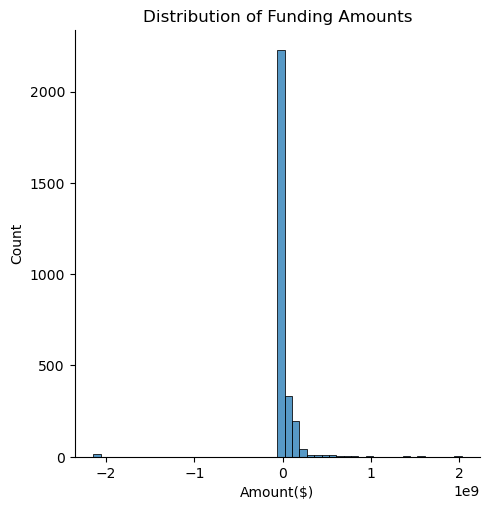

In [204]:
# Plot the distribution of funding amounts
df = df.reset_index(drop=True)
sns.displot(data=df, x='Amount($)', bins=50)
plt.title('Distribution of Funding Amounts')
plt.show()


#### Remarks: The histogram is divided into 50 bins, which gives an idea of how the funding amounts are distributed across different ranges

### Univariate analysis
#### As it only analyzes the distribution of startups across different sectors.¶

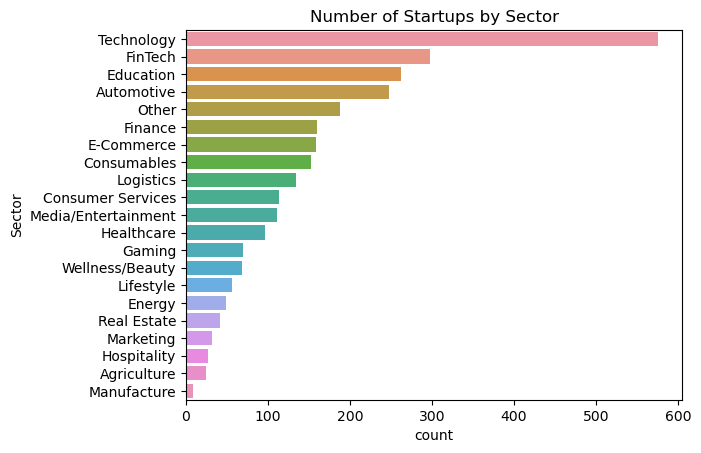

In [205]:
# Get the value counts for each sector and sort them in descending order
sector_counts = df['Sector'].value_counts().sort_values(ascending=False)

# Plot the countplot with sorted bars
sns.countplot(data=df, y='Sector', order=sector_counts.index)
plt.title('Number of Startups by Sector')
plt.show()

#### This visualization helps to identify which sectors have the highest number of startups and compare their relative popularity.

### Univariate analysis of
##### Funding amount by sector¶

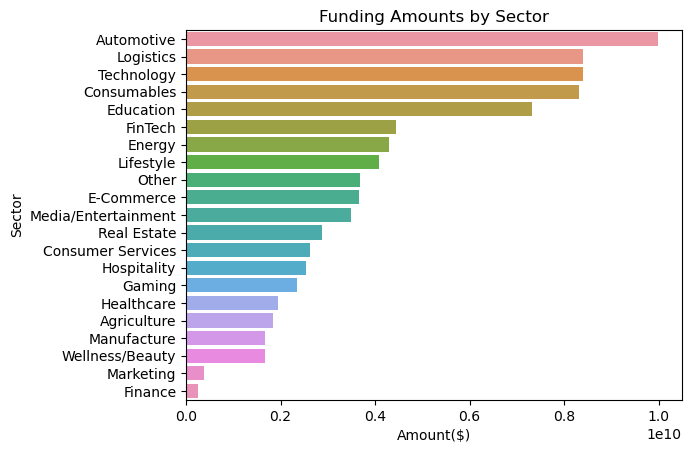

In [206]:
# Sort the sectors by funding amount in descending order
sector_order = df.groupby('Sector')['Amount($)'].sum().sort_values(ascending=False).index

# Plot the funding amounts by sector in descending order
sns.barplot(data=df, y='Sector', x='Amount($)', estimator=np.sum, ci=None, order=sector_order)
plt.title('Funding Amounts by Sector')
plt.show()

#### The above chart shows the sector with the highest total funding amount is Automotive(which includes widespread of related fields), followed by Technology and Logistics(Which includes travel,tourism and other related fields). Consumables and Education sectors also received significant funding amounts, while other sectors received comparatively lower funding amounts.

### Univariate analysis.
#### It is analyzing the frequency distribution of startups by funding stage.¶

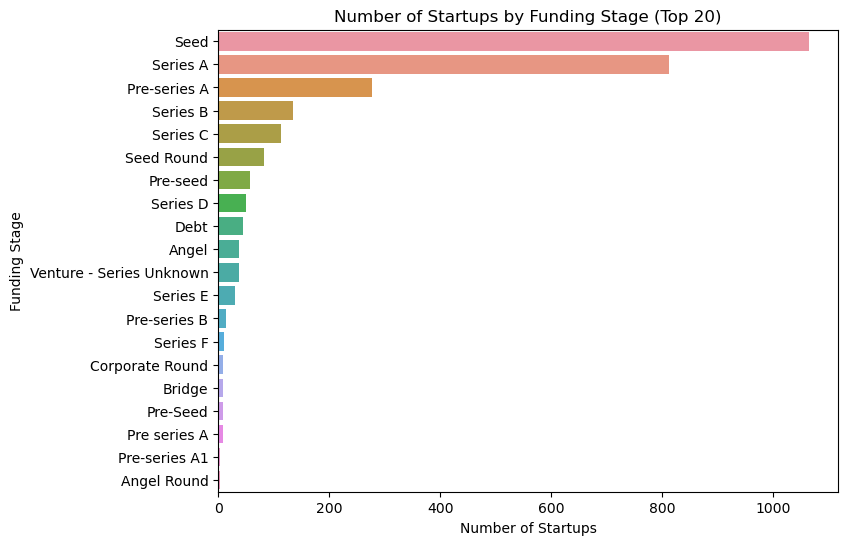

In [207]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='Stage', order=df['Stage'].value_counts().index[:20])
plt.title('Number of Startups by Funding Stage (Top 20)')
plt.xlabel('Number of Startups')
plt.ylabel('Funding Stage')
plt.show()

#### In the above chart The finding is that the majority of startups in the dataset are in the Seed and Series A funding stages, with a sharp decline in the number of startups in later funding stages such as Series E and beyond.

### Univariate analysis.
### showing the total funding amount for each funding stage. The y-axis represents the funding stage and the x-axis represents the total funding amount.¶

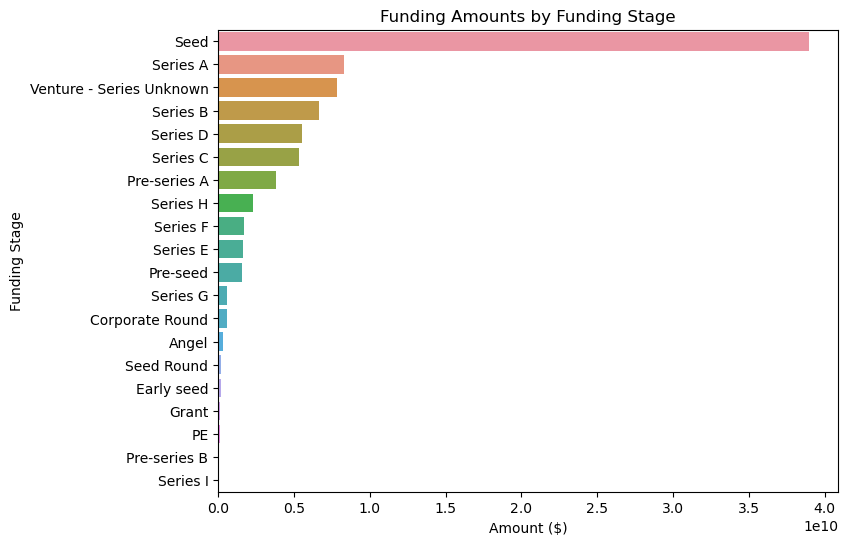

In [208]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, y='Stage', x='Amount($)', estimator=np.sum, ci=None, order=df.groupby('Stage')['Amount($)'].sum().sort_values(ascending=False).index[:20])
plt.title('Funding Amounts by Funding Stage')
plt.xlabel('Amount ($)')
plt.ylabel('Funding Stage')
plt.show()

#### The findings from the above chart suggest that Seed Funding is the most common funding stage for Indian startups, followed by Series A and Series B. The total funding amount gradually increases as the funding stage advances from Seed to Series F

### Univariate analysis
#### Analyzing the number of startups in each location without considering any other variable.

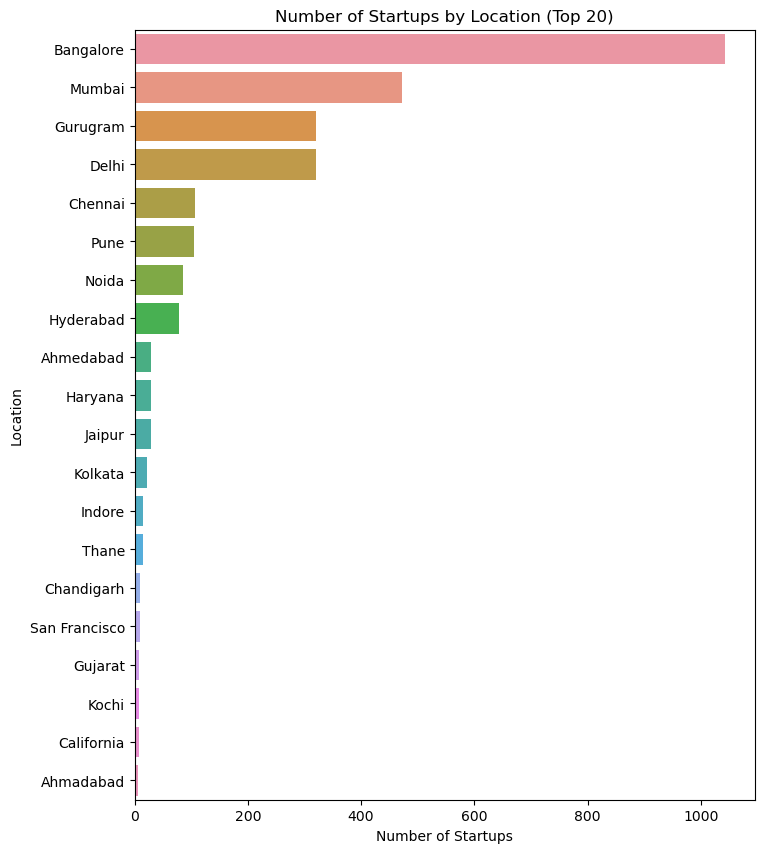

In [209]:
plt.figure(figsize=(8, 10))
sns.countplot(data=df, y='HeadQuarter', order=df['HeadQuarter'].value_counts().iloc[:20].index)
plt.title('Number of Startups by Location (Top 20)')
plt.xlabel('Number of Startups')
plt.ylabel('Location')
plt.show()

#### Bangalore is the top location for startups with more than 3000 startups in the dataset. Mumbai and Delhi are the next two most popular locations with more than 1500 startups each. Other popular locations for startups include Hyderabad, Chennai, Pune, and Gurgaon.

### Univariate analysis 
#### funding by top 20 headquarter locations¶

In [210]:
funding_amount = df['HeadQuarter']
print(funding_amount)

0       Bangalore
1         Kolkata
2           Delhi
3        Gurugram
4           Delhi
          ...    
2867     Gurugram
2868    Bangalore
2869    Bangalore
2870    Rajsamand
2871    Bangalore
Name: HeadQuarter, Length: 2872, dtype: object


In [211]:
distinct_stages = df['HeadQuarter'].unique()
print(distinct_stages)

['Bangalore' 'Kolkata' 'Delhi' 'Gurugram' 'Ahmedabad' 'Mumbai' 'Hyderabad'
 'Noida' 'Jaipur' 'Kochi' 'Pune' 'Haryana' 'Chennai' 'Anand' 'India'
 'Bhopal' 'Ghaziabad' 'Indore' 'Thane' 'Lucknow' 'Ernakulam' 'Chandigarh'
 'Azadpur' 'Andheri' 'Mohali' 'Worli' 'Guindy' 'Uttar Pradesh' 'Alwar'
 'Jodhpur' 'Belgaum' 'Kalpakkam' 'Coimbatore' 'Trivandrum' 'Kormangala'
 'Powai' 'Hubli' 'Alleppey' 'Faridabad' 'Kanpur' 'Kannur' 'Margão'
 'Cochin' 'Guntur' 'Mylapore' 'Kalkaji' 'Kota' 'Telangana' 'Rajasthan'
 'Uttar pradesh' 'Surat' 'Seoul' 'Bengaluru' 'Kerala' 'Singapore' 'London'
 'Bangaldesh' 'California' 'Gujarat' 'Queensland' 'San Ramon'
 'San Francisco' 'Tamil Nadu' 'Bihar' 'Texas' 'France' 'Hyderebad'
 'New York' 'Sydney' 'Goa' 'San Franciscao' 'Dehradun' 'Rajastan'
 'Karnataka' 'Tamilnadu' 'Shanghai' 'Riyadh' 'Milano' 'Berlin' 'Paris'
 'Jawa Barat' 'Warangal' 'Newcastle' 'Patna' 'Ludhiana' 'Bangkok' 'Odisha'
 'Biphar' 'Seattle' 'Jiaxing' 'Roorkee' 'Ahmadabad' 'Gandhinagar'
 'Andhra Pradesh' '

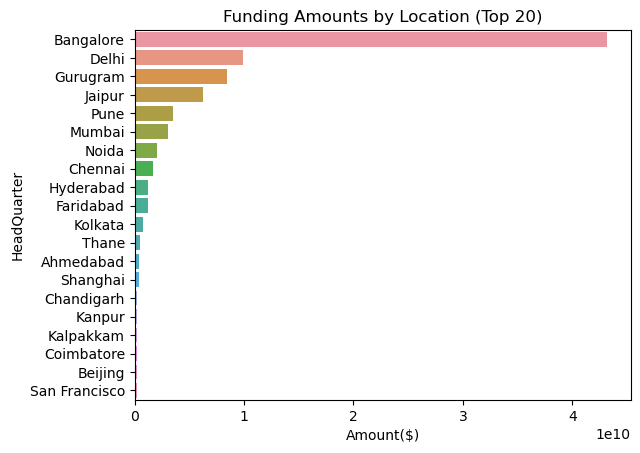

In [212]:
top20_locations = df.groupby('HeadQuarter')['Amount($)'].sum().sort_values(ascending=False).head(20).index.tolist()

sns.barplot(data=df, y='HeadQuarter', x='Amount($)', estimator=np.sum, ci=None, order=top20_locations)
plt.title('Funding Amounts by Location (Top 20)')
plt.show()

#### There is a significant difference between the total funding received by the top location and the other locations on the above chart indicating that certain locations may receive more funding than others. The bar chart provides a quick and easy way to visually compare the total funding received by the top 20 headquarter locations.

In [213]:
distinct_stages = df['Stage'].unique()
print(distinct_stages)

['Seed' 'Corporate Round' 'Angel' 'Series A' 'Venture - Series Unknown'
 'Series B' 'Series C' 'Series D' 'Pre-Seed' 'Series E' 'Grant'
 'Post-IPO Equity' 'Series H' 'Series F' 'Seed funding' 'Pre series A'
 'Series B+' 'Seed round' 'Series G' 'Post series A' 'Seed fund'
 'Pre-series A' 'Fresh funding' 'Series D1' 'Seed Round' 'Pre series B'
 'Seed Investment' 'Debt' 'Pre-seed' 'Bridge' 'Edge' 'Pre-series C'
 'Pre-series B' 'Series A-1' 'Seed Funding' 'Series E2' 'Seed A'
 'Mid series' 'Series B2' 'Angel Round' 'Pre seed Round' 'Pre- series A'
 'Pre series C' 'Pre-seed Round' 'Pre-series' 'Series C, D' 'Pre-Series B'
 'Bridge Round' 'Series A2' nan 'Seies A' 'Pre-series A1' 'Series F1'
 'Seed+' 'PE' 'Series A+' 'Series I' 'Series F2' 'Early seed' 'Series B3']


### Univariate analysis of
#### Funding amount by funding stage

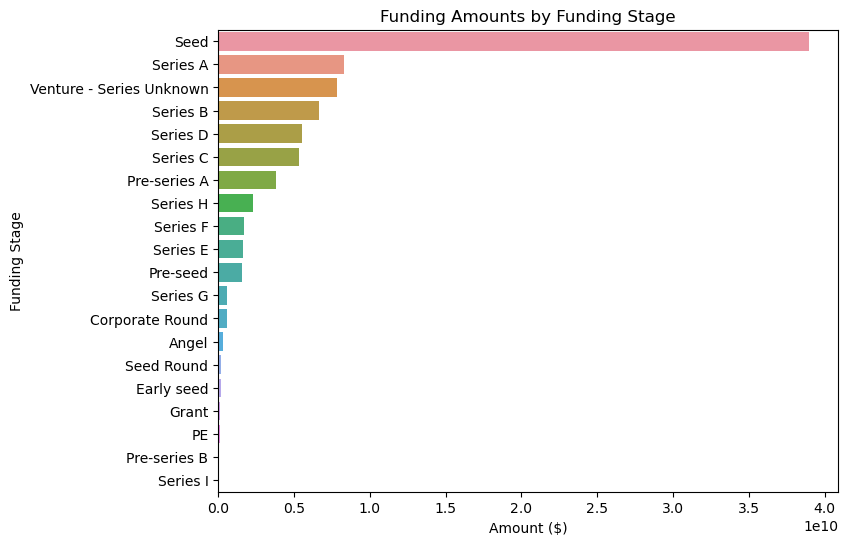

In [214]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, y='Stage', x='Amount($)', estimator=np.sum, ci=None, order=df.groupby('Stage')['Amount($)'].sum().sort_values(ascending=False).index[:20])
plt.title('Funding Amounts by Funding Stage')
plt.xlabel('Amount ($)')
plt.ylabel('Funding Stage')
plt.show()

#### In the above chart the funding stage that received the most funding is "Seed". The funding amounts decrease as the stage of development advances, with "Series A" receiving the second highest amount of funding, followed by "Series B". The funding amounts for each stage after "Series B" continue to decrease

### Univariate Analysis of
#### Total funding by sector

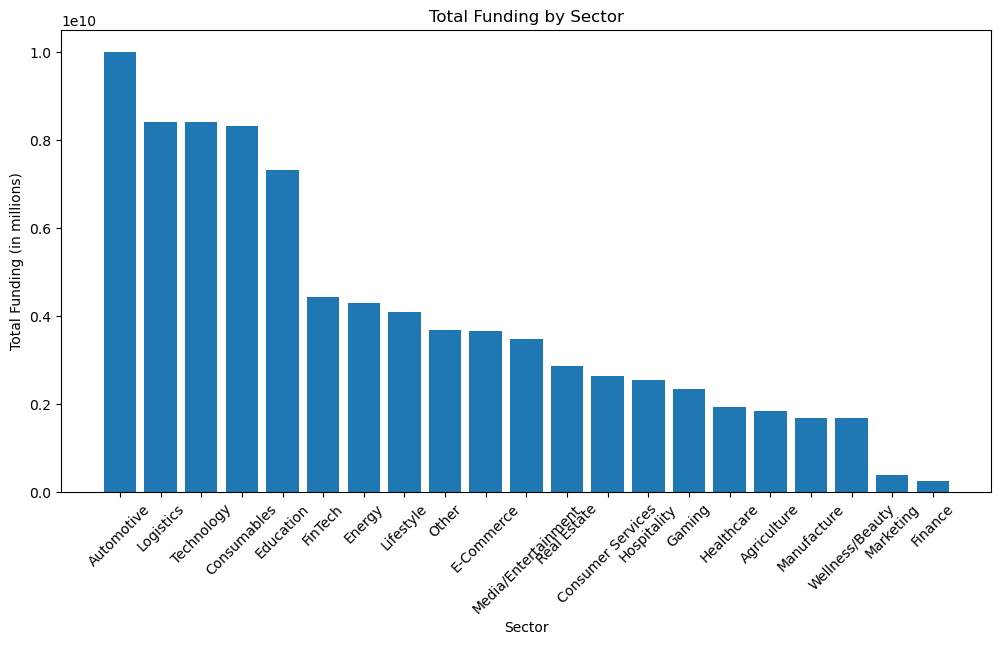

In [217]:
# group the data by sector and calculate the sum of funding
funding_by_sector = df.groupby('Sector')['Amount($)'].sum().reset_index()

# sort the data by total funding in descending order
funding_by_sector = funding_by_sector.sort_values(by='Amount($)', ascending=False)

# plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(funding_by_sector['Sector'], funding_by_sector['Amount($)'])
plt.xticks(rotation=45)
plt.xlabel('Sector')
plt.ylabel('Total Funding (in millions)')
plt.title('Total Funding by Sector')
plt.show()

#### On the above plot we can see that Automotive sector receives the highest funding whereas Marketing sector receives the least funding

### Univariate analysis of
#### Pattern in location of top 10 companys headquarters and the amount of funding they receive¶

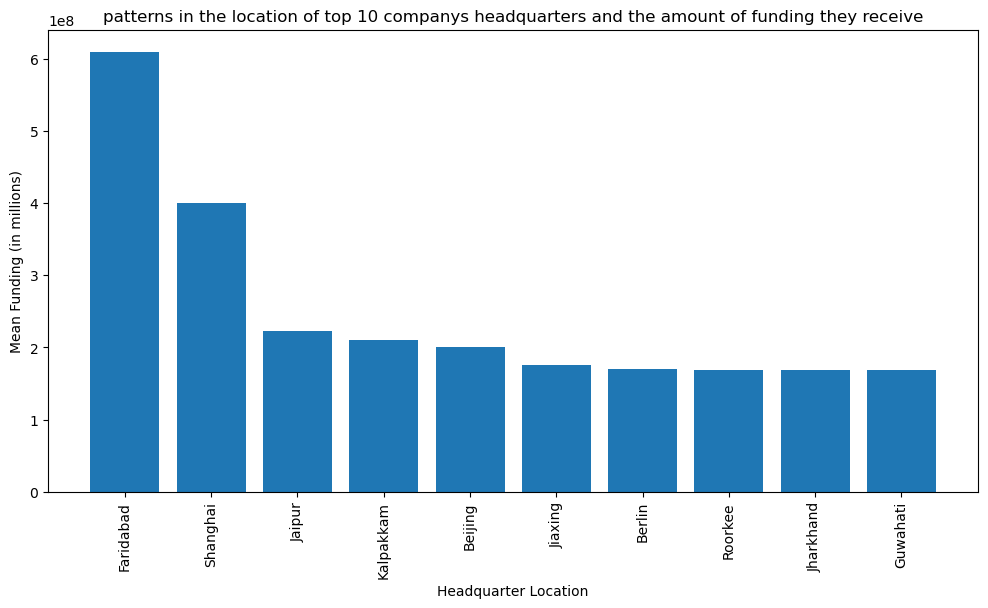

In [218]:
# group the data by headquarter location and calculate the mean funding
funding_by_location = df.groupby('HeadQuarter')['Amount($)'].mean().reset_index()

# sort the data by mean funding in descending order
funding_by_location = funding_by_location.sort_values(by='Amount($)', ascending=False)
# select the top 10 locations
top_10_locations = funding_by_location[:10]
# plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_locations['HeadQuarter'], top_10_locations['Amount($)'])
plt.xticks(rotation=90)
plt.xlabel('Headquarter Location')
plt.ylabel('Mean Funding (in millions)')
plt.title('patterns in the location of top 10 companys headquarters and the amount of funding they receive')
plt.show()

#### From the above chart, the analysis of funding by headquarter location, we can see that some locations such as Faridabad, Shangai,China, Kalpakkam, and Beijing have received significantly higher amounts of funding compared to other locations. This could indicate a pattern where companies based in major business centers or startup hubs tend to receive more funding compared to those based in other locations

### Bivariate Analysis
#### It plots the correlation between two variables - Stage of Development and Funding Amount.

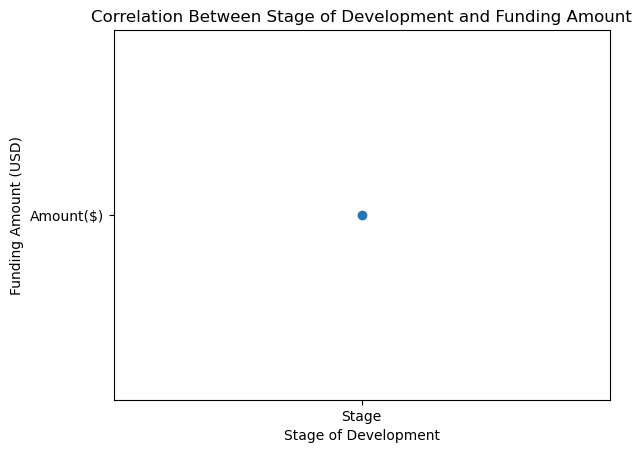

In [215]:
# Create scatter plot
plt.scatter('Stage', 'Amount($)')

# Set axis labels and title
plt.xlabel('Stage of Development')
plt.ylabel('Funding Amount (USD)')
plt.title('Correlation Between Stage of Development and Funding Amount')

# Show the plot
plt.show()

### Bivariate Analysis
#### it is exploring the relationship between two variables: Stage of Development and Funding Amount, while also considering the third variable of Year through color-coding.¶

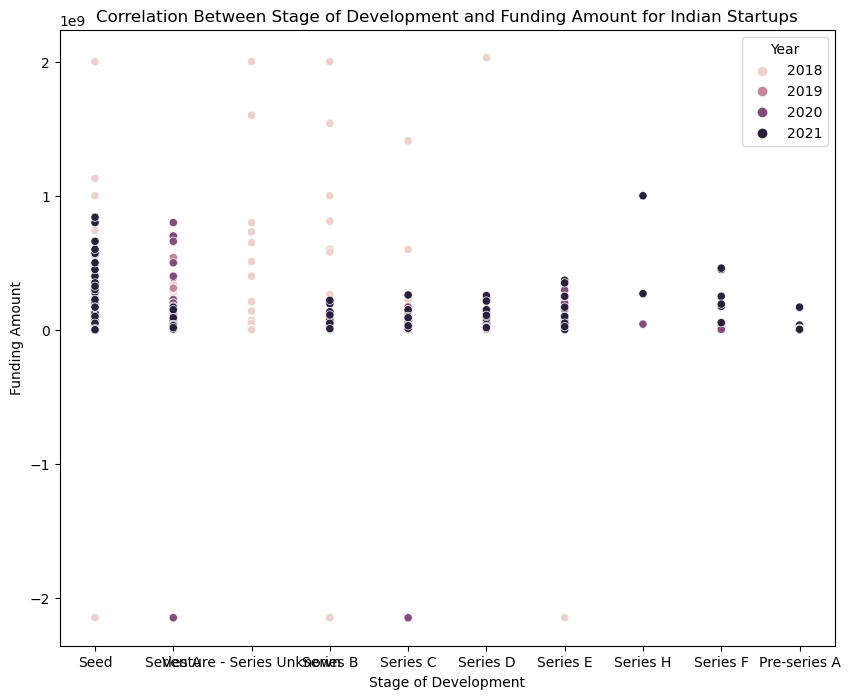

In [216]:
# Filter top 10 stages by funding amount
top10_stages = df.groupby('Stage')['Amount($)'].sum().sort_values(ascending=False).head(10).index.tolist()
df_filtered = df[df['Stage'].isin(top10_stages)]

# Create scatter plot
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_filtered, x='Stage', y='Amount($)', hue='Year')
plt.title('Correlation Between Stage of Development and Funding Amount for Indian Startups')
plt.xlabel('Stage of Development')
plt.ylabel('Funding Amount')
plt.show()

#### The scatter plot above shows that the funding amount generally increases as the stage of development progresses, with later stages such as Growth and Expansion receiving the highest amount of funding. Additionally, there appears to be an increasing trend in funding amount over the years, with higher amounts being received in more recent years.

### Multivariate analysis
#### To visualize the relationship between founding year, location (headquarter), and sector¶

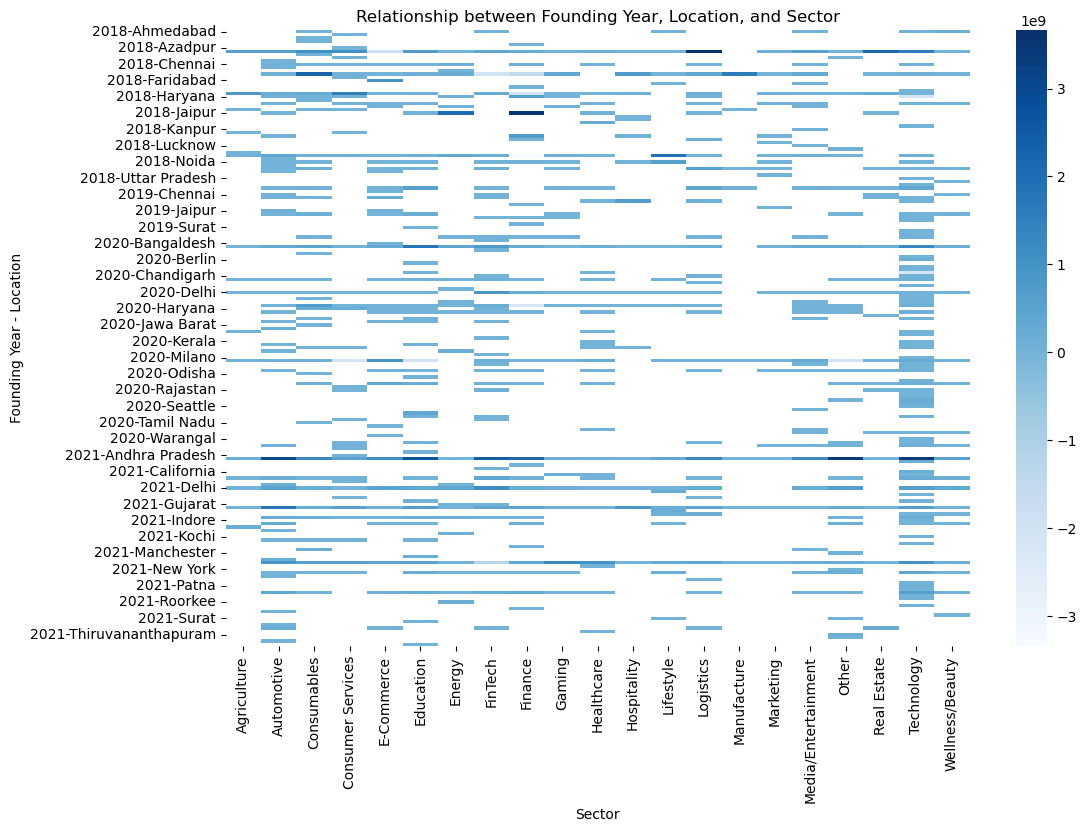

In [219]:
# Create a pivot table with founding year, location, and sector as indices
pivot = df.pivot_table(values='Amount($)', index=['Year', 'HeadQuarter'], columns='Sector', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap='Blues')
plt.title('Relationship between Founding Year, Location, and Sector')
plt.xlabel('Sector')
plt.ylabel('Founding Year - Location')
plt.show()

#### On the above heatmap the color scale indicates the magnitude of the funding amount, with darker shades representing higher values.

#### Some possible findings from this heatmap are:

#### The highest funding amounts are concentrated in a few sectors, such as Technology, Healthcare, and E-commerce, and are mainly located in a few cities like Bangalore, Mumbai, and Delhi.
#### Funding amounts are generally increasing over time, with the most recent years (2020-2022) showing the highest levels of funding across most sectors and locations.
#### There are some notable regional variations in funding amounts, with certain cities or regions showing higher levels of funding in specific sectors. For example, Delhi and Gurgaon have higher funding amounts in the Real Estate sector, while Bangalore and Mumbai have higher funding amounts in the Technology sector.

### Multivariate analysis
#### To visualize the correlation between funding stage, funding amount, and sector using a scatter plot:¶

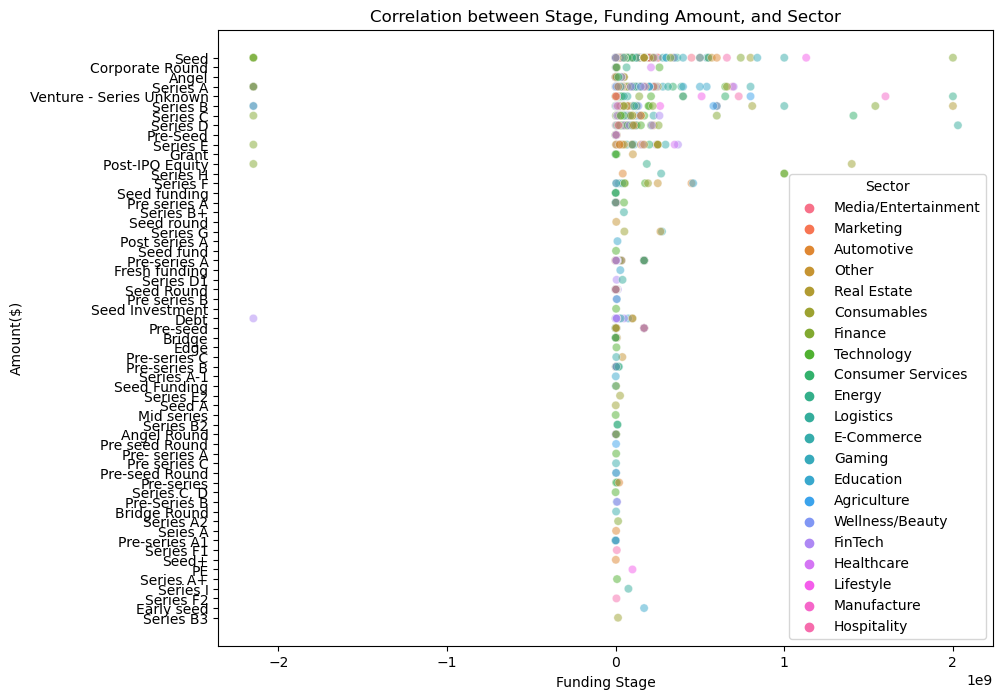

In [220]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Amount($)', y='Stage', hue='Sector', alpha=0.5)
plt.title('Correlation between Stage, Funding Amount, and Sector')
plt.xlabel('Funding Stage')
plt.ylabel('Amount($)')
plt.show()

#### The scatter plot with funding stage on the x-axis, funding amount on the y-axis, and different sectors represented by different colors. The alpha parameter is set to 0.5 to make the plot points partially transparent.

## HYPOTHESIS TESTING

### Statistical Testing on Hypothesis
* A Ttest Statiscal method was employed to test if startups in the E-Commerce & Fintech sector received more funding than those in Technology.

* A Pearsonr test was run to access if there is a positive correlation between the stage of development and funding the company receives.

* Another Pearsonr Test was used to check if the number of founders had an influence in the funding received.

* Ttest was employed to test the significant difference between the hypothesis that Startups based in certain areas had a upper hand to the rest.

* A pearsonr test was used as a bases to check the linear relationship of the hypothesis that number of investors in a company is positively related to the funding amount.

### Null Hypothesis (H0) : Default understanding and presentation of the data is True.
### Alternate Hypothesis (H1) : The alternate speculative presentation of the data is True
### Hypothesis 1.
* (H0)
* startups in the E-Commerce and Fintech Sector do not receive more funding than Technology

* (H1)
* Do startup in the E-Commerce and Fintech Sector receive more funding than Technology

* We will access the distribution of the funding across this sectors with visualizations

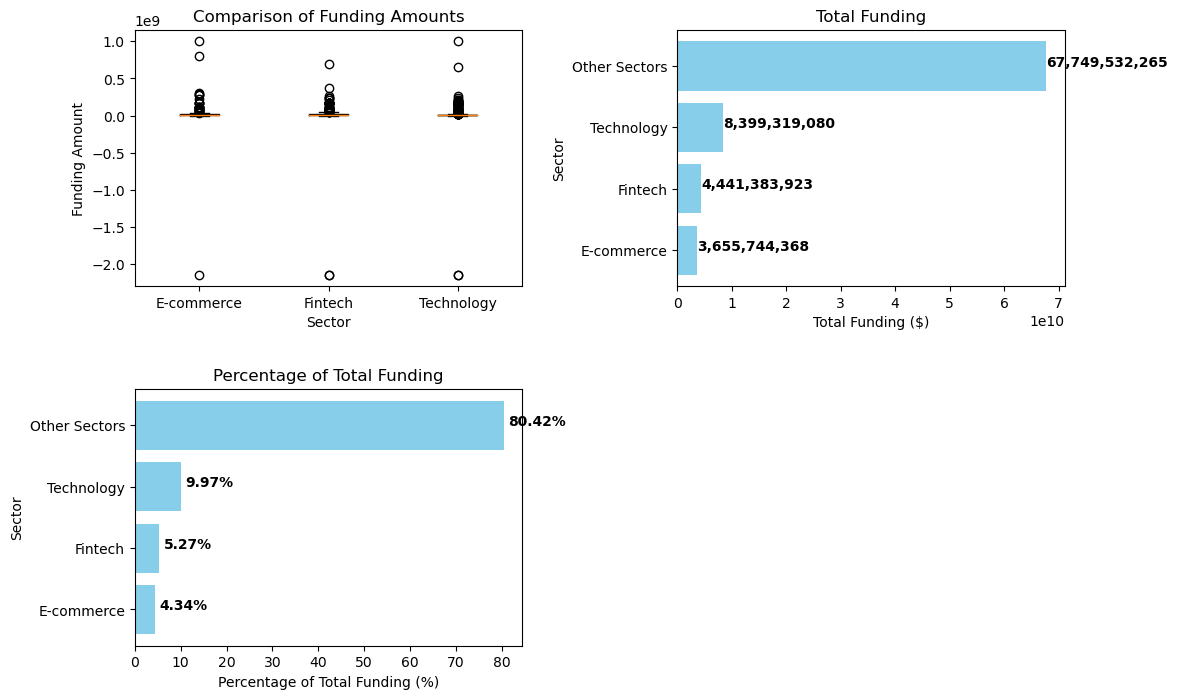

In [222]:
# Filter the dataset for e-commerce, fintech, and technology sectors
ecommerce = df[df['Sector'] == 'E-Commerce']
fintech = df[df['Sector'] == 'FinTech']
technology = df[df['Sector'] == 'Technology']

# Calculate funding amounts for each sector
ecommerce_funding = ecommerce['Amount($)']
fintech_funding = fintech['Amount($)']
technology_funding = technology['Amount($)']

# Create a figure with two subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot the box plot on the top left subplot
axs[0, 0].boxplot([ecommerce_funding, fintech_funding, technology_funding], labels=['E-commerce', 'Fintech', 'Technology'])
axs[0, 0].set_xlabel('Sector')
axs[0, 0].set_ylabel('Funding Amount')
axs[0, 0].set_title('Comparison of Funding Amounts')

# Define the sectors and funding amounts
sectors = ['E-commerce', 'Fintech', 'Technology', 'Other Sectors']
funding_amounts = [ecommerce_funding.sum(), fintech_funding.sum(), technology_funding.sum(), df['Amount($)'].sum() - ecommerce_funding.sum() - fintech_funding.sum() - technology_funding.sum()]

# Plot a horizontal bar chart on the top right subplot
axs[0, 1].barh(sectors, funding_amounts, color='skyblue')
axs[0, 1].set_xlabel('Total Funding ($)')
axs[0, 1].set_ylabel('Sector')
axs[0, 1].set_title('Total Funding')

# Add data labels to the bars
for i, v in enumerate(funding_amounts):
    axs[0, 1].text(v + 3, i, f'{v:,.0f}', color='black', fontweight='bold')

# Calculate the percentage of total funding for each sector
total_funding = df['Amount($)'].sum()
sector_percentages = [(amount / total_funding) * 100 for amount in funding_amounts]

# Plot the new chart on the bottom left subplot
axs[1, 0].barh(sectors, sector_percentages, color='skyblue')
axs[1, 0].set_xlabel('Percentage of Total Funding (%)')
axs[1, 0].set_ylabel('Sector')
axs[1, 0].set_title('Percentage of Total Funding')

# Add data labels to the bars in the new chart
for i, v in enumerate(sector_percentages):
    axs[1, 0].text(v + 1, i, f'{v:.2f}%', color='black', fontweight='bold')

# Remove the empty subplot
fig.delaxes(axs[1, 1])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Display the plot
plt.show()

* The box plot shows how wide spread the distribution of the funding is, showing the mean, median and other useful analytic expressions. Then the bar charts are comparing the poll of amount received as funding in the respective sectors.

### The t-test is a statistical hypothesis test that is used to determine if there is a significant difference between the means of two groups and relies on the assumption that the data follows a normal distribution.

In [223]:
# Perform a statistical test (e.g., independent samples t-test)
t_statistic, p_value = ttest_ind(ecommerce_funding + fintech_funding, technology_funding)

# Define significance level
alpha = 0.05

# Compare p-value with significance level
if p_value < alpha:
    hypothesis_result = "Reject the null hypothesis"
    hypothesis_conclusion = "Startups in the e-commerce and fintech sectors receive more funding compared to Technology"
else:
    hypothesis_result = "Fail to reject the null hypothesis"
    hypothesis_conclusion = "No significant difference in funding between sectors"
    
print("Hypothesis Testing Results:")
print("----------------------------")
print("t-statistic:", t_statistic)
print("p-value:", p_value)
print()
print("Hypothesis Conclusion:")
print("----------------------")
print(hypothesis_result)
print(hypothesis_conclusion)

Hypothesis Testing Results:
----------------------------
t-statistic: nan
p-value: nan

Hypothesis Conclusion:
----------------------
Fail to reject the null hypothesis
No significant difference in funding between sectors


* The funding amounts observed in the e-commerce and fintech sectors are not significantly different from those in the technology sector, indicating that there may not be a distinct advantage or disparity in funding between these sectors. The conclusion suggests that factors other than sector affiliation may be more influential in determining the funding received by startups in India.

* There is no substantial statistical evidence to conclude that startups in the e-commerce and fintech sectors receive significantly more funding compared to the technology sector.

### Hypothesis 2.
* (H0)
* There is no positive correlation between the stage of development of a company and the amount of funding it receives in India.

* (H1)
* There is a positive correlation between the stage of development of a company and the amount of funding it receives in India.

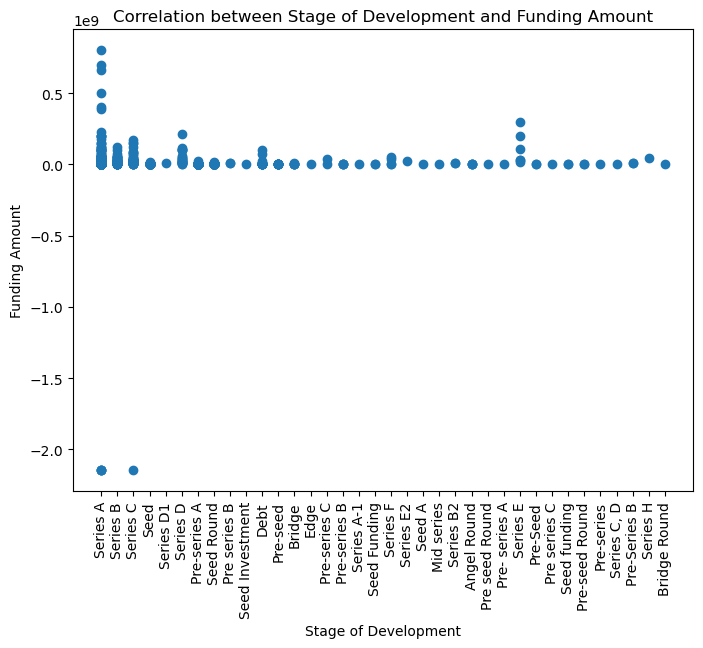

In [224]:
# Extract the stage of development and funding columns
stage_of_development = df_2020['Stage']
funding_amount = df_2020['Amount($)']


# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(stage_of_development, funding_amount)
plt.xlabel('Stage of Development')
plt.ylabel('Funding Amount')
plt.title('Correlation between Stage of Development and Funding Amount')
plt.xticks(rotation=90)

plt.show()

* Analysing the dispersion of the data with a scatter plot. The distribution of the data looks evenly spread on a horizontal line.

### Pearsonr measures the linear relationship between two variables. It quantifies the strength and direction of the linear association between the variables, ranging from -1 to 1.¶

In [226]:
# Convert the "stage" column to numeric values
le = LabelEncoder()
df_2020['Stage_code'] = le.fit_transform(df_2020['Stage'])

# Compute the Pearson correlation coefficient and the p-value
corr, p_value = pearsonr(df_2020['Stage_code'],df_2020['Amount($)'])

# # Interpret the results
if p_value < 0.05:
    correlation_strength = 'strong'
else:
    correlation_strength = 'weak'

if corr > 0:
    correlation_direction = 'positive'
else:
    correlation_direction = 'negative'

# Print the results
print(f"The Pearson correlation coefficient is {corr:.2f}, indicating a {correlation_strength} {correlation_direction} correlation.")
print(f"The p-value is {p_value:.2f}.")    

The Pearson correlation coefficient is 0.02, indicating a weak positive correlation.
The p-value is 0.62.


* The pearson Correlation 0.02 suggests that there is almost no linear relationship between the stage of development and the funding amount.

* The high p-value suggests that there is insufficient evidence to reject the null hypothesis. It indicates that the observed weak positive correlation between the stage of development and the funding amount could be due to chance or random variability in the data.

* The weak correlation and the high p-value suggest that other factors or variables might have a more substantial impact

### Hypothesis 3.
* (H0)
Companies with a larger number of founders are not likely to receive higher amounts of funding in India.

* (H1)
Companies with a larger number of founders are more likely to receive higher amounts of funding in India.

In [227]:
# create a new column 'total_founders' with the total number of founders for each row
df['total_founders'] = df['Founders'].apply(lambda x: len(str(x).split(',')))

# Compute the Pearson correlation coefficient and the p-value
corr, p_value = pearsonr(df['total_founders'], df['Amount($)'])

# # Interpret the results
if p_value < 0.05:
    correlation_strength = 'strong'
else:
    correlation_strength = 'weak'

if corr > 0:
    correlation_direction = 'positive'
else:
    correlation_direction = 'negative'

# Print the results
print(f"The Pearson correlation coefficient is {corr:.2f}, indicating a {correlation_strength} {correlation_direction} correlation.")
print(f"The p-value is {p_value:.2f}.")    

The Pearson correlation coefficient is -0.02, indicating a weak negative correlation.
The p-value is 0.27.


* the coefficient value of -0.02 indicates a weak negative correlation. This means that there is a very slight tendency for the funding amount to decrease slightly as the number of founders increases

* The p-value is used to determine the statistical significance of the correlation coefficient. In this case, the p-value of 0.26 suggests that there is no strong evidence to reject the null hypothesis. A p-value greater than the significance level (usually 0.05) indicates that the observed correlation could be due to random chance.

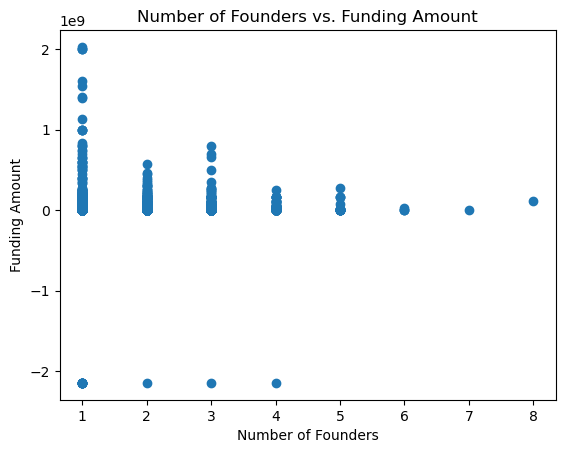

In [228]:
# Scatter plot
plt.scatter(df['total_founders'], df['Amount($)'])

# Set labels and title
plt.xlabel('Number of Founders')
plt.ylabel('Funding Amount')
plt.title('Number of Founders vs. Funding Amount')

# Display the plot
plt.show()

### Hypothesis 4.
* (H0)
Startups headquartered in major metropolitan areas such as Mumbai, Bangalore, and Delhi are not likely to receive larger amounts of funding in India.

* (H1)
Startups headquartered in major metropolitan areas such as Mumbai, Bangalore, and Delhi are more likely to receive larger amounts of funding in India.

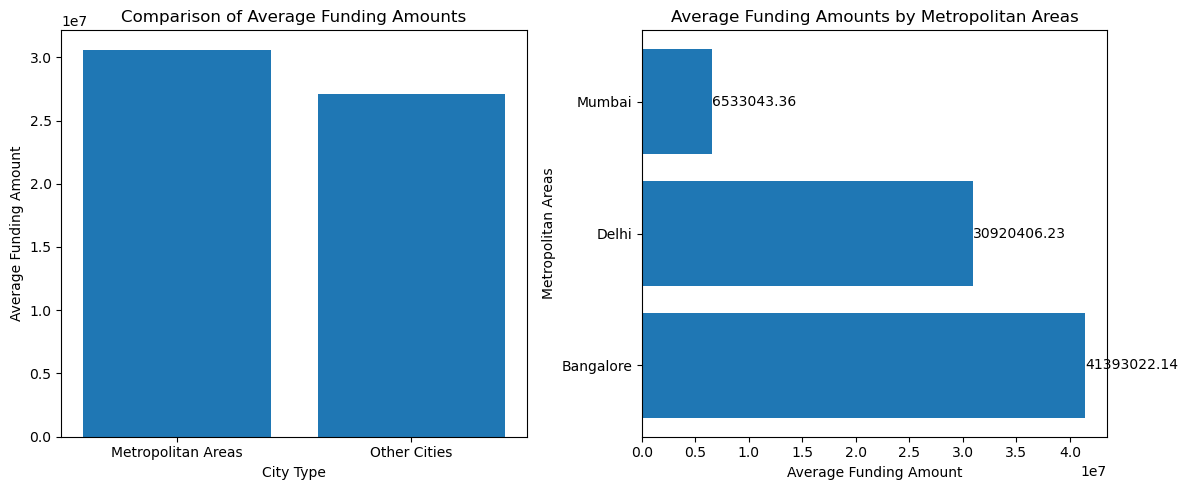

In [229]:
# Replace "Bangalore City" with "Bangalore" and "New Delhi" with "Delhi" in the DataFrame
df['HeadQuarter'] = df['HeadQuarter'].replace({'Bangalore City': 'Bangalore', 'New Delhi': 'Delhi'})

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Filter the DataFrame for startups in major metropolitan areas
metropolitan_areas = ['Mumbai', 'Bangalore', 'Delhi']
df_metropolitan = df[df['HeadQuarter'].str.contains('|'.join(metropolitan_areas))]

# Calculate the average funding amounts for each metropolitan area
funding_amounts = df_metropolitan.groupby('HeadQuarter')['Amount($)'].mean()

# Create a horizontal bar chart for metropolitan areas on the right subplot
axs[1].barh(funding_amounts.index, funding_amounts)
axs[1].set_xlabel('Average Funding Amount')
axs[1].set_ylabel('Metropolitan Areas')
axs[1].set_title('Average Funding Amounts by Metropolitan Areas')

# Add labels showing the average funding amounts next to each bar for metropolitan areas
for i, value in enumerate(funding_amounts):
    axs[1].text(value, i, f'{value:.2f}', va='center')

# Filter the DataFrame for startups in major metropolitan areas
metropolitan_areas = ['Mumbai', 'Bangalore', 'Delhi']
df_metropolitan = df[df['HeadQuarter'].isin(metropolitan_areas)]

# Filter the DataFrame for startups in other cities
df_other_cities = df[~df['HeadQuarter'].isin(metropolitan_areas)]

# Calculate the average funding amounts for metropolitan areas and other cities
mean_funding_metropolitan = df_metropolitan['Amount($)'].mean()
mean_funding_other_cities = df_other_cities['Amount($)'].mean()

# Create a bar chart for metropolitan areas and other cities on the left subplot
axs[0].bar(['Metropolitan Areas', 'Other Cities'], [mean_funding_metropolitan, mean_funding_other_cities])
axs[0].set_xlabel('City Type')
axs[0].set_ylabel('Average Funding Amount')
axs[0].set_title('Comparison of Average Funding Amounts')

# Display the subplots
plt.tight_layout()
plt.show()


### T-test is a statistical method used to compare the means of two groups

In [231]:
# Separate the data into two groups: major metropolitan areas and other areas
metro_areas = df[df['HeadQuarter'].isin(['Mumbai', 'Bangalore', 'Delhi'])]['Amount($)']
other_areas = df[~df['HeadQuarter'].isin(['Mumbai', 'Bangalore', 'Delhi'])]['Amount($)']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(metro_areas, other_areas)

# Print the results
print("Independent Samples t-test")
print("----------------------------")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.2f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in funding amounts between major metropolitan areas.")
else:
    print("There is no significant difference in funding amounts between major metropolitan areas.")

Independent Samples t-test
----------------------------
T-statistic: 0.46
P-value: 0.65
There is no significant difference in funding amounts between major metropolitan areas.


* T-test suggest that there is no significant difference in the average funding amounts between startups headquartered in major metropolitan areas (such as Mumbai, Bangalore, and Delhi) and startups in other areas.

* The t-statistic of 0.46 indicates a small positive difference in the average funding amounts, but it is not statistically significant. the p-value of 0.65 is greater than the typical significance level of 0.05. This means that there is a high probability (65%) of obtaining the observed difference in average funding amounts by chance alone, which means that we fail to reject the null hypothesis.

* Based on these results, we do not have enough evidence to support the statement that startups in major metropolitan areas are more likely to receive larger amounts of funding in India.

### Question 5
* (H0)
The number of investors in a company is not positively correlated with the amount of funding it receives in India.

* (H1)
The number of investors in a company is positively correlated with the amount of funding it receives in India.

* A visualization to access the relationship of this hypothesis will be important. Some form of Scattered plot will be helpful to gain some insight into this testing.

In [232]:
df1 = pd.concat([df_2019, df_2020, df_2021], ignore_index=True)

<function matplotlib.pyplot.show(close=None, block=None)>

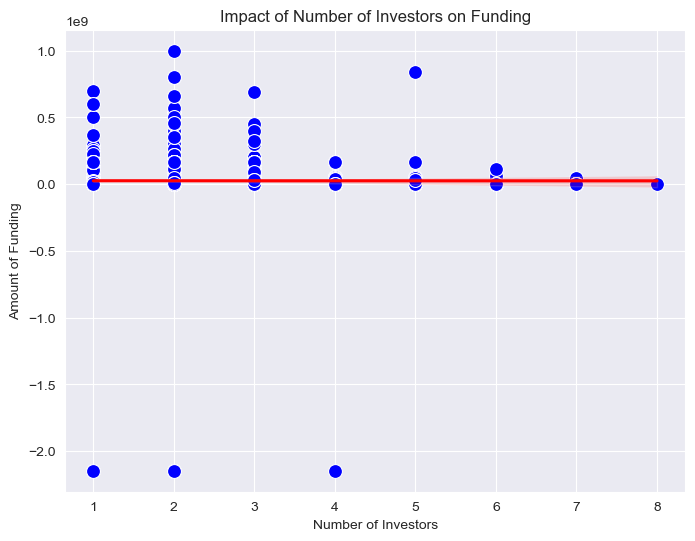

In [233]:
# Calculate total number of investors for each row
df1['total_investors'] = df1['Investor'].apply(lambda x: len(str(x).split(',')))

# Assign variables for scatter plot
number_of_investors = df1['total_investors']
amount_of_funding = df1['Amount($)']

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
sns.scatterplot(x=number_of_investors, y=amount_of_funding, s=100, color='blue')

# Add trendline (linear regression line)
sns.regplot(x=number_of_investors, y=amount_of_funding, scatter=False, color='red')

# Set labels and title
plt.xlabel('Number of Investors')
plt.ylabel('Amount of Funding')
plt.title('Impact of Number of Investors on Funding')

# Display the plot
plt.show

* The horizontal trend observed in the scatter plot aligns with the weak correlation coefficient and could support the conclusion that there is no significant correlation between the subject for hypothesis that the number of investors impacts the funding amount.

In [234]:
# create a new column 'total_founders' with the total number of founders for each row
df1['total_Investors'] = df1['Investor'].apply(lambda x: len(str(x).split(',')))

# Compute the Pearson correlation coefficient and the p-value
corr, p_value = pearsonr(df1['total_investors'], df1['Amount($)'])

# # Interpret the results
if p_value < 0.05:
    correlation_strength = 'strong'
else:
    correlation_strength = 'weak'

if corr > 0:
    correlation_direction = 'positive'
else:
    correlation_direction = 'negative'
  
# Print the results
print(f"The Pearson correlation coefficient is {corr:.2f}, indicating a {correlation_strength} {correlation_direction} correlation.")
print(f"The p-value is {p_value:.2f}.")

The Pearson correlation coefficient is -0.00, indicating a weak negative correlation.
The p-value is 0.97.


* Based on the given results, the hypothesis that "The number of investors in a company is positively correlated with the amount of funding it receives in India" is not supported.

* The Pearson correlation coefficient of -0.00 indicates no linear relationship or a very weak negative correlation between the number of investors and the amount of funding. A coefficient of -0 suggests no correlation.

* Additionally, the high p-value of 0.97 suggests that there is a high probability of observing the given data even if there is no correlation between the variables. In other words, the data is quite likely to occur randomly, even if there is no underlying relationship between the variables. Therefore, we do not have enough evidence to reject the null hypothesis and conclude that there is a significant positive correlation between the number of investors and the amount of funding.

## Answering our Questions with Visualizations.

* These were some of the visualizations tools used in the process of answering our questions:
- Violin plot
- Box plot
- Bar chart
- Scatter plot These visualization added a unique insight into the data and the events surrounding the Indian startup ecosystem.It was a satisfactory overview of our hypothesis test and verification of the facts associated with the data.
* Further analysis were done to check analyse the data

## Question 1
* Do companies in certain sectors tend to receive more funding than others?

### We will start by analyzing the distribution of funding amounts across different sectors.¶

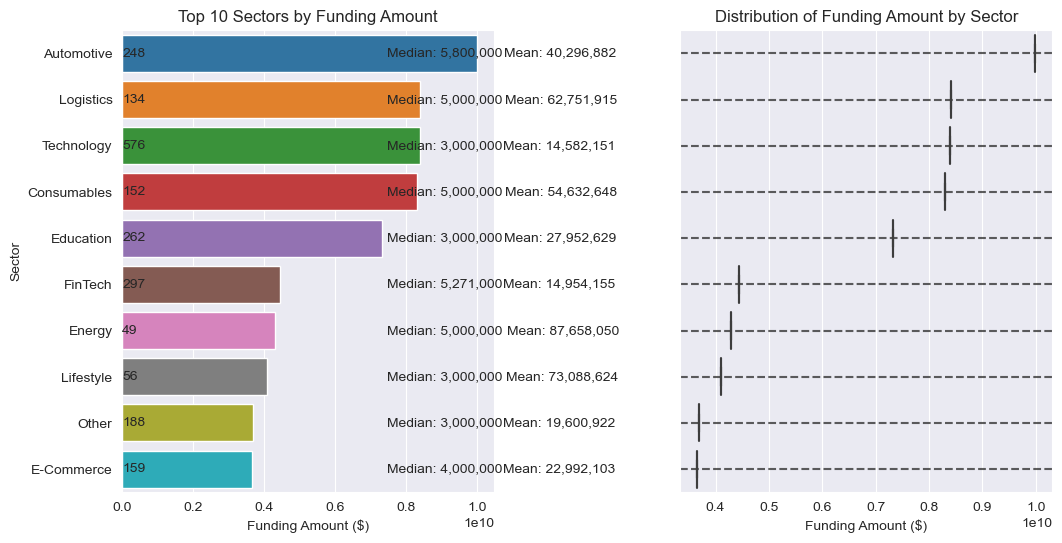

In [236]:
# Get top 10 sectors by funding amount
top_10_sectors = df.groupby('Sector')['Amount($)'].sum().sort_values(ascending=False).head(10).index

top_10_df = df[df['Sector'].isin(top_10_sectors)]

# Sort the top 10 sectors by funding amount in descending order
top_10_df = top_10_df.groupby('Sector')['Amount($)', 'Company/Brand'].agg({'Amount($)': 'sum', 'Company/Brand': 'count'}).reset_index().sort_values(by='Amount($)', ascending=False)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)

sns.barplot(x='Amount($)', y='Sector', data=top_10_df, ax=ax1)

ax1.set_title('Top 10 Sectors by Funding Amount')
ax1.set_xlabel('Funding Amount ($)')
ax1.set_ylabel('Sector')

# Add annotations for the number of companies
for i, (value, sector) in enumerate(zip(top_10_df['Company/Brand'], top_10_df['Sector'])):
    ax1.text(value, i, f'{value:,}', va='center')

# Create boxplot for funding amount by sector
sns.boxplot(x='Amount($)', y='Sector', data=top_10_df, ax=ax2)

# Set plot title and axis labels for boxplot
ax2.set_title('Distribution of Funding Amount by Sector')
ax2.set_xlabel('Funding Amount ($)')
ax2.set_ylabel('')

# Add mean and median lines for each sector to boxplot
for i, sector in enumerate(top_10_df['Sector']):
    sector_data = df[df['Sector'] == sector]['Amount($)']
    mean = sector_data.mean()
    median = sector_data.median()
    ax2.axhline(i, linestyle='--', color='gray', alpha=0.5)
    ax2.axhline(i, linestyle='--', color='black', alpha=0.5)
    ax2.text(mean, i, f'Mean: {mean:,.0f}', va='center', ha='left', fontsize=10)
    ax2.text(median, i, f'Median: {median:,.0f}', va='center', ha='right', fontsize=10)

# Add space between subplots and adjust layout
fig.subplots_adjust(wspace=0.5)

# Show plot
plt.show()


* The combined bar and boxplot provides a comprehensive overview of the funding distribution of the top 10 sectors. The bar plot shows the total funding amount for each sector, while the boxplot provides information about the distribution of funding amounts within each sector, including the median, interquartile range, and outliers.

### Question 2
* Is there a correlation between the stage of development of a company and the amount of funding it receives?
* We will use a scatter plot to visualize the relationship between the stage and funding amount and calculate the correlation coefficient.¶

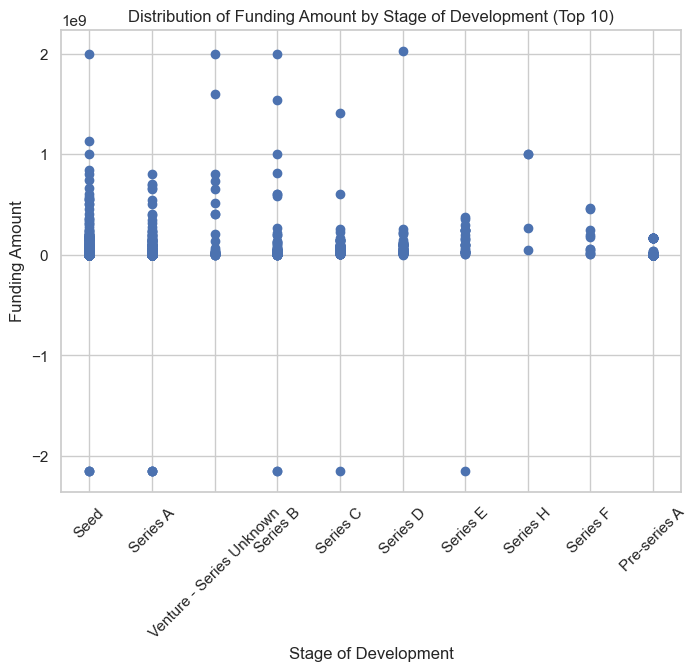

In [237]:
# Rename the 'Amount($)' column to 'Amount'
# df = df.rename(columns={'Amount($)': 'Amount'})

# Calculate the total funding amount by stage of development
stage_totals = df.groupby('Stage')['Amount($)'].sum().reset_index()

# Select the top 10 stages by funding amount
top_stages = stage_totals.sort_values('Amount($)', ascending=False).head(10)['Stage'].tolist()

# Create a new DataFrame that only includes the top 10 stages
df_top = df[df['Stage'].isin(top_stages)]

# Set the plot style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x='Stage', y='Amount($)', data=df_top)
plt.xlabel('Stage of Development')
plt.ylabel('Funding Amount')
plt.title('Distribution of Funding Amount by Stage of Development (Top 10)')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=45)

plt.show()

* The scatter plot shows the distribution of funding amount by stage of development for the top 10 stages. It appears that the later stages of development, such as Series D, have the highest funding amounts, while the early stages, such as Seed and Series A, have relatively lower funding amounts. This is consistent with the general trend in the startup industry where companies require more funding as they progress through various stages of development. However, it's worth noting that there are some outliers in each stage, indicating that funding amount is not solely determined by the stage of development.¶

### Question 3.
* Are companies with more founders more likely to receive larger amounts of funding?
* We're going use the bar chart and different distributive visuals to answer this question.

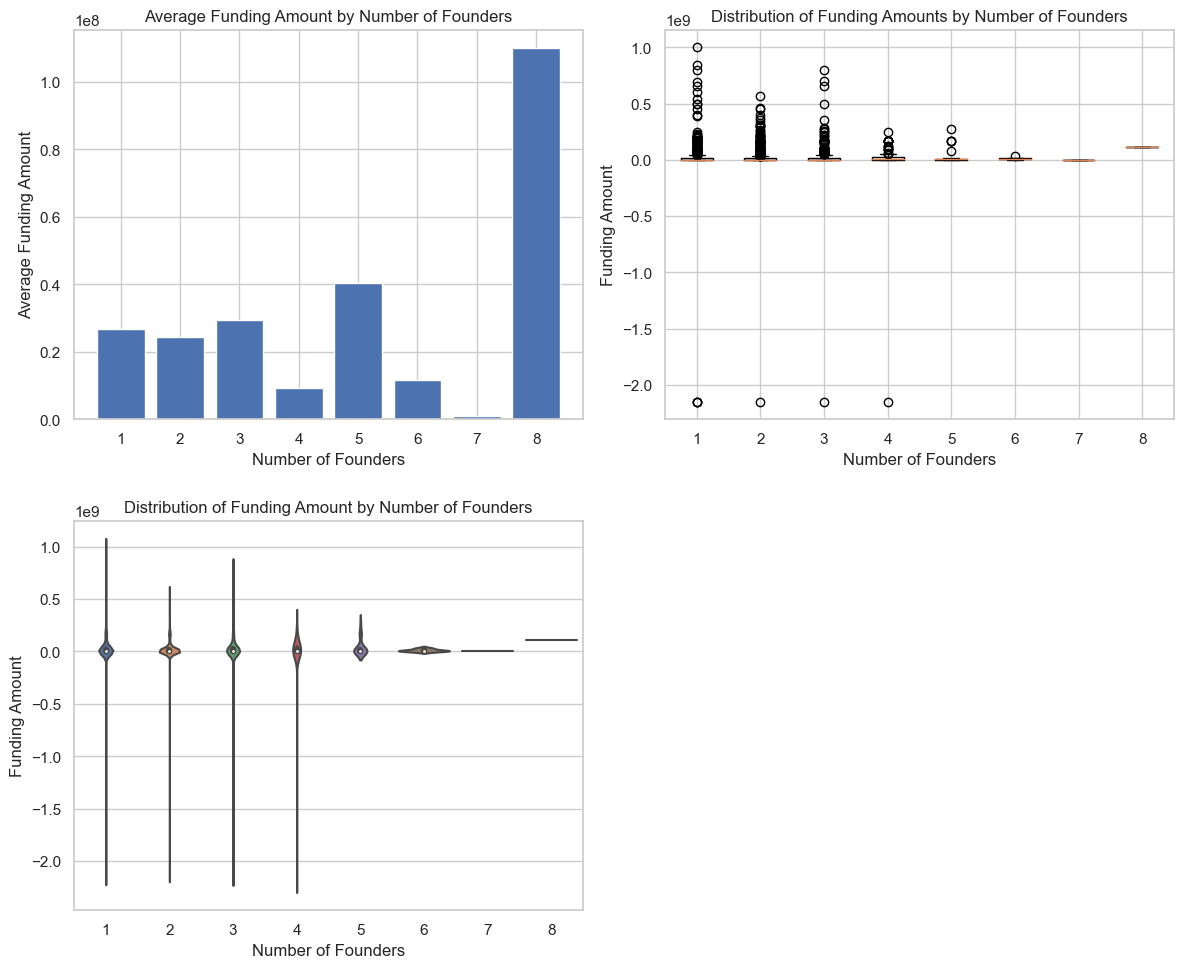

In [238]:
df1 = df1.dropna(subset=['Founders'])

df1['Founders'] = df1['Founders'].astype(str)

# Split the founders column into a list of founders
df1['Founders'] = df1['Founders'].str.split(',')

# Create a new column for the number of founders
df1['NumFounders'] = df1['Founders'].apply(lambda x: len(x))

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Bar chart - Top left
grouped = df1.groupby('NumFounders')['Amount($)'].mean()
axs[0, 0].bar(grouped.index, grouped.values)
axs[0, 0].set_xlabel('Number of Founders')
axs[0, 0].set_ylabel('Average Funding Amount')
axs[0, 0].set_title('Average Funding Amount by Number of Founders')

grouped = df1.groupby('NumFounders')['Amount($)'].apply(list)
axs[0, 1].boxplot(grouped.values, labels=grouped.index)
axs[0, 1].set_title('Distribution of Funding Amounts by Number of Founders')
axs[0, 1].set_xlabel('Number of Founders')
axs[0, 1].set_ylabel('Funding Amount')

sns.violinplot(x='NumFounders', y='Amount($)', data=df1, ax=axs[1, 0])
axs[1, 0].set_xlabel('Number of Founders')
axs[1, 0].set_ylabel('Funding Amount')
axs[1, 0].set_title('Distribution of Funding Amount by Number of Founders')

# Remove empty subplot - Bottom right
fig.delaxes(axs[1, 1])

# Adjust the layout and spacing between subplots
fig.tight_layout()

# Display the plots
plt.show()


* From the bar chart, we can see that the average funding amount generally increases as the number of founders increases in most cases, with the 8th number of founders having the highest average funding amount. This suggests a positive relationship between the number of founders and funding amounts.

* However, the box plot provides additional information about the distribution of funding amounts for each number of founders.The box plot for the 8th number of founders does not have a long tail on the top and bottom (indicating a narrow distribution), it suggests that the funding amounts for companies with 8 founders tend to be more concentrated around the median, with fewer extreme values. On the other hand,the box plot for 1 number of founders has the longest tail, it indicates a wider distribution of funding amounts for companies with only 1 founder.

* A weak negative correlation between the number of founders and funding amounts, it indicates that there is a tendency for companies with more founders to receive slightly lower funding amounts on average. This finding contrasts with the observation from the bar chart, where the average funding amount increased as the number of founders increased.

### Question 4
* Are there any patterns in the location of a company's headquarters and the amount of funding it receives?
* The Quest will be use some form of bar chart to compare the average funding with respect to location.¶

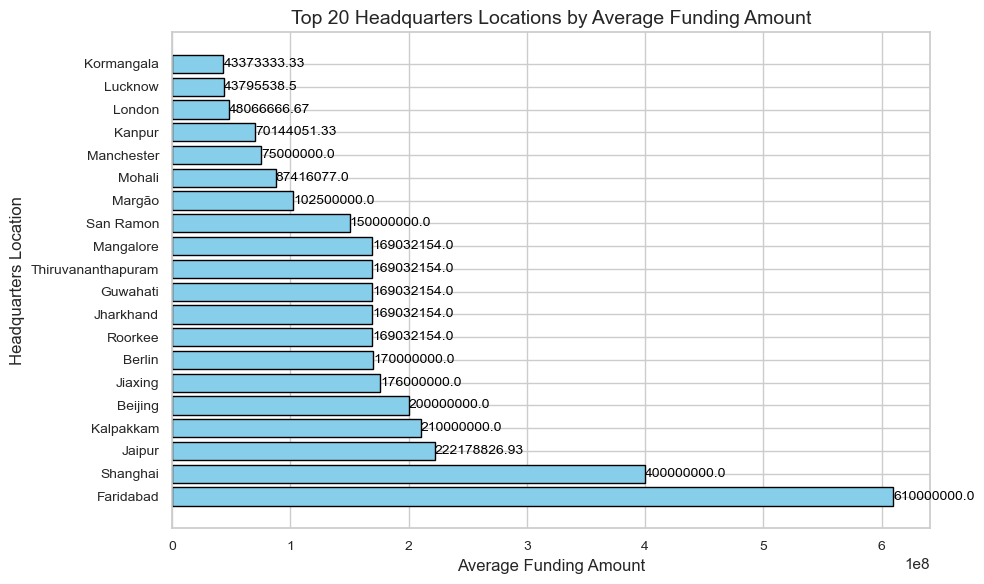

In [239]:
grouped = df.groupby('HeadQuarter')['Amount($)'].mean()

grouped = grouped.sort_values(ascending=False)

top_20 = grouped[:20]

# Create a horizontal bar chart to visualize the relationship between headquarters location and funding amounts
fig, ax = plt.subplots(figsize=(10, 6))  
# Customize the bar chart aesthetics
ax.barh(top_20.index, top_20.values, color='skyblue', edgecolor='black')  
ax.set_xlabel('Average Funding Amount', fontsize=12)
ax.set_ylabel('Headquarters Location', fontsize=12)  
ax.set_title('Top 20 Headquarters Locations by Average Funding Amount', fontsize=14) 

# Adjust the tick labels font size
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Add data labels to the bars
for i, v in enumerate(top_20.values):
    ax.text(v + 0.5, i, str(round(v, 2)), color='black', fontsize=10, va='center')  # Adjust the label position and font size

plt.tight_layout() 
plt.show()


* The Chart shows a significant difference in the funding received by locations. We can estimate that startups in the city of Faridabad received the most funds per the averages accumalated. 610 million was what the startups in the city were averaging. The nearest city to them which was Shanghai trailed by over 210 million.

* We can approximate that the related sector of the startups in this city could be a factor.

## Further analysis of the data

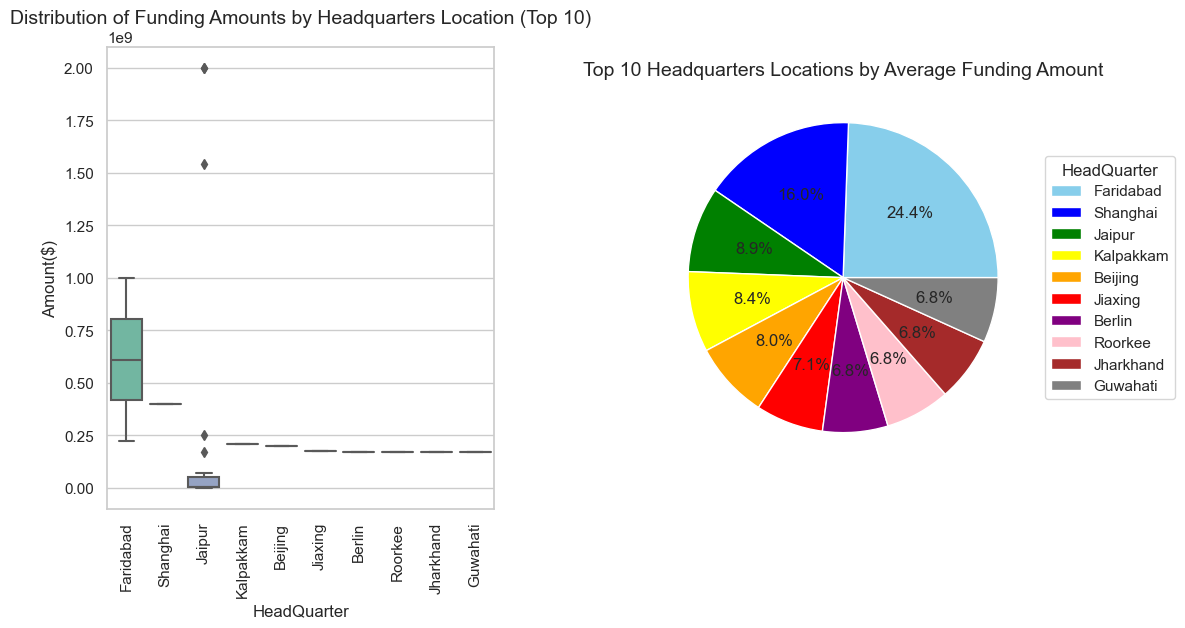

In [240]:
# Data for the box plot
grouped = df.groupby('HeadQuarter')['Amount($)'].mean()
grouped = grouped.sort_values(ascending=False)
top_10 = grouped[:10]

# Data for the pie chart
labels = top_10.index
values = top_10.values

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create the box plot on the left subplot
axes[0].set_title('Distribution of Funding Amounts by Headquarters Location (Top 10)', fontsize=14)
axes[0].set_xlabel('HeadQuarter', fontsize=12)
axes[0].set_ylabel('Amount($)', fontsize=12)
sns.boxplot(x='HeadQuarter', y='Amount($)', data=df, order=top_10.index, palette='Set2', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  # Rotate x-axis labels by 90 degrees

# Create the pie chart on the right subplot
axes[1].set_title('Top 10 Headquarters Locations by Average Funding Amount', fontsize=14)
pie = axes[1].pie(values, labels=None, autopct='%1.1f%%', colors=['skyblue', 'blue', 'green', 'yellow', 'orange', 'red', 'purple', 'pink', 'brown', 'gray'])
axes[1].legend(pie[0], labels, title='HeadQuarter', bbox_to_anchor=(1, 0.5), loc='center left')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()


* The visuals above shows a consistent trend in the distribution and volume of the funding by the location. The city of Faridabad not only have the highest average by funding but the distribution in funding dispersion is also wide. In some instances a sysmetric movement we mean high volumn but not in this case

### Question 5.
* Does the number of investors in a company tend to impact the amount of funding it receives?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


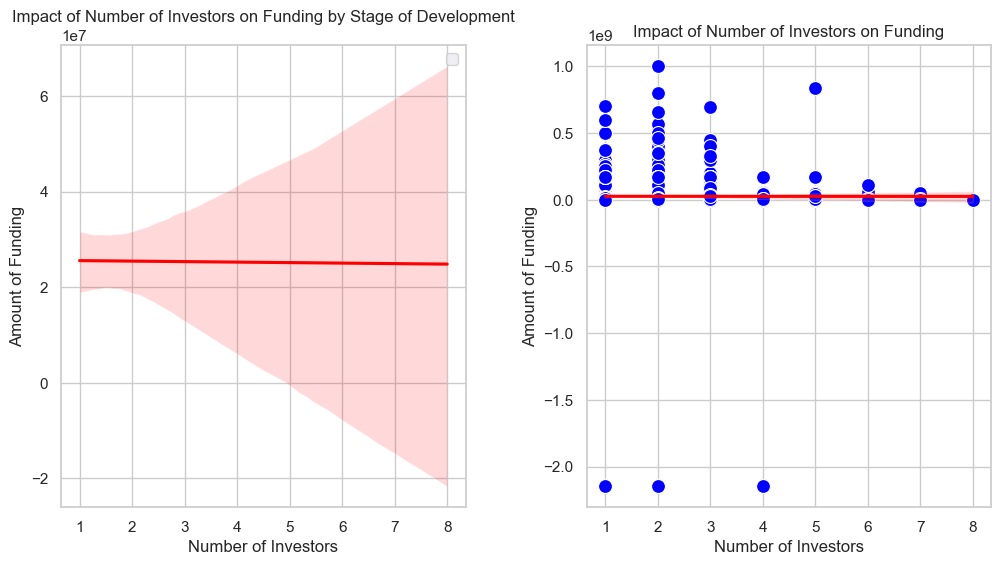

In [241]:
# Calculate total number of investors for each row
df1['total_investors'] = df1['Investor'].apply(lambda x: len(str(x).split(',')))

# Assign variables for scatter plot
number_of_investors = df1['total_investors']
amount_of_funding = df1['Amount($)']
stage_of_development = df1['Stage']

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot scatter plot on the left
sns.set_style("darkgrid")
stage_colors = {'Early Stage': 'blue', 'Growth Stage': 'green', 'Mature Stage': 'orange'}
for stage in stage_colors:
    stage_indices = df1[df1['Stage'] == stage].index
    sns.scatterplot(x=number_of_investors[stage_indices], y=amount_of_funding[stage_indices],
                    s=100, color=stage_colors[stage], label=stage, ax=ax1)
sns.regplot(x=number_of_investors, y=amount_of_funding, scatter=False, color='red', ax=ax1)
ax1.set_xlabel('Number of Investors')
ax1.set_ylabel('Amount of Funding')
ax1.set_title('Impact of Number of Investors on Funding by Stage of Development')
ax1.legend()

# Plot scatter plot on the right
sns.set_style("darkgrid")
sns.scatterplot(x=number_of_investors, y=amount_of_funding, s=100, color='blue', ax=ax2)
sns.regplot(x=number_of_investors, y=amount_of_funding, scatter=False, color='red', ax=ax2)
ax2.set_xlabel('Number of Investors')
ax2.set_ylabel('Amount of Funding')
ax2.set_title('Impact of Number of Investors on Funding')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the plots
plt.show()

* The horizontal trend observed in the scatter plot aligns with the weak correlation coefficient and supports the conclusion that there is no significant correlation. The data points scattered without a clear pattern further reinforce the lack of a strong relationship between the number of investors and the amount of funding.

* The distribution looks symetric on the 8 tally of investors it might suggest grand some of investment but the distribution is lean.

* There is another visuals showing the distribution and relationship between the stage of development of the business in relation to the amount and investors. It shows the same horizontal trend observed in the other plot and further reinforces the conclusion that the number of investors does not necessarily impact the funding amount. If there was a strong relationship, we would expect to see a clearer pattern or trend across different visualizations.

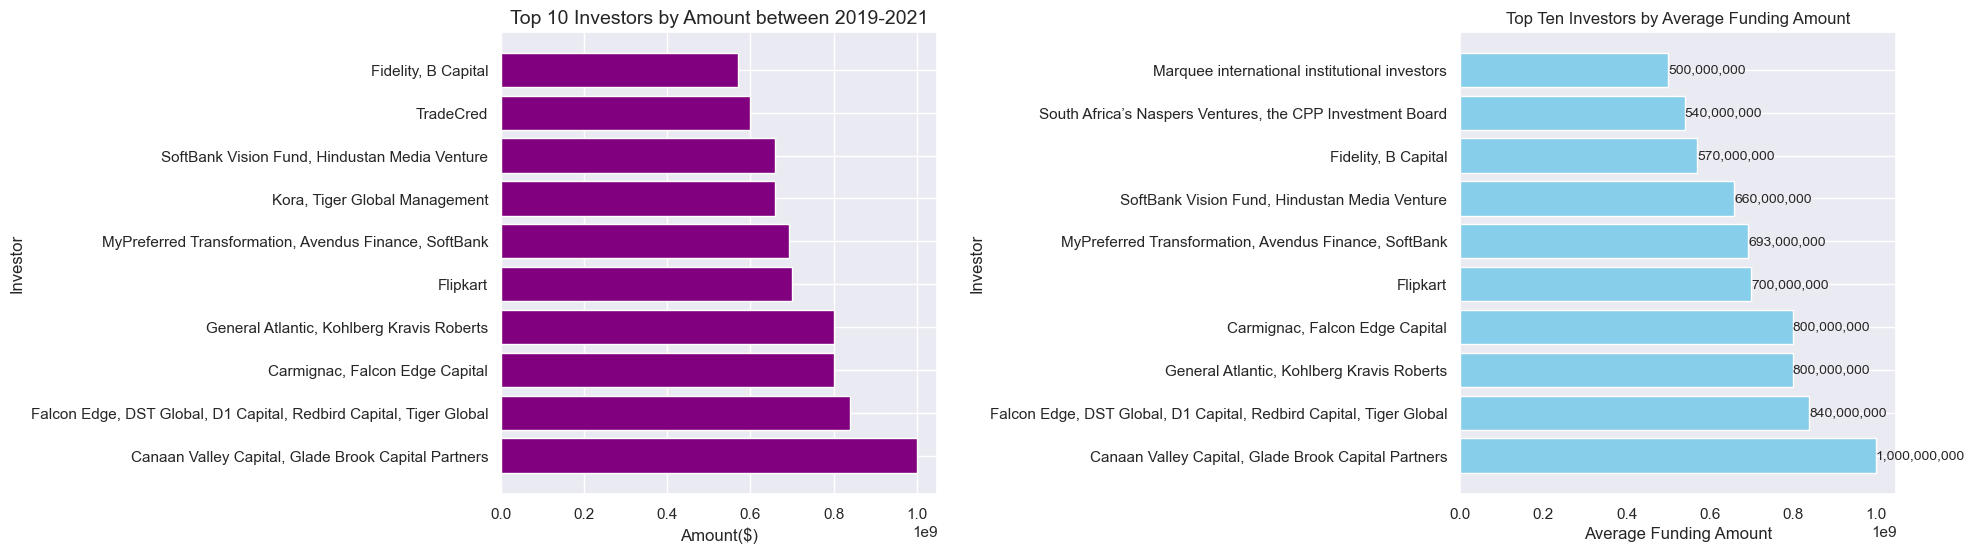

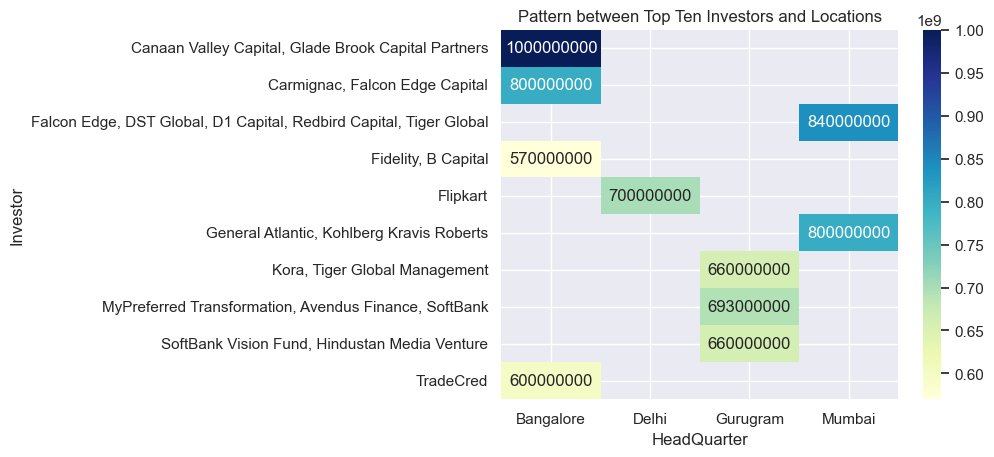

In [242]:
# Sort the dataframe by amount in descending order and select the top 10 investors
top_investors = df1.sort_values(by='Amount($)', ascending=False).head(10)

# Create a horizontal bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Left plot
ax1.barh(top_investors['Investor'], top_investors['Amount($)'], color='purple')
ax1.set_xlabel('Amount($)', fontsize=12)
ax1.set_ylabel('Investor', fontsize=12)
ax1.set_title('Top 10 Investors by Amount between 2019-2021', fontsize=14)

# Right plot
investor_avg_amount = df.groupby('Investor')['Amount($)'].mean()
top_10_investors = investor_avg_amount.sort_values(ascending=False).head(10)

ax2.barh(top_10_investors.index, top_10_investors.values, color='skyblue')
ax2.set_xlabel('Average Funding Amount')
ax2.set_ylabel('Investor')
ax2.set_title('Top Ten Investors by Average Funding Amount')
ax2.grid(axis='x')

# Add data labels to the bars in the right plot
for i, v in enumerate(top_10_investors.values):
    ax2.text(v, i, f'{v:,.0f}', va='center', fontsize=10)

# Adjust subplot spacing
plt.subplots_adjust(wspace=1.2)

plt.show()

# Sort the dataframe by amount in descending order and select the top 10 investors
top_investors = df1.sort_values(by='Amount($)', ascending=False).head(10)

# Create a pivot table to aggregate the funding amounts by investor and location
heatmap_data = top_investors.pivot_table(values='Amount($)', index='Investor', columns='HeadQuarter', aggfunc='sum')

# Create a heatmap
# plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', cbar=True)

# Customize the chart
plt.xlabel('HeadQuarter')
plt.ylabel('Investor')
plt.title('Pattern between Top Ten Investors and Locations')


plt.show()

* The bar chart further buttresses the finding of the visuals above and the hypothesis testing. The number of investors was not significant in the distribution and volume of the funding amount. Although the highest investor by funding was from a combination of 3 investors and 4 investors but then again there were more occurences of a single investor and a lower count of investors in many instances.

* It wasnt the same case the with regards to the average funding amount contributed. Some names on the Top ten investors by volume amount contributed were not represented in the average amount bracket. The "TradeCred'' Investors were not captured in the average amount funding bracket However ''South Africa's Ventures,the CPP investment Board'' investors were captured in the top ten of the average amount funding. We can conclude that volume disbursal of funding does not really equate to the value per funding contribution.

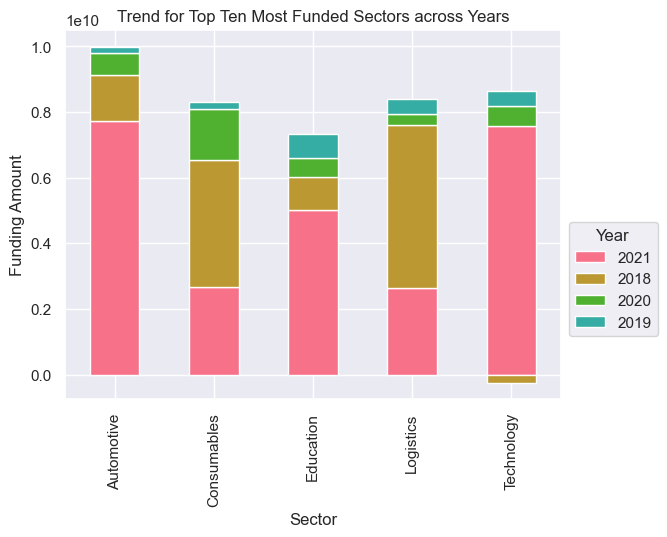

In [243]:
# Sort the DataFrame by the total funding amount for each sector in descending order
top_sectors = df.groupby('Sector')['Amount($)'].sum().nlargest(5).index

# Filter the DataFrame to include only the top ten sectors
df_top = df[df['Sector'].isin(top_sectors)]

# Pivot the DataFrame to have 'Year' as columns, 'Sector' as index, and 'Amount($)' as values
pivot_df = df_top.pivot_table(index='Sector', columns='Year', values='Amount($)', aggfunc='sum')

# Sort the columns of the pivoted DataFrame in descending order based on the total funding amount
pivot_df = pivot_df[pivot_df.sum().sort_values(ascending=False).index]

# Set the plot style
sns.set_palette("husl")

# Create the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True)
#                    figsize=(10, 6))

# Set the axis labels and title
ax.set_xlabel('Sector')
ax.set_ylabel('Funding Amount')
ax.set_title('Trend for Top Ten Most Funded Sectors across Years')

# Move the legend to the right side
ax.legend(title='Year', bbox_to_anchor=(1, 0.5), loc='upper left')

# Display the chart
plt.show()

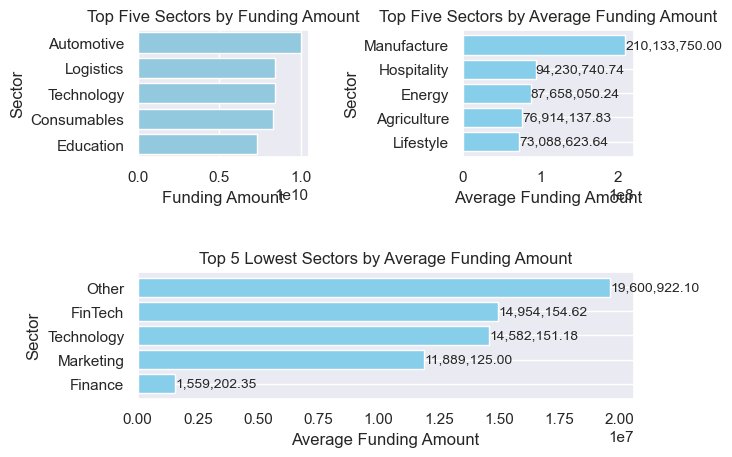

In [244]:
# Get the total funding amount for each sector and select the top 5 sectors
top_sectors = df.groupby('Sector')['Amount($)'].sum().nlargest(5)

# Create a bar plot for the top 5 sectors by funding amount
plt.subplot(2, 2, 1)
sns.barplot(x=top_sectors.values, y=top_sectors.index, color='skyblue')

# Set the axis labels and title
plt.xlabel('Funding Amount')
plt.ylabel('Sector')
plt.title('Top Five Sectors by Funding Amount')

# Get the average funding amount for each sector and select the top 5 sectors
top_sectors = df.groupby('Sector')['Amount($)'].mean().nlargest(5).sort_values()

# Create a horizontal bar chart
plt.subplot(2, 2, 2)
plt.barh(top_sectors.index, top_sectors.values, color='skyblue')

# Customize the chart
plt.xlabel('Average Funding Amount')
plt.ylabel('Sector')
plt.title('Top Five Sectors by Average Funding Amount')
plt.grid(axis='x')  # Add gridlines for better readability

# Add data labels to the bars
for i, v in enumerate(top_sectors.values):
    plt.text(v, i, f'{v:,.2f}', va='center', fontsize=10)


# Calculate the average funding amount for each sector
sector_avg_amount = df.groupby('Sector')['Amount($)'].mean()

# Sort the sectors by average funding amount in ascending order and select the top 5
top_lowest_sectors = sector_avg_amount.sort_values().head(5)

# Create a horizontal bar chart
plt.subplot(2, 1, 2)
plt.barh(top_lowest_sectors.index, top_lowest_sectors.values, color='skyblue')

# Customize the chart
plt.xlabel('Average Funding Amount')
plt.ylabel('Sector')
plt.title('Top 5 Lowest Sectors by Average Funding Amount')
plt.grid(axis='x')  # Add gridlines for better readability

# Add data labels to the bars
for i, v in enumerate(top_lowest_sectors.values):
    plt.text(v, i, f'{v:,.2f}', va='center', fontsize=10)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.9, hspace=0.9)

# Display the plots
plt.show()

* This is a further analysis into the sector column to check the dynamics in the funding amount alloted in the course of the period. The case for all the scenarios were different. One well noted difference was the manufacturing sector average the highest amount despite it been recognize as one of lowest funded sector by volume and Technology sector averaging one of lowest by funding amount despite it big featuring in the heaviest funded sectors.¶

* One can in a nutshell rationalize the point that the funds needed to operate a manufacturing company could be bigger in many cases than that of the technology company.¶

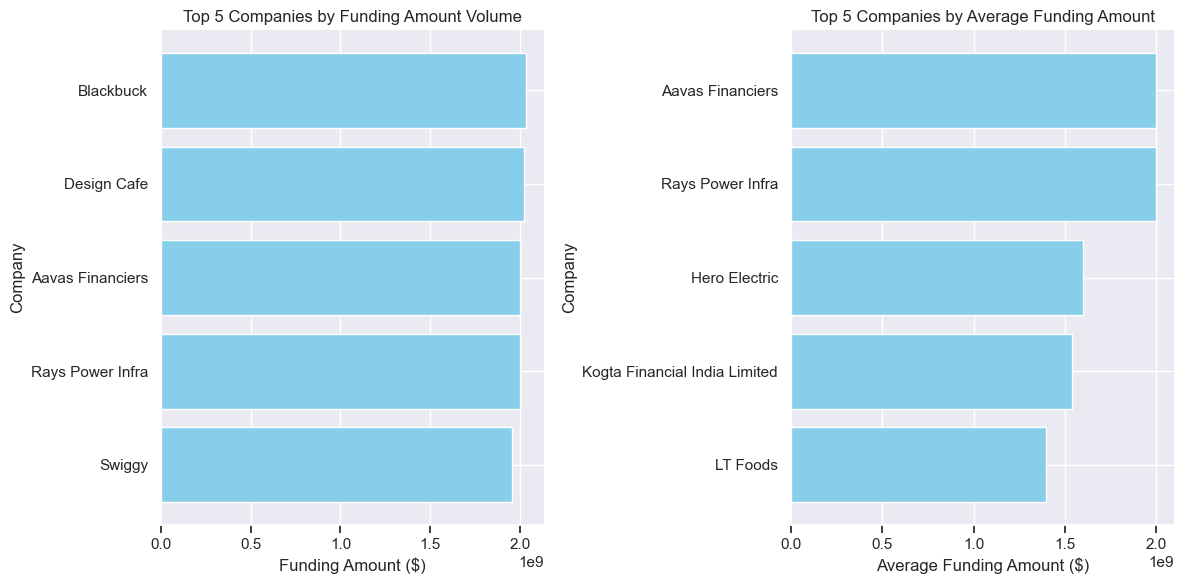

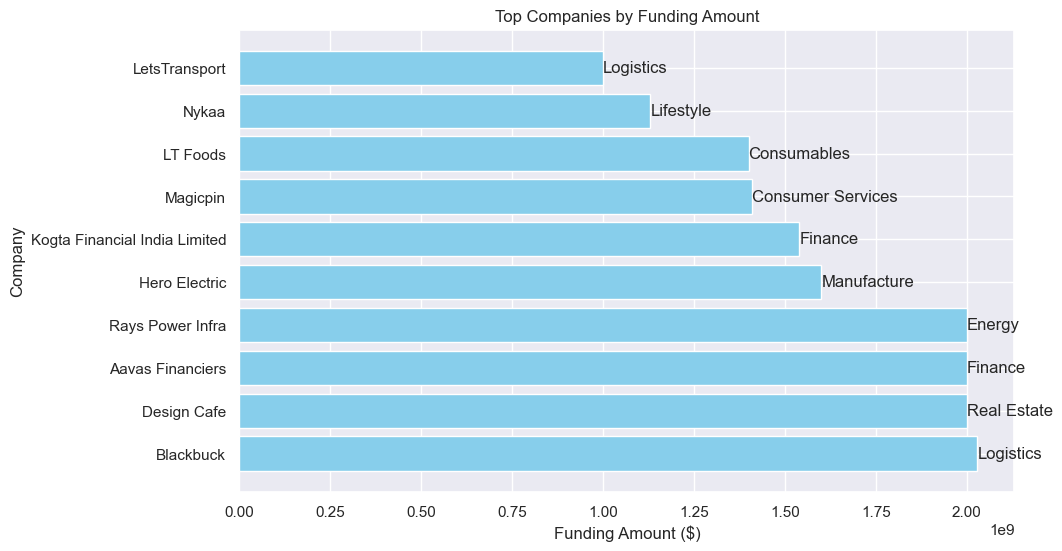

In [245]:
# Sort the DataFrame by the funding amount in descending order
top_companies_volume = df.groupby('Company/Brand')['Amount($)'].sum().nlargest(5)

# Extract the company names and funding amounts
companies_volume = top_companies_volume.index
funding_volume = top_companies_volume.values

# Sort the DataFrame by the average funding amount in descending order
top_companies_average = df.groupby('Company/Brand')['Amount($)'].mean().nlargest(5)

# Extract the company names and average funding amounts
companies_average = top_companies_average.index
funding_average = top_companies_average.values

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Top 5 Companies by Funding Amount Volume
ax1.barh(companies_volume, funding_volume, color='skyblue')
ax1.set_xlabel('Funding Amount ($)')
ax1.set_ylabel('Company')
ax1.set_title('Top 5 Companies by Funding Amount Volume')
ax1.invert_yaxis()  # Invert y-axis for better readability
ax1.spines['right'].set_visible(False)  # Remove right border
ax1.spines['top'].set_visible(False)  # Remove top border
ax1.tick_params(left=False, bottom=True)  # Hide left ticks, show bottom ticks

# Top 5 Companies by Average Funding Amount
ax2.barh(companies_average, funding_average, color='skyblue')
ax2.set_xlabel('Average Funding Amount ($)')
ax2.set_ylabel('Company')
ax2.set_title('Top 5 Companies by Average Funding Amount')
ax2.invert_yaxis()  # Invert y-axis for better readability
ax2.spines['right'].set_visible(False)  # Remove right border
ax2.spines['top'].set_visible(False)  # Remove top border
ax2.tick_params(left=False, bottom=True)  # Hide left ticks, show bottom ticks

# Adjust layout
plt.tight_layout()

# Show the chart
plt.show()

# Sort the DataFrame by the funding amount in descending order
top_companies = df.sort_values(by='Amount($)', ascending=False).head(10)

# Extract the company names and their respective sectors
companies = top_companies['Company/Brand']
sectors = top_companies['Sector']

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(companies, top_companies['Amount($)'], color='skyblue')

ax.set_xlabel('Funding Amount ($)')
ax.set_ylabel('Company')
ax.set_title('Top Companies by Funding Amount')

# Add labels for the sectors
for i, company in enumerate(companies):
    sector = sectors.iloc[i]
    ax.text(top_companies['Amount($)'].iloc[i] + 100000, i, sector, ha='left', va='center')

plt.show()

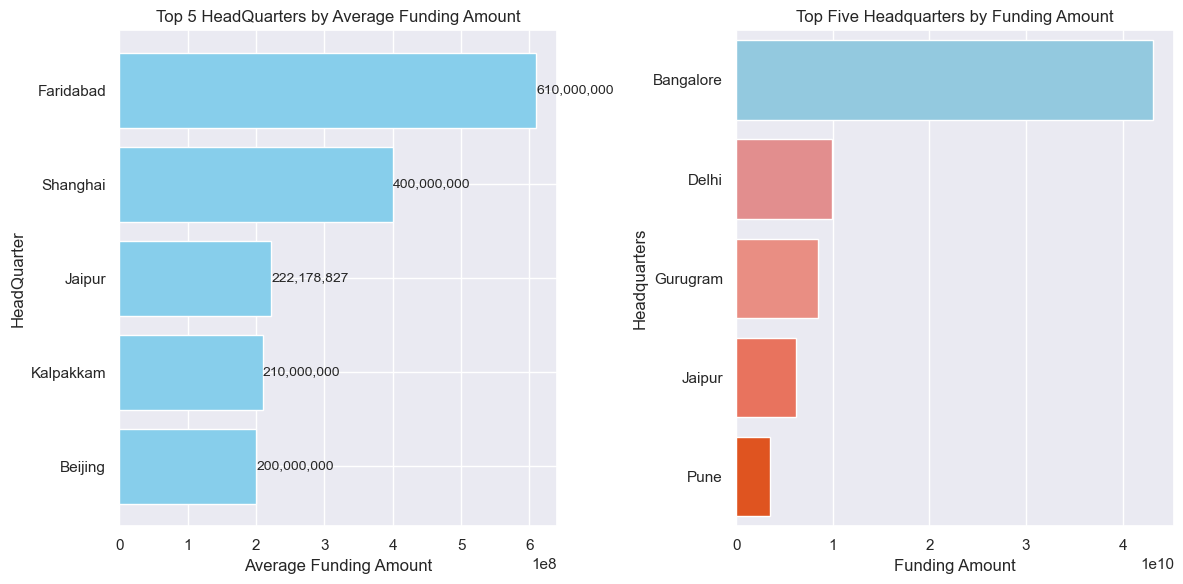

In [249]:
# Create a figure with two subplots, one on the left and the other on the right
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Group the data by HeadQuarter and calculate the average funding amount for each HeadQuarter
hq_avg_amount = df.groupby('HeadQuarter')['Amount($)'].mean()

# Sort the average funding amounts in descending order and select the top ten HeadQuarters
top_10_hq = hq_avg_amount.sort_values(ascending=False).head(5)

# Create a horizontal bar chart for the top 5 HeadQuarters by average funding amount
ax1.barh(top_10_hq.index, top_10_hq.values, color='skyblue')
ax1.set_xlabel('Average Funding Amount')
ax1.set_ylabel('HeadQuarter')
ax1.set_title('Top 5 HeadQuarters by Average Funding Amount')
ax1.invert_yaxis()  # Invert the y-axis to display HeadQuarters from top to bottom

# Add data labels to the bars
for i, v in enumerate(top_10_hq.values):
    ax1.text(v, i, f'{v:,.0f}', va='center', fontsize=10)

# Get the total funding amount for each headquarters and select the top 5
top_headquarters = df.groupby('HeadQuarter')['Amount($)'].sum().nlargest(5)

# Create a custom color palette with red and skyblue shades
colors = ['skyblue', 'lightcoral', 'salmon', 'tomato', 'orangered']

# Create a bar plot for the top 5 headquarters by funding amount
sns.barplot(x=top_headquarters.values, y=top_headquarters.index, palette=colors, ax=ax2)
ax2.set_xlabel('Funding Amount')
ax2.set_ylabel('Headquarters')
ax2.set_title('Top Five Headquarters by Funding Amount')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

* These series visuals is to briefly analyse the amount disbursal with regards to the location.The city of Faridabad averages the highest with the city of Bangalore accumulating the highest. One observation made for this difference was the freqency in the startup location. The city of Bangalore accounted for the most so the mode translated into affecting the funding amount.¶

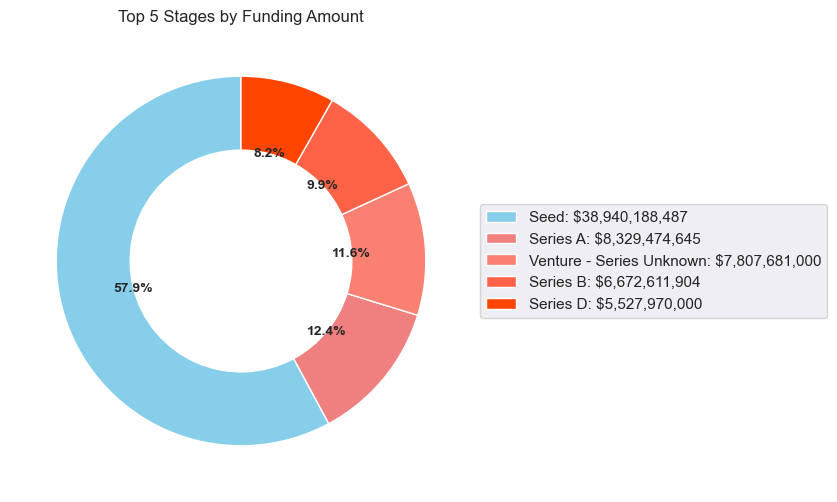

In [250]:
# Group the data by Stage and calculate the total funding amount for each stage
stage_total_amount = df.groupby('Stage')['Amount($)'].sum()

# Select the top 5 stages by funding amount
top_5_stages = stage_total_amount.nlargest(5)

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 6))

# Set colors for the donut chart
colors = ['skyblue', 'lightcoral', 'salmon', 'tomato', 'orangered']

# Create the inner and outer circles of the donut chart
inner_circle = plt.Circle((0, 0), 0.5, color='white')
outer_circle = plt.Circle((0, 0), 0.7, color='white')

# Add the inner and outer circles to the plot
ax.add_artist(inner_circle)
ax.add_artist(outer_circle)

# Create the donut chart with the top 5 stages
wedges, texts, autotexts = ax.pie(top_5_stages, colors=colors, autopct='%1.1f%%', startangle=90,
                                 wedgeprops=dict(width=0.4))

# Remove the labels from the chart
plt.setp(autotexts, size=10, weight='bold')
plt.setp(texts, size=8)

# Set the title
ax.set_title('Top 5 Stages by Funding Amount')

# Equal aspect ratio ensures that the pie is drawn as a circle
ax.set_aspect('equal')

# Create a legend for the chart on the far right side
legend_labels = [f'{stage}: ${amount:,.0f}' for stage, amount in zip(top_5_stages.index, top_5_stages.values)]
plt.legend(wedges, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Display the chart
plt.show()

* This is a short analysis in the amount realized by the category of the stage of development of startups within the period.
* Seed Stage recorded the highest funding in tune of over $38 billion.¶

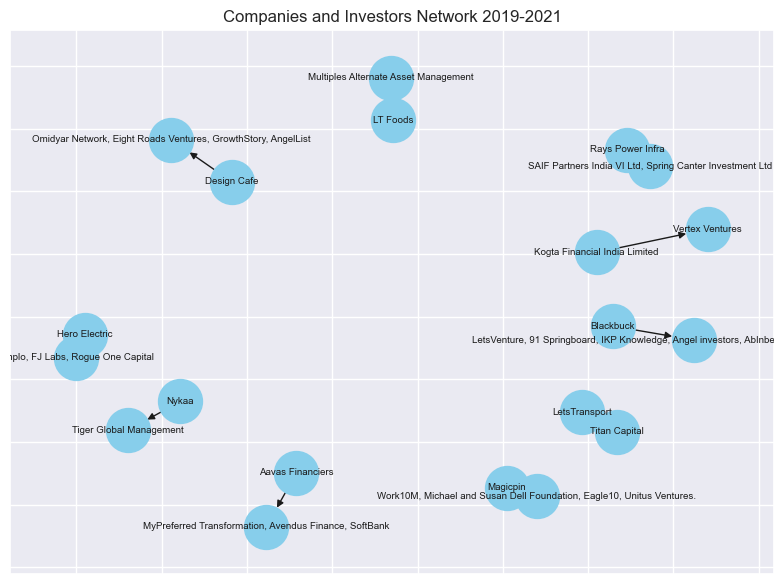

In [252]:
# Create a directed graph
G = nx.DiGraph()  # Change DiiGraph to DiGraph

# Add edges between companies and investors
for i, company in enumerate(companies):
    investor = df1['Investor'].iloc[i]
    G.add_edge(company, investor)

# Set node positions for better visualization
pos = nx.spring_layout(G)

# Create the network graph
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos, with_labels=True, node_color='skyblue', node_size=1000, font_size=7)

# Set title
plt.title('Companies and Investors Network 2019-2021')

# Adjust layout
plt.tight_layout()

# Show the graph
plt.show()

* These series of visuals was to check the relationship between the companies, sectors and the investors and and funding amount available to them with the period. ''Lets Transport" was recorded the most funding amount with ''Avas Financiers'' averaging above 200 million dollars in funding. It is also interesting to note that the Finance sector which Avas Financiers fall under accounted for one of the lowest sectors within the period.